In [3]:
!pip install pyforest


  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15897 sha256=7c8fde314d2fd5535906992e60707e5d39642ed5963005540634ea3883395ef8
  Stored in directory: /root/.cache/pip/wheels/50/94/94/c8224da834a4db55f67c86feb7c742111ff051d5f3e17127d8
Successfully built pyforest


In [4]:
#Import Libraries
import pyforest
import warnings as w
w.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from imblearn.under_sampling import CondensedNearestNeighbour,RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.api import Logit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from mlxtend.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

# Problem Statement
Heart disease remains a significant global health concern. Early prediction of heart attacks can significantly improve patient outcomes and reduce mortality rates. This project aims to address this challenge by developing a machine-learning model that can accurately predict the likelihood of a heart attack based on various health factors and medical history. By identifying individuals at high risk, healthcare providers can implement timely interventions and preventive measures to reduce the incidence of heart attacks and improve overall cardiovascular health.

# Data Description

### Demographics and General Information
1. State: The U.S. state or location of the individual.<br>
2. Sex: The gender of the individual (e.g., Male, Female, Other).<br>
3. RaceEthnicityCategory: The race/ethnicity classification of the individual (e.g., White, Black, Hispanic, etc.).<br>
4. AgeCategory: Age group of the individual (e.g., 18-25, 26-35, etc.).<br>
5. General Health and Behavior<br>
6. GeneralHealth: A self-reported measure of overall health (e.g., Excellent, Good, Fair, Poor).<br>
7. PhysicalHealthDays: Number of days in the past month the individual experienced poor physical health.<br>
8. MentalHealthDays: Number of days in the past month the individual experienced poor mental health.<br>
9. SleepHours: Average number of hours the individual sleeps per night.<br>
10. PhysicalActivities: Frequency or type of physical activity (e.g., regular exercise, none).<br>
11. SmokerStatus: Whether the individual is a smoker (e.g., Current, Former, Never).<br>
12. ECigaretteUsage: Whether the individual uses electronic cigarettes.<br>
13. RemovedTeeth: Number of teeth removed.<br>
### Chronic Diseases and Conditions
14. HadHeartAttack: Indicates whether the individual has had a heart attack (e.g., Yes, No).<br>
15. HadAngina: Indicates whether the individual has experienced angina (chest pain).<br>
16. HadStroke: Indicates whether the individual has had a stroke.<br>
17. HadAsthma: Indicates whether the individual has asthma.<br>
18. HadSkinCancer: Indicates whether the individual has had skin cancer.<br>
19. HadCOPD: Indicates whether the individual has Chronic Obstructive Pulmonary Disease.<br>
20. HadDepressiveDisorder: Indicates whether the individual has been diagnosed with a depressive disorder.<br>
21. HadKidneyDisease: Indicates whether the individual has kidney disease.<br>
22. HadArthritis: Indicates whether the individual has arthritis.<br>
23. HadDiabetes: Indicates whether the individual has diabetes.<br>
### Disabilities and Functional Limitations
24. DeafOrHardOfHearing: Indicates whether the individual is deaf or has hearing difficulty.<br>
25. BlindOrVisionDifficulty: Indicates whether the individual has vision difficulties.<br>
26. DifficultyConcentrating: Indicates difficulty with focus or concentration.<br>
27. DifficultyWalking: Indicates mobility challenges.<br>
28. DifficultyDressingBathing: Indicates difficulty with personal care activities.<br>
29. DifficultyErrands: Indicates difficulty completing errands independently.<br>
### Lifestyle and Preventive Measures
30. AlcoholDrinkers: Whether the individual drinks alcohol (e.g., Yes, No).<br>
31. HIVTesting: Whether the individual has undergone HIV testing.<br>
32. FluVaxLast12: Indicates whether the individual received a flu vaccine in the past 12 months.<br>
33. PneumoVaxEver: Indicates whether the individual has ever received a pneumococcal vaccine.<br>
34. TetanusLast10Tdap: Indicates whether the individual received a tetanus vaccine in the past 10 years.<br>
### COVID-19 Specific Data
35. CovidPos: Indicates whether the individual tested positive for COVID-19.<br>
36. HighRiskLastYear: Indicates if the individual engaged in high-risk activities during the past year.<br>
### Diagnostic Data and Metrics
37. ChestScan: Indicates whether the individual has had a chest scan.<br>
38. HeightInMeters: The individual’s height in meters.<br>
39. WeightInKilograms: The individual’s weight in kilograms.<br>
40. BMI: The Body Mass Index calculated using height and weight.

# Upload the Dataset

In [5]:
# Uplaod the Dataset
df=pd.read_csv(r"/content/drive/MyDrive/Capstone Project/heart_2022_with_nans.csv")
df.head()

<IPython.core.display.Javascript object>

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

# Data Understanding

In [ ]:
# Checking for the shape of the data (rows and columns)
print('No. of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])

No. of Rows: 445132
No. of Columns: 40


### Checking for data types

In [7]:
# Checking for dtypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

* There are total 40 columns and 445132 rows.
* In which 6 numeric columns and 34 categorical columns.
* There are null values in most of the columns.
* 'HadHeartAttack' is the Target variable here.

### Identification of Null Values

In [8]:
# Identification of missing values (percentage)
df.isnull().sum()/df.shape[0]*100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.269134
PhysicalHealthDays            2.454777
MentalHealthDays              2.036924
LastCheckupTime               1.866413
PhysicalActivities            0.245545
SleepHours                    1.225030
RemovedTeeth                  2.552052
HadHeartAttack                0.688560
HadAngina                     0.989594
HadStroke                     0.349784
HadAsthma                     0.398309
HadSkinCancer                 0.706083
HadCOPD                       0.498504
HadDepressiveDisorder         0.631723
HadKidneyDisease              0.432681
HadArthritis                  0.591510
HadDiabetes                   0.244197
DeafOrHardOfHearing           4.638399
BlindOrVisionDifficulty       4.844406
DifficultyConcentrating       5.445576
DifficultyWalking             5.394355
DifficultyDressingBathing     5.372564
DifficultyErrands             5.763684
SmokerStatus                  7.966626
ECigaretteUsage               8.011107
ChestScan                    12.590872
RaceEthnicityCategory         3.157940
AgeCategory                   2.039620
HeightInMeters                6.436742
WeightInKilograms             9.452926
BMI                          10.964388
AlcoholDrinkers              10.462964
HIVTesting                   14.855593
FluVaxLast12                 10.585849
PneumoVaxEver                17.307226
TetanusLast10Tdap            18.537423
HighRiskLastYear             11.372582
CovidPos                     11.404258
dtype: float64

In [9]:
# Identification rows with complete missing values.
row_null = df.isnull().sum(axis=1)
row_null

0         4
1         2
2         2
3         2
4         1
         ..
445127    1
445128    0
445129    4
445130    0
445131    1
Length: 445132, dtype: int64

* There are missing values in the data but not more than 15% in every column.
* There are no rows which have complete null values but there are rows which has only few values present.

### Identification of Duplicate rows

In [10]:
# Identification of duplicated rows
df[df.duplicated()]

State     Sex GeneralHealth  PhysicalHealthDays  \
7310        Alaska    Male     Very good                 0.0   
11503      Arizona  Female     Excellent                 0.0   
28206   California    Male     Excellent                 0.0   
29339   California    Male     Excellent                 0.0   
32711   California  Female           NaN                 NaN   
...            ...     ...           ...                 ...   
411300  Washington    Male     Very good                 0.0   
427638   Wisconsin    Male     Very good                 0.0   
431351   Wisconsin    Male          Good                 0.0   
431653   Wisconsin    Male     Excellent                 0.0   
433508     Wyoming  Female          Good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
7310                 0.0  Within past year (anytime less than 12 months ...   
11503                0.0  Within past year (anytime less than 12 months ...   
28206                0.0  Within past year (anytime less than 12 months ...   
29339                0.0  Within past year (anytime less than 12 months ...   
32711                NaN                                                NaN   
...                  ...                                                ...   
411300               0.0  Within past year (anytime less than 12 months ...   
427638               0.0  Within past year (anytime less than 12 months ...   
431351               0.0  Within past year (anytime less than 12 months ...   
431653               0.0  Within past year (anytime less than 12 months ...   
433508               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours  RemovedTeeth HadHeartAttack  ...  \
7310                  Yes         7.0  None of them             No  ...   
11503                 Yes         7.0  None of them             No  ...   
28206                 Yes         7.0  None of them             No  ...   
29339                 Yes         7.0  None of them             No  ...   
32711                 NaN         NaN           NaN            NaN  ...   
...                   ...         ...           ...            ...  ...   
411300                Yes         8.0  None of them             No  ...   
427638                Yes         7.0  None of them             No  ...   
431351                Yes         7.0  None of them             No  ...   
431653                Yes         8.0  None of them             No  ...   
433508                Yes         8.0  None of them             No  ...   

       HeightInMeters WeightInKilograms    BMI AlcoholDrinkers HIVTesting  \
7310              NaN               NaN    NaN             NaN        NaN   
11503            1.63              56.7  21.46             Yes         No   
28206             NaN               NaN    NaN             NaN        NaN   
29339             NaN               NaN    NaN             NaN        NaN   
32711             NaN               NaN    NaN             NaN        NaN   
...               ...               ...    ...             ...        ...   
411300            NaN               NaN    NaN             NaN        NaN   
427638            NaN               NaN    NaN             NaN        NaN   
431351            NaN               NaN    NaN             NaN        NaN   
431653            NaN               NaN    NaN             NaN        NaN   
433508            NaN               NaN    NaN             NaN        NaN   

       FluVaxLast12 PneumoVaxEver   TetanusLast10Tdap HighRiskLastYear  \
7310            NaN           NaN                 NaN              NaN   
11503           Yes           Yes  Yes, received Tdap               No   
28206           NaN           NaN                 NaN              NaN   
29339           NaN           NaN                 NaN              NaN   
32711           NaN           NaN                 NaN              NaN   
...             ...      

* There are 157 Duplicate rows in this dataset.

In [11]:
# Droping of duplicate rows from the data
df.drop_duplicates(inplace=True)
df.shape

(444975, 40)

* After dropping the duplicate rows there are 444975 rows in it.

### Data Summary

In [12]:
# summary statistic of Numeric columns
df.describe().T

count       mean        std    min    25%    50%  \
PhysicalHealthDays  434053.0   4.349372   8.689968   0.00   0.00   0.00   
MentalHealthDays    435913.0   4.384164   8.388541   0.00   0.00   0.00   
SleepHours          439527.0   7.022909   1.502618   1.00   6.00   7.00   
HeightInMeters      416470.0   1.702690   0.107178   0.91   1.63   1.70   
WeightInKilograms   403044.0  83.074632  21.448241  22.68  68.04  80.74   
BMI                 396316.0  28.529907   6.554917  12.02  24.13  27.44   

                      75%     max  
PhysicalHealthDays   3.00   30.00  
MentalHealthDays     5.00   30.00  
SleepHours           8.00   24.00  
HeightInMeters       1.78    2.41  
WeightInKilograms   95.25  292.57  
BMI                 31.75   99.64

In [13]:
# summary statistic of Categorical
df.describe(include='O').T

count unique  \
State                      444975     54   
Sex                        444975      2   
GeneralHealth              443782      5   
LastCheckupTime            436674      4   
PhysicalActivities         443887      2   
RemovedTeeth               433620      4   
HadHeartAttack             441915      2   
HadAngina                  440575      2   
HadStroke                  443423      2   
HadAsthma                  443207      2   
HadSkinCancer              441837      2   
HadCOPD                    442761      2   
HadDepressiveDisorder      442168      2   
HadKidneyDisease           443054      2   
HadArthritis               442347      2   
HadDiabetes                443893      4   
DeafOrHardOfHearing        424473      2   
BlindOrVisionDifficulty    423556      2   
DifficultyConcentrating    420880      2   
DifficultyWalking          421108      2   
DifficultyDressingBathing  421205      2   
DifficultyErrands          419464      2   
SmokerStatus               409659      4   
ECigaretteUsage            409461      4   
ChestScan                  389075      2   
RaceEthnicityCategory      430927      5   
AgeCategory                435906     13   
AlcoholDrinkers            398547      2   
HIVTesting                 378994      2   
FluVaxLast12               398000      2   
PneumoVaxEver              368081      2   
TetanusLast10Tdap          362605      4   
HighRiskLastYear           394498      2   
CovidPos                   394357      3   

                                                                         top  \
State                                                             Washington   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
LastCheckupTime            Within past year (anytime less than 12 months ...   
PhysicalActivities                                                       Yes   
RemovedTeeth                                                    None of them   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 No   
HadSkinCancer                                                             No   
HadCOPD                                                                   No   
HadDepressiveDisorder                                                     No   
HadKidneyDisease                                                          No   
HadArthritis                                                              No   
HadDiabetes                                                               No   
DeafOrHardOfHearing                                                       No   
BlindOrVisionDifficulty                                                   No   
DifficultyConcentrating                                                   No   
DifficultyWalking                                                         No   
DifficultyDressingBathing                                                 No   
DifficultyErrands                                                         No   
SmokerStatus                                                    Never smoked   
ECigaretteUsage                    Never used e-cigarettes in my entire life   
ChestScan                                                                 No   
RaceEthnicityCategory                               White only, Non-Hispanic   
AgeCategory                                                     Age 65 to 69   
AlcoholDrinkers                                                          Yes   
HIVTesting                                                                No   
FluVaxLast12                                                             Yes   
PneumoV

### Univariate Analysis.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

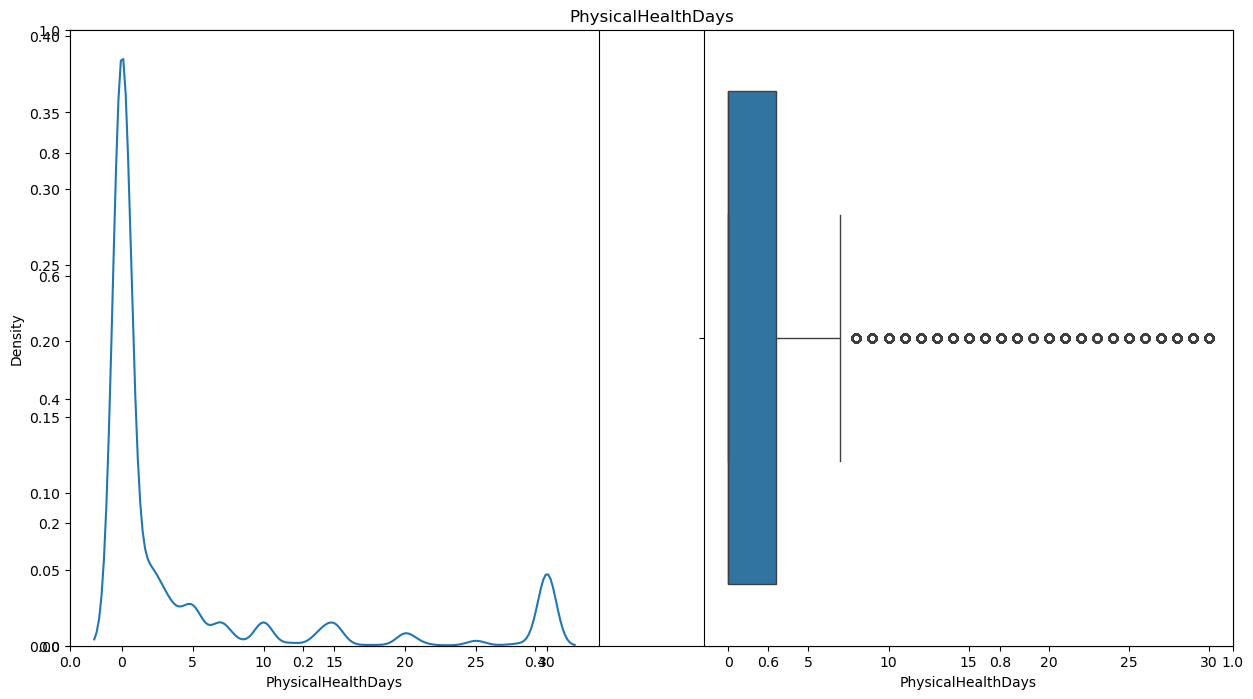

Skewness: 2.1792691574342538
Kurtosis: 3.4250618380994986


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

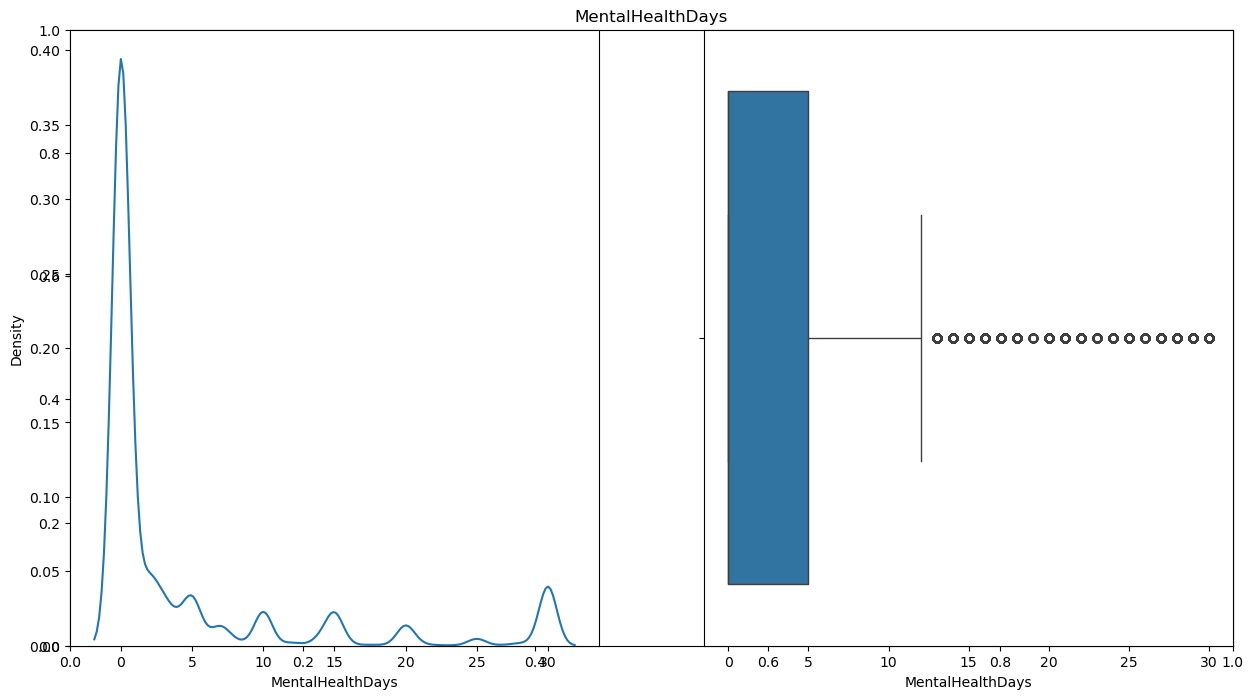

Skewness: 2.12265370351103
Kurtosis: 3.356652764476231


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

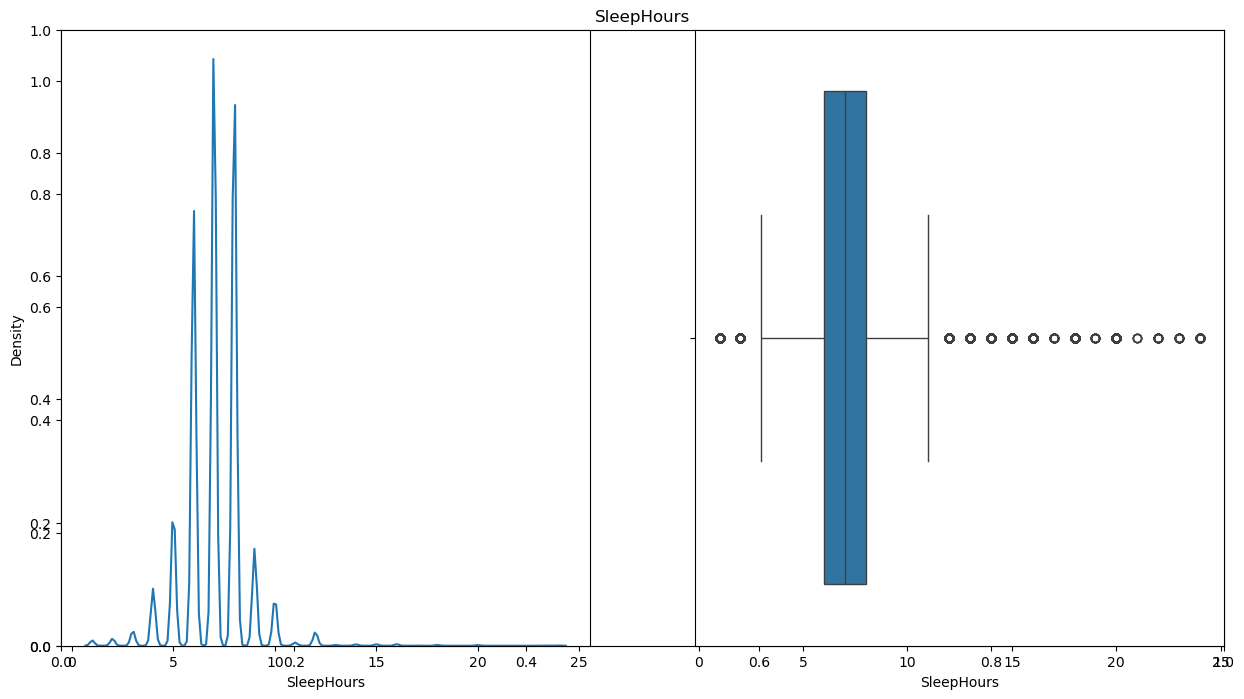

Skewness: 0.7647202620733116
Kurtosis: 8.739265011746813


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

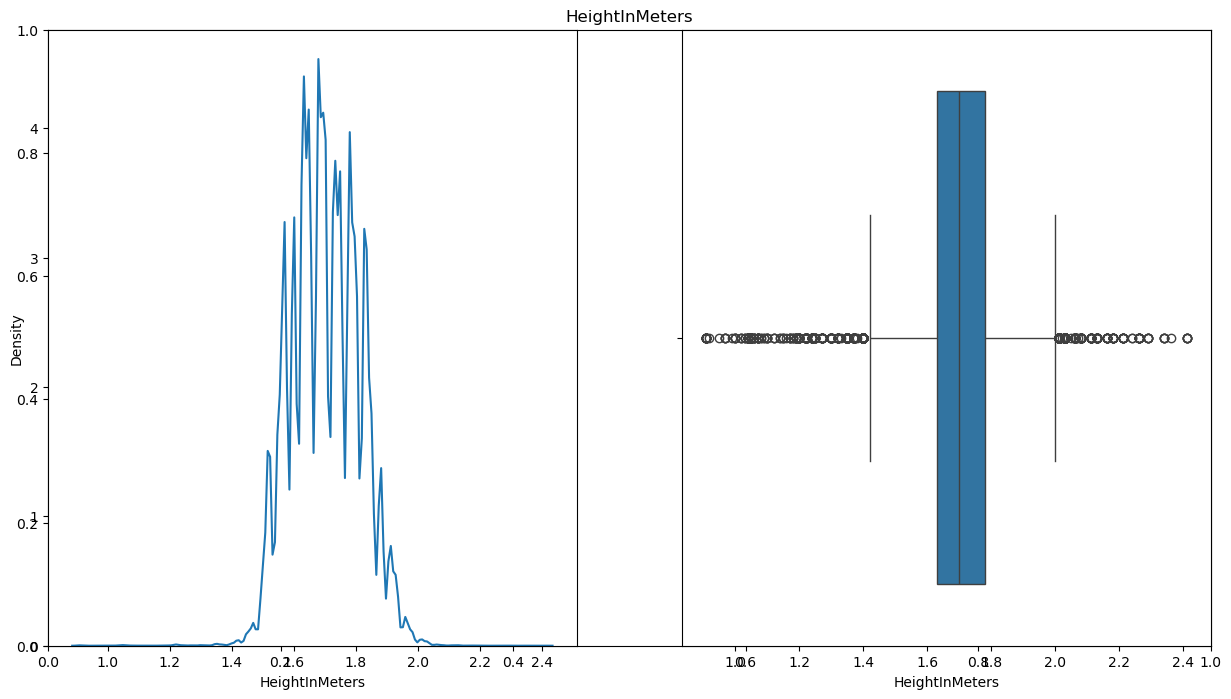

Skewness: 0.0288869956004554
Kurtosis: 0.18230087077564594


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

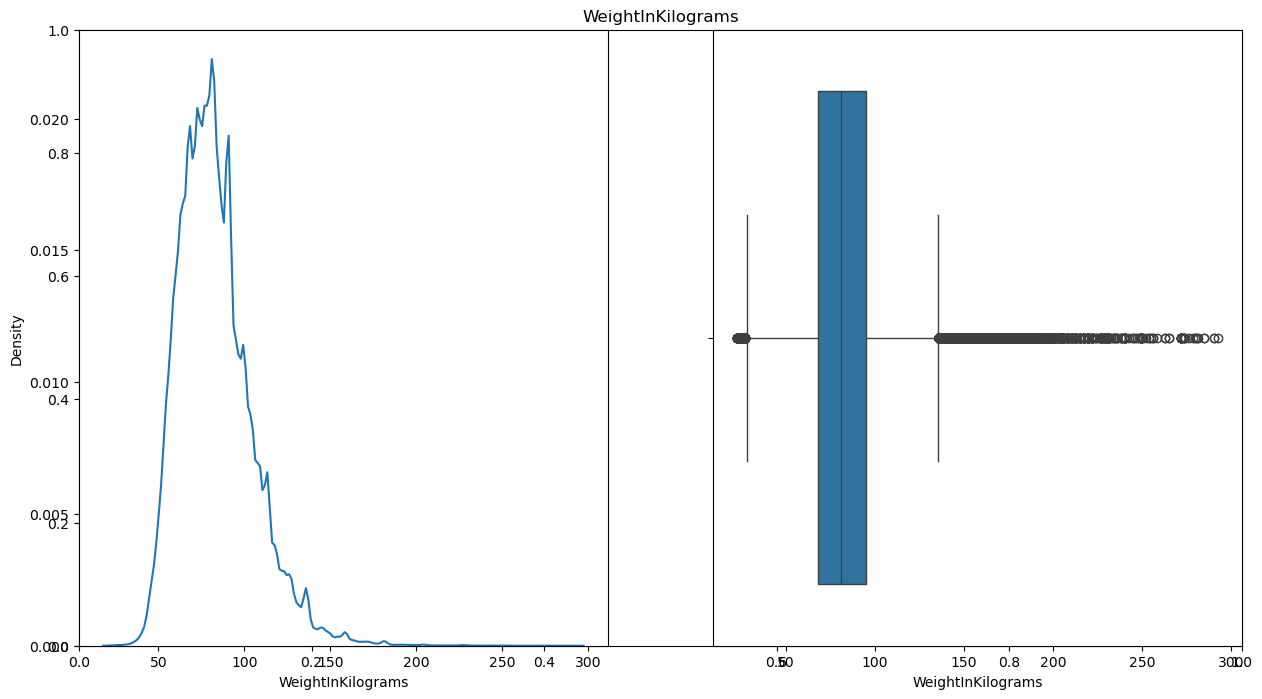

Skewness: 1.0756226917604688
Kurtosis: 2.7389750517766167


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

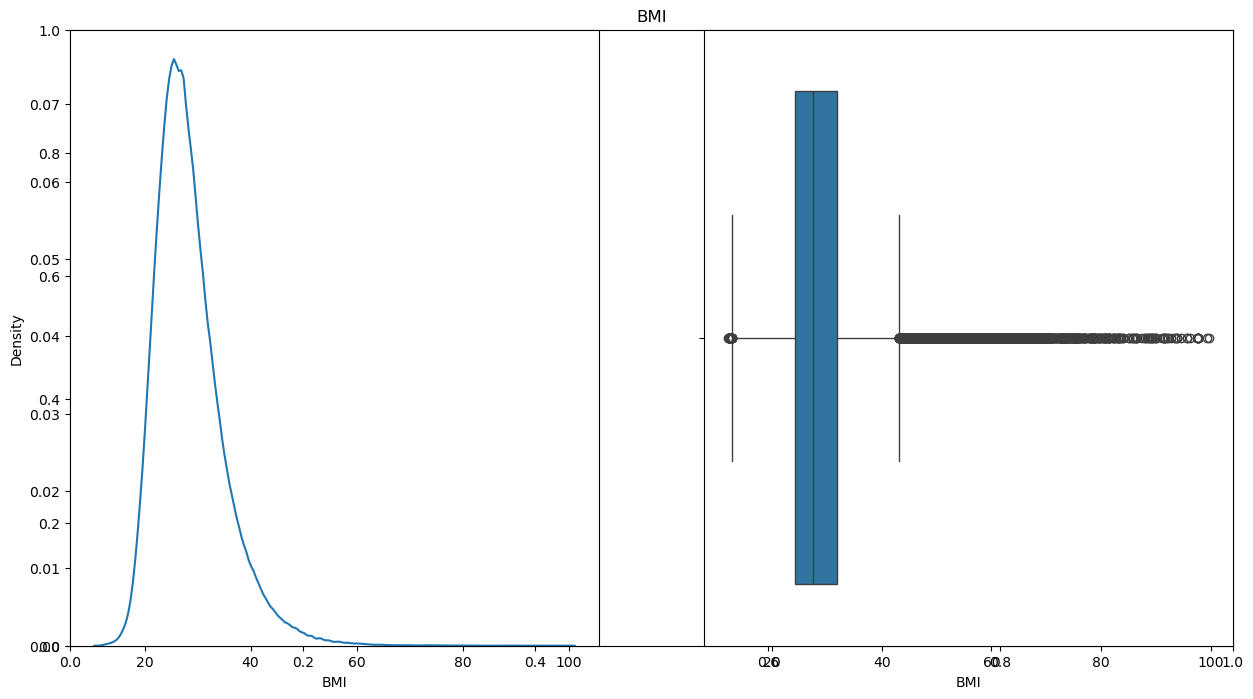

Skewness: 1.3877487186852828
Kurtosis: 4.428355854190881


In [ ]:
# Univariate Analysis of Numeric Variables

for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=[15,8])
    plt.title(i)
    plt.subplot(1,2,1)
    sns.kdeplot(x=df[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()
    print('Skewness:',df[i].skew())
    print('Kurtosis:',df[i].kurt())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

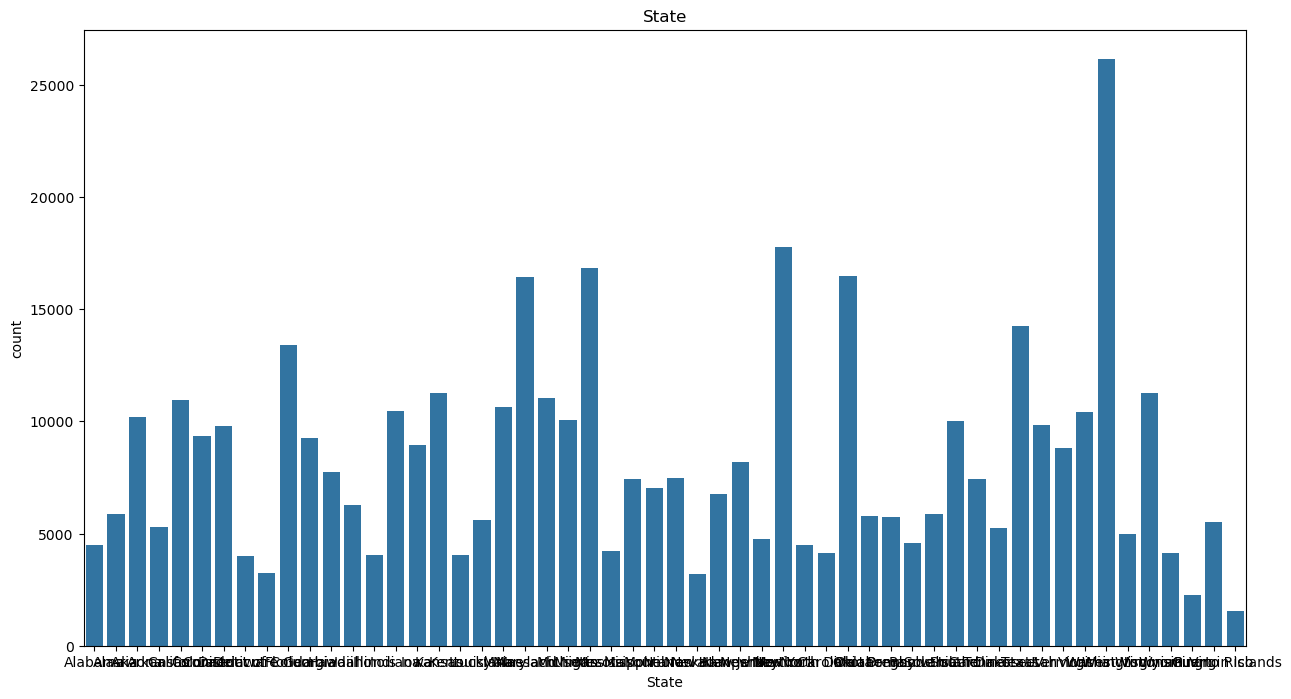

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

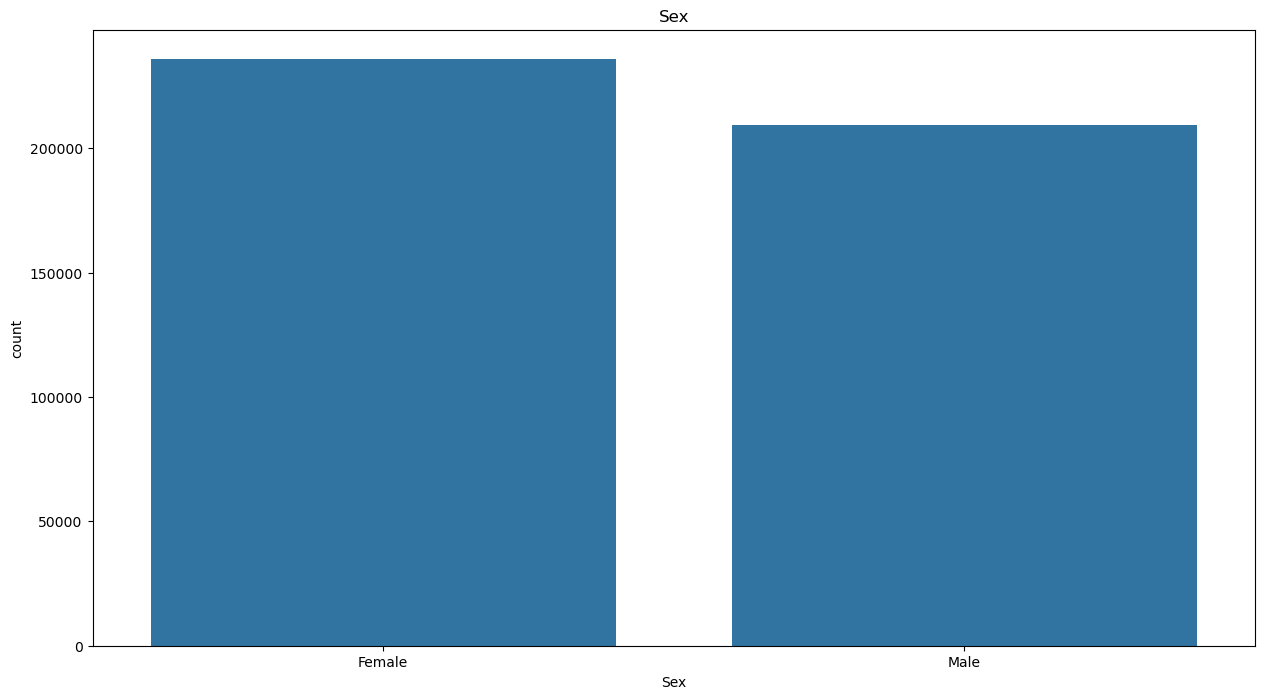

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

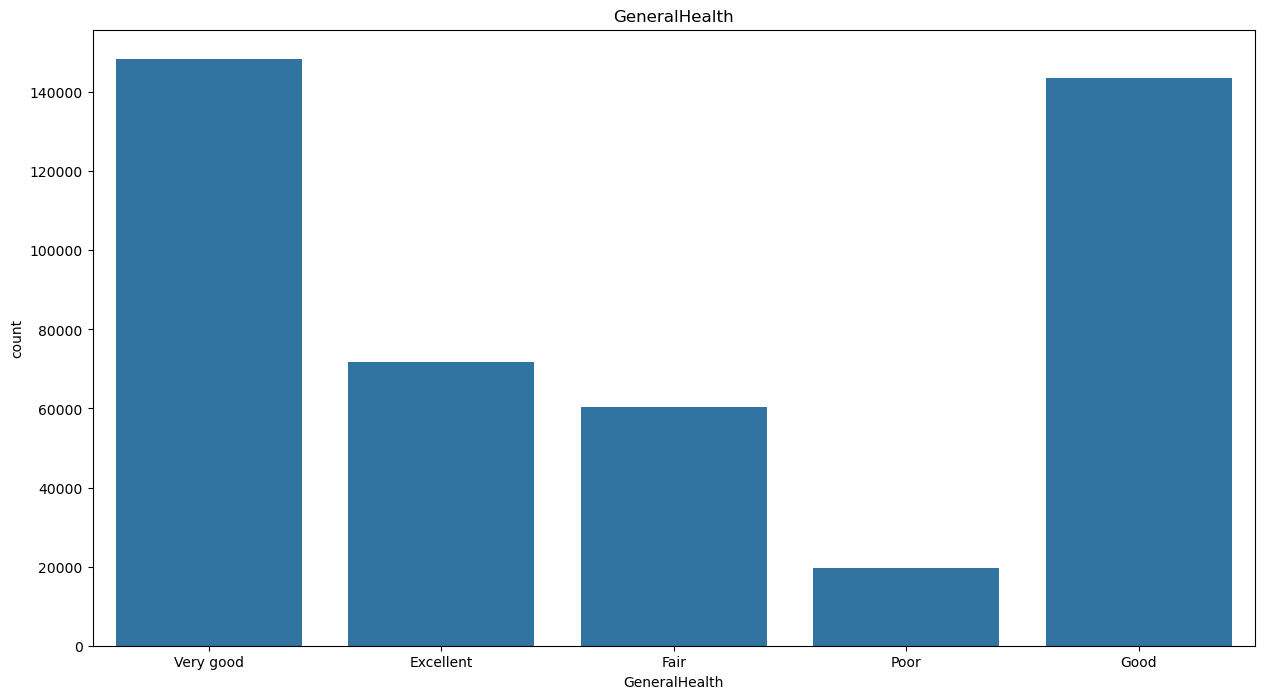

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

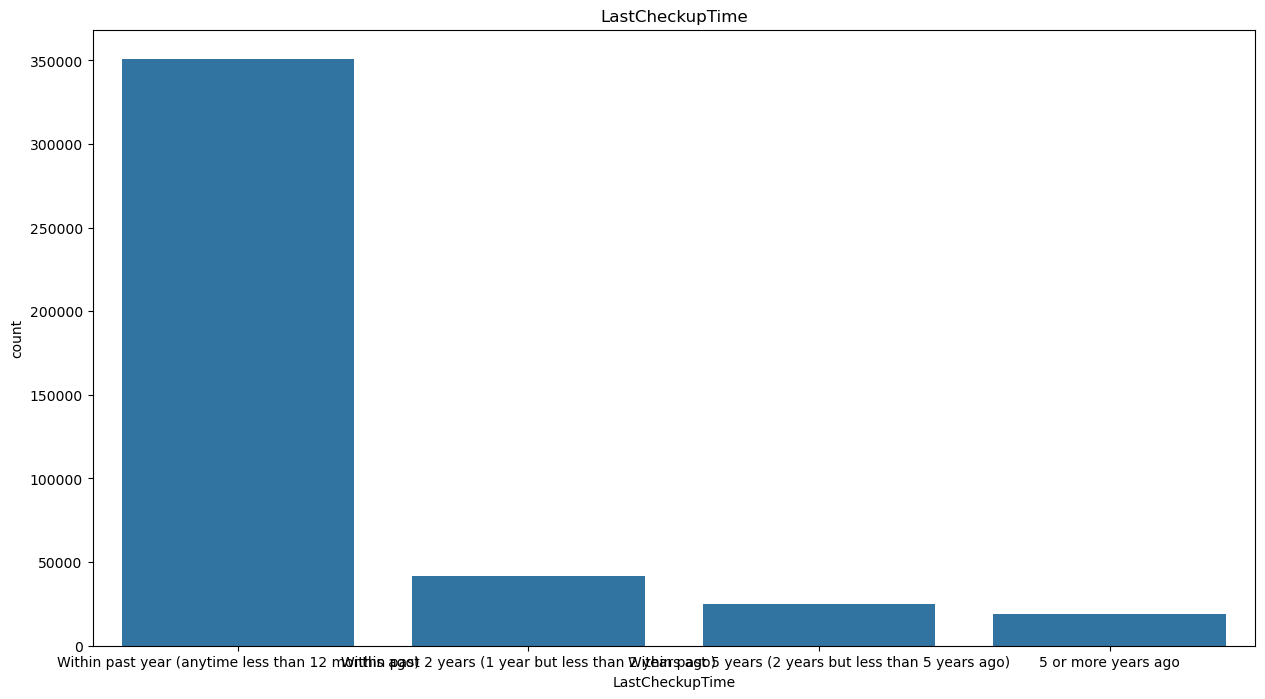

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

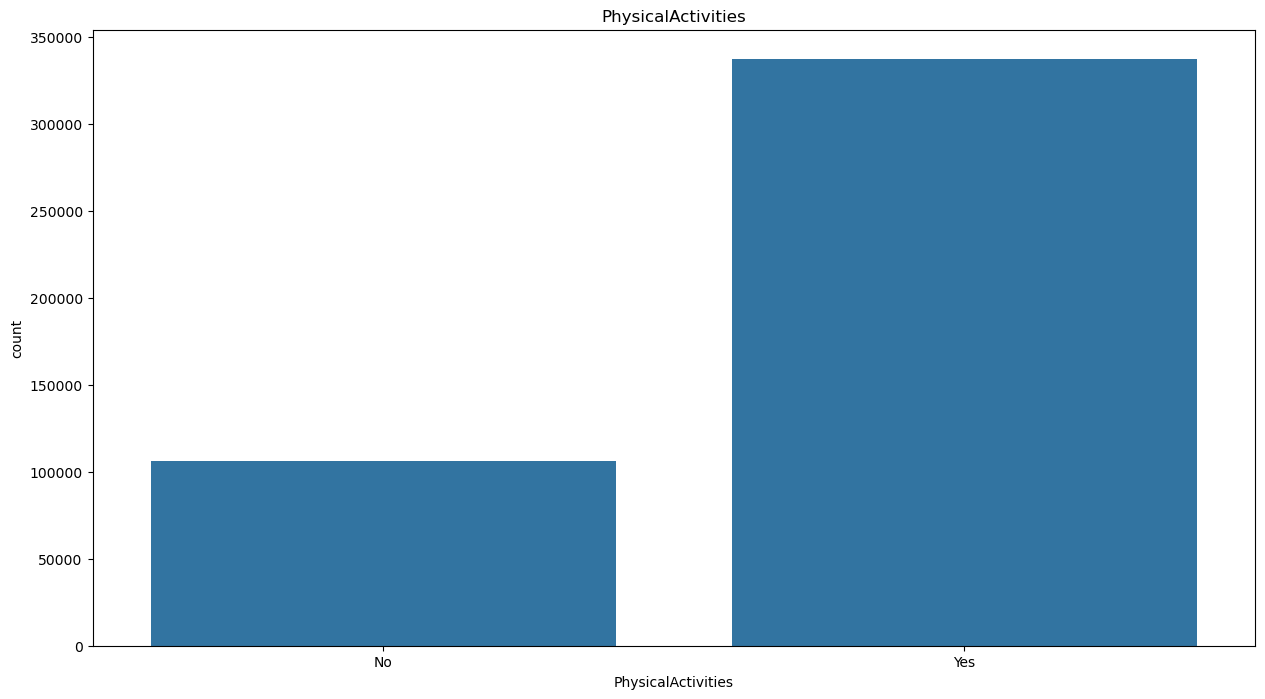

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

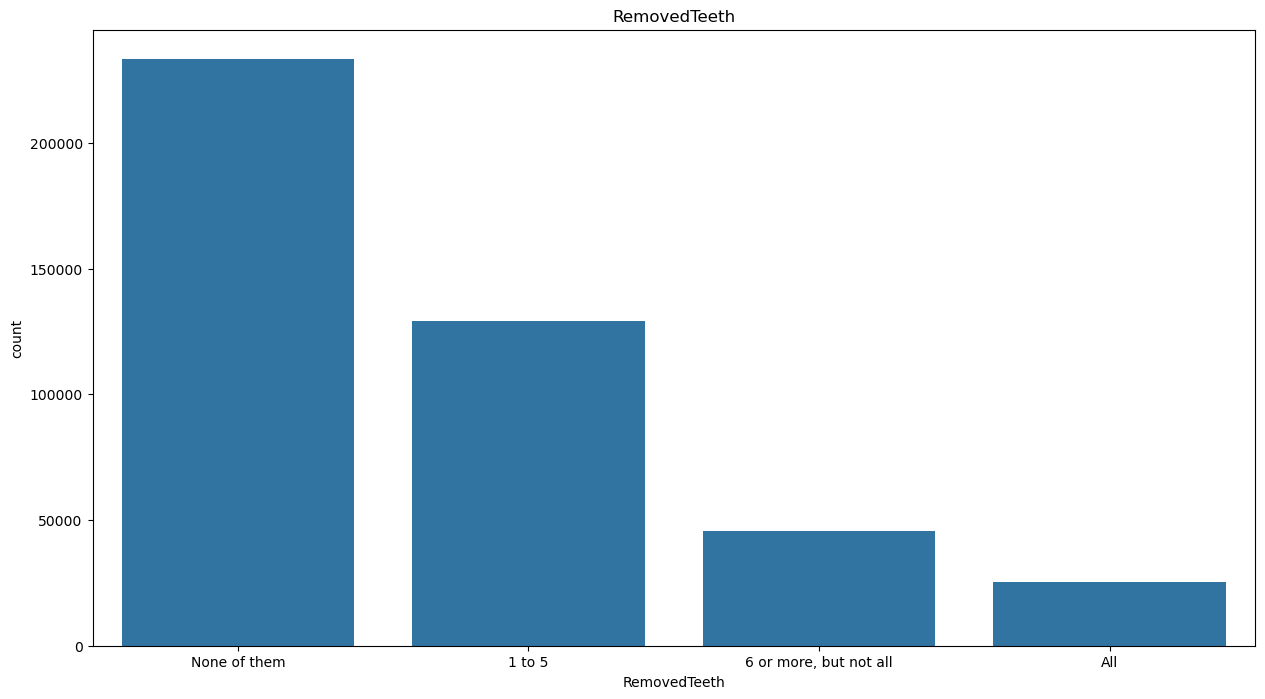

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

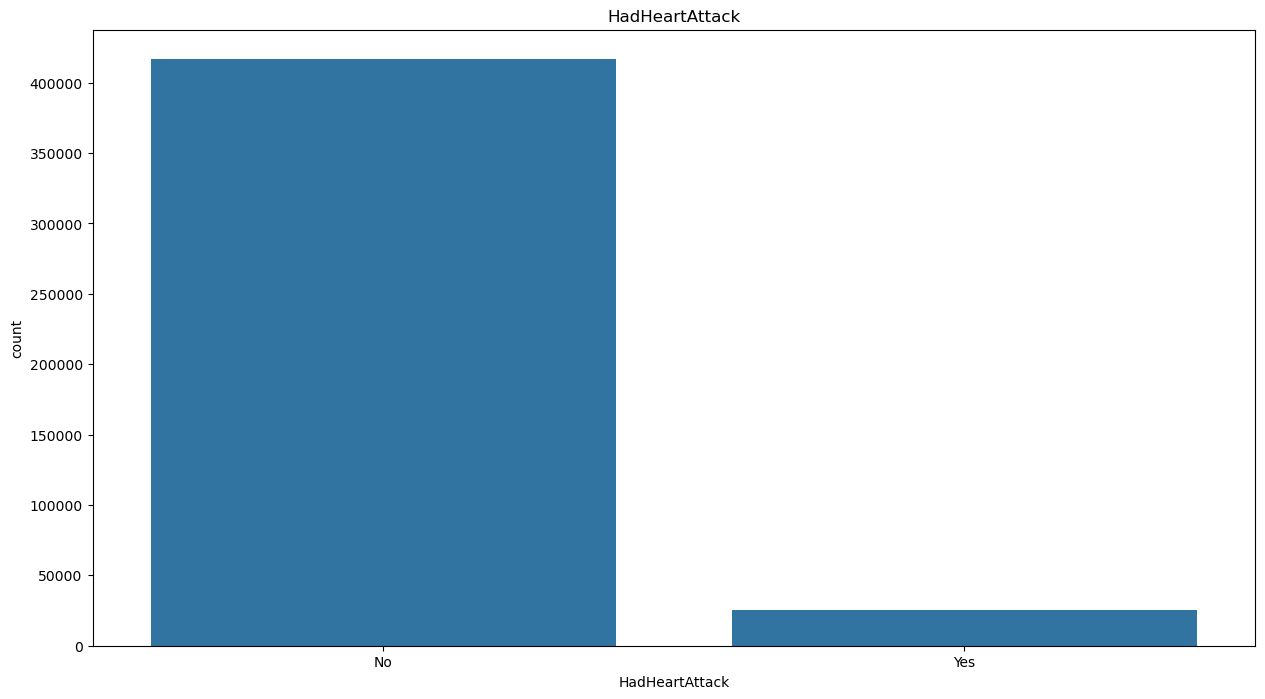

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

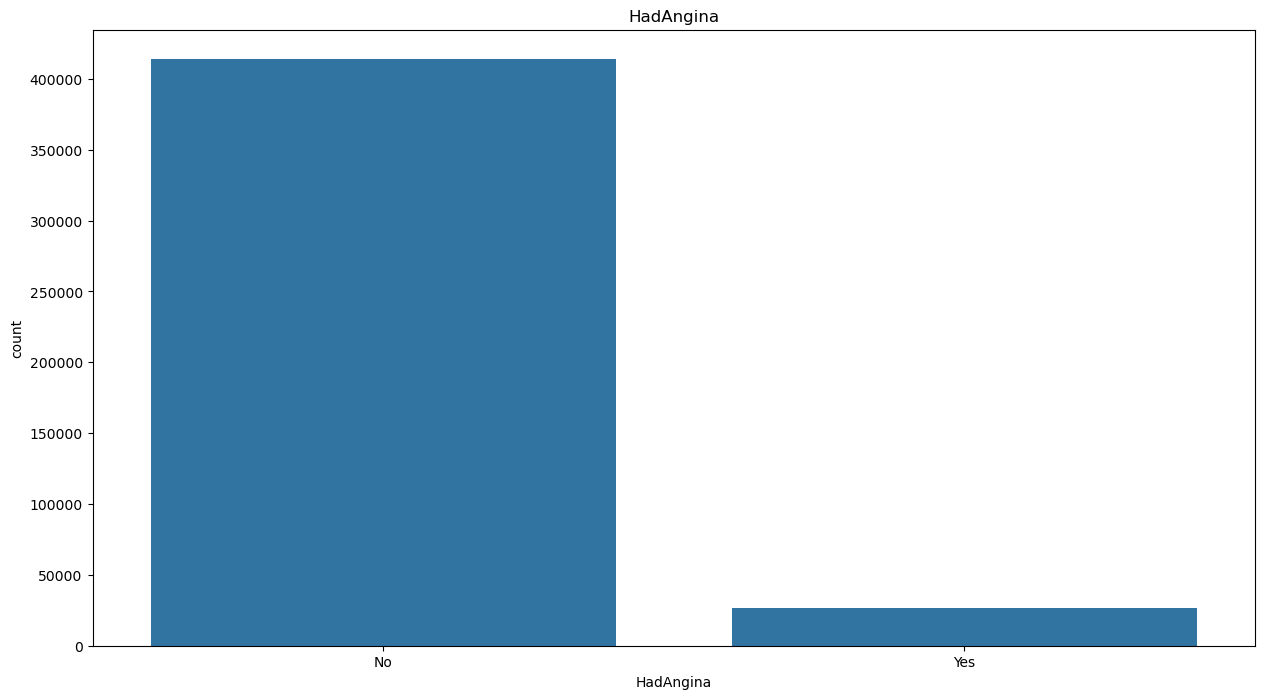

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

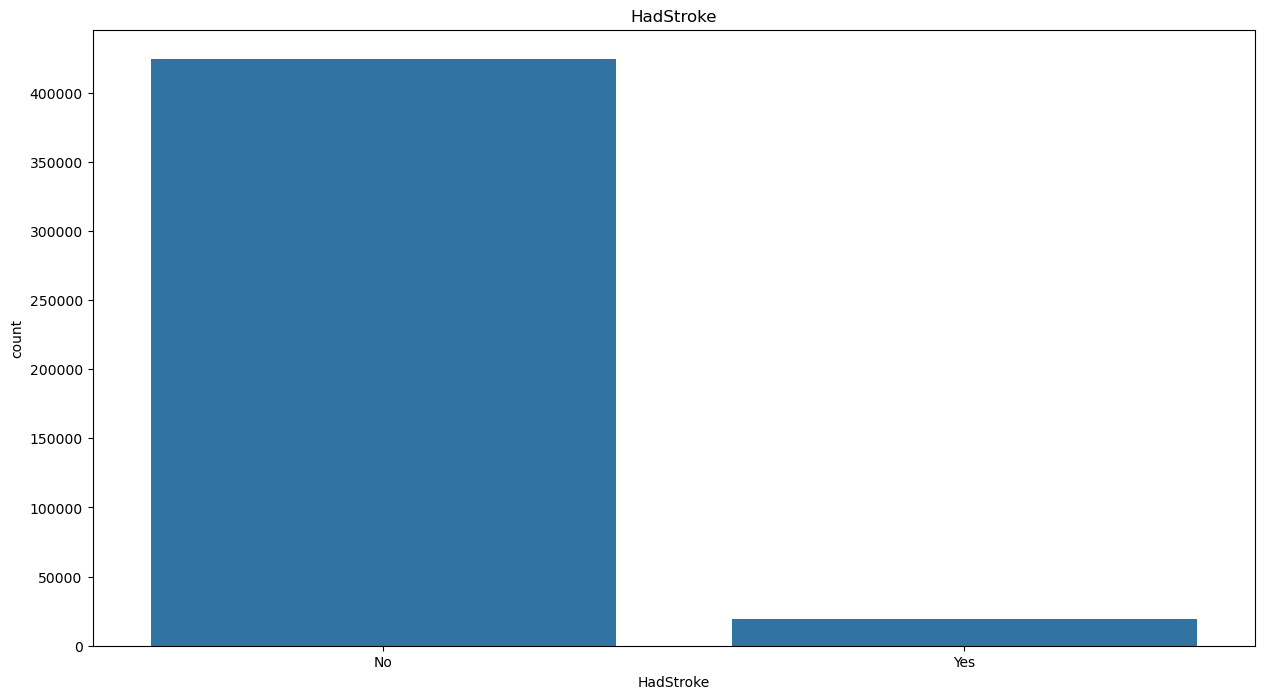

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

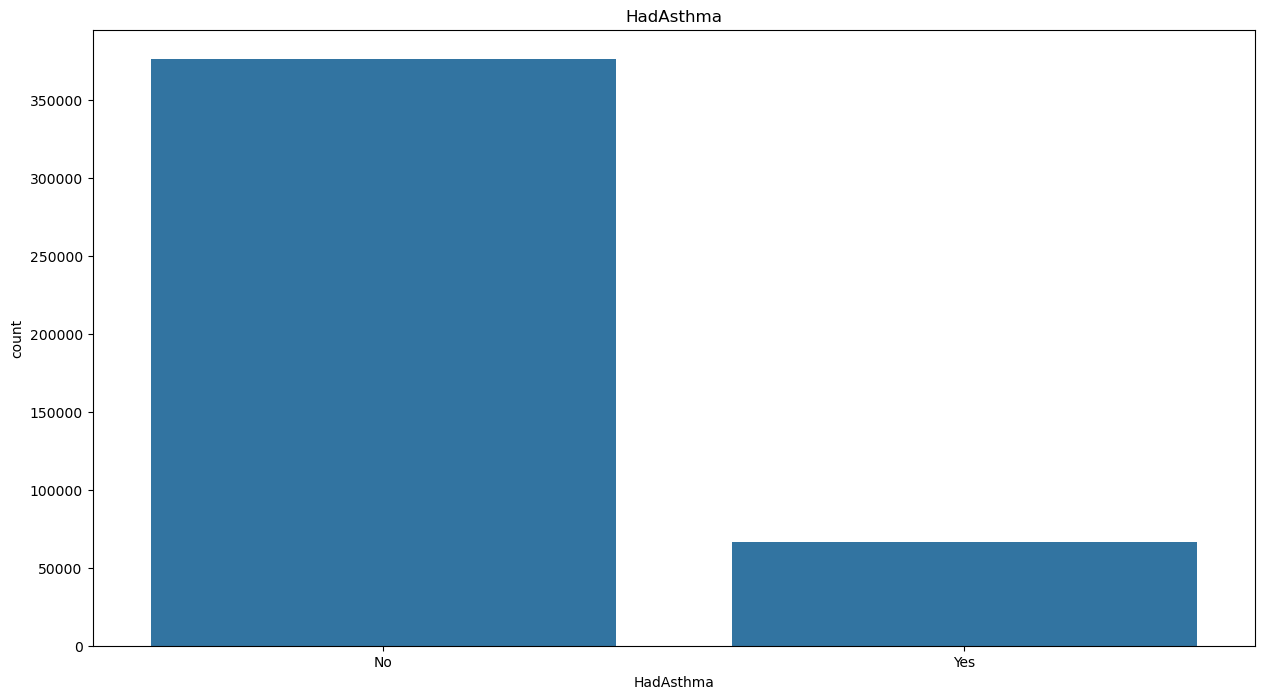

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

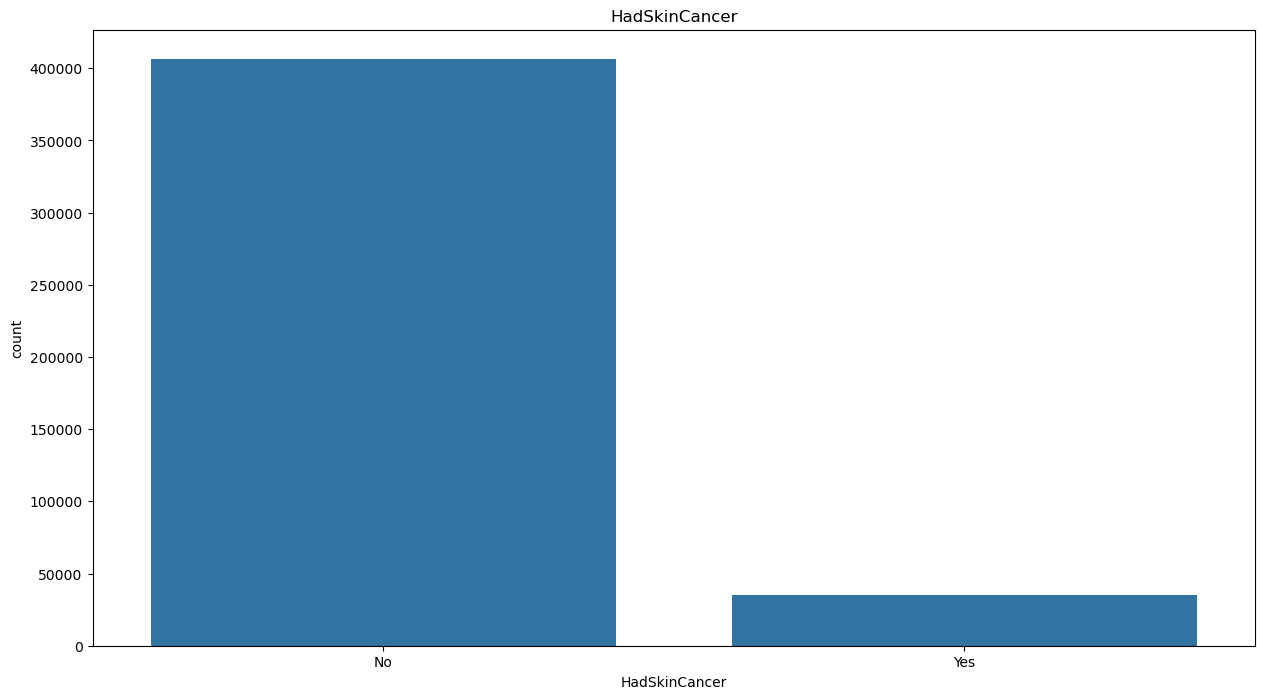

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

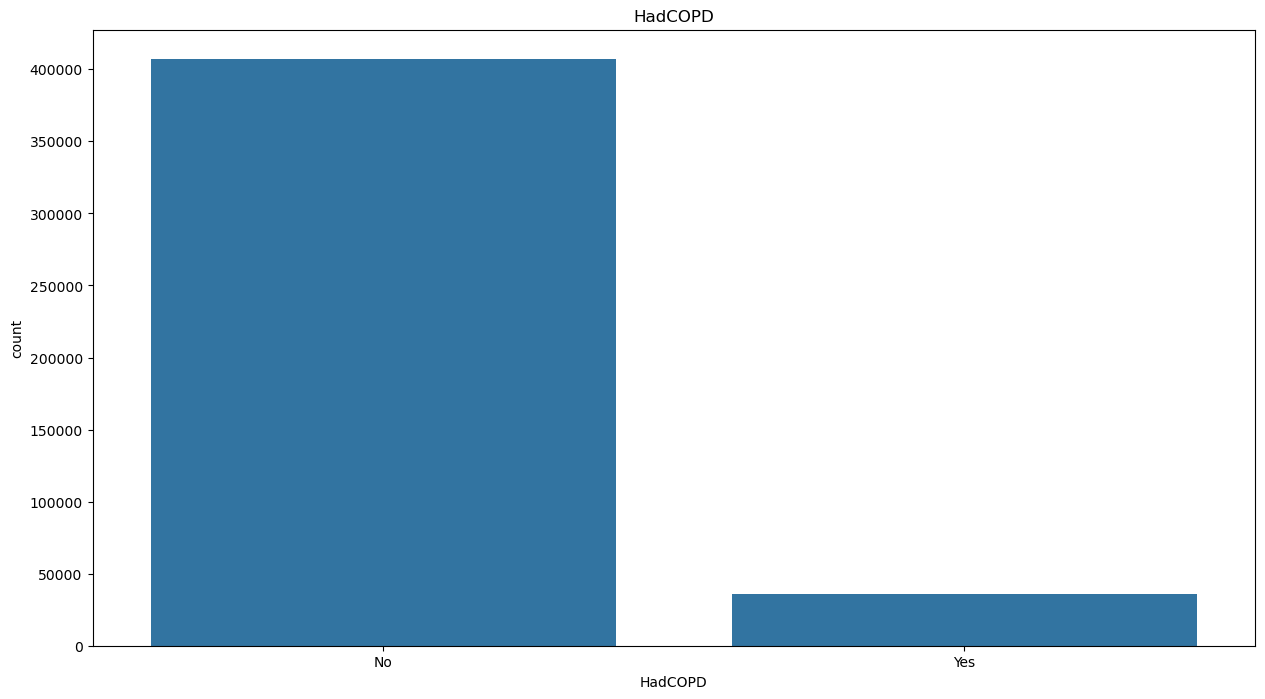

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

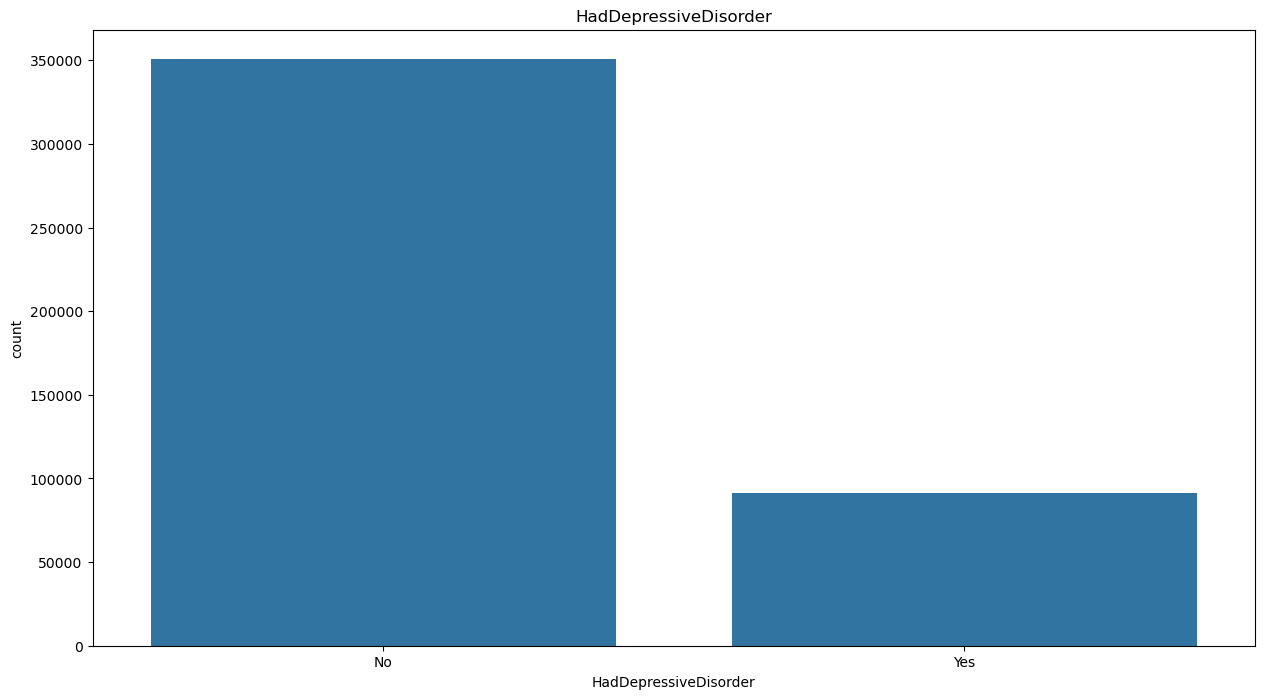

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

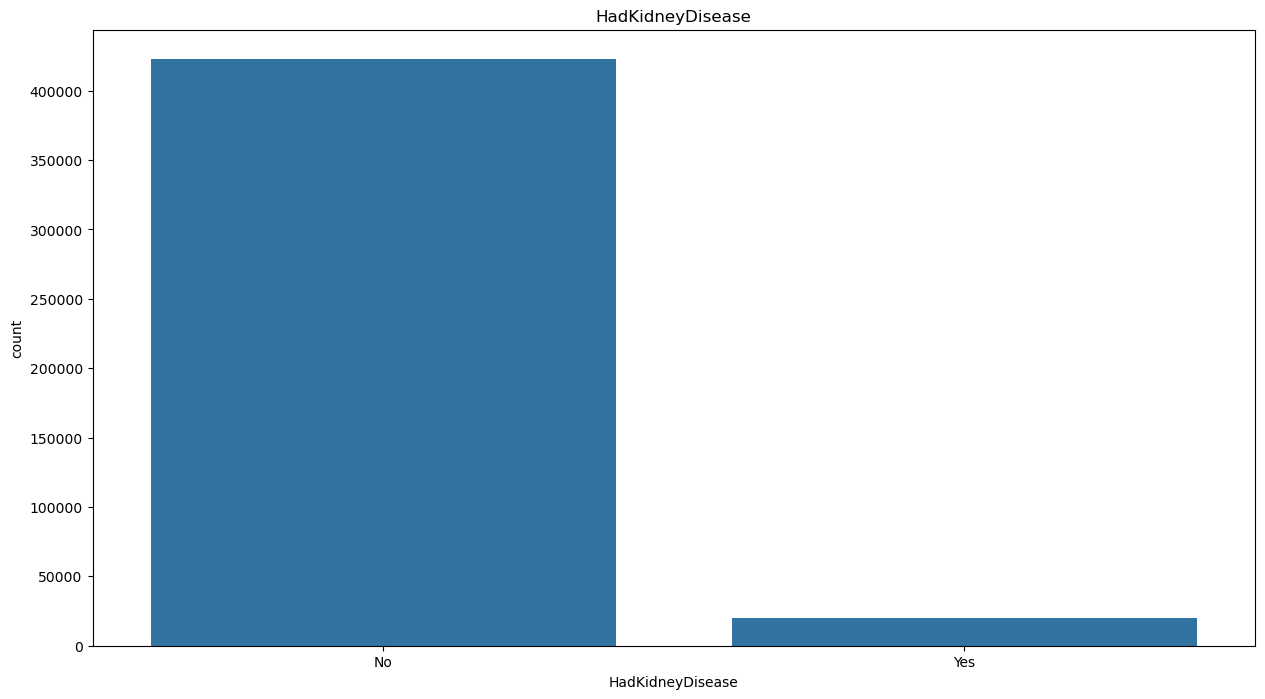

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

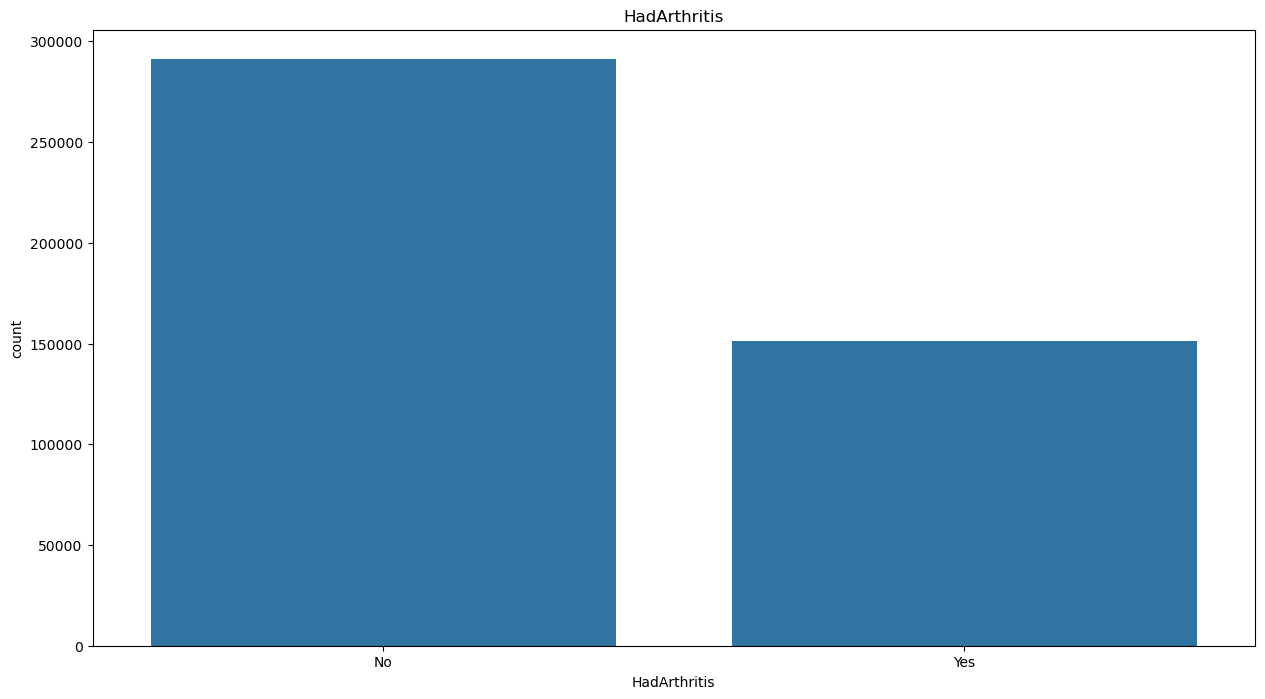

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

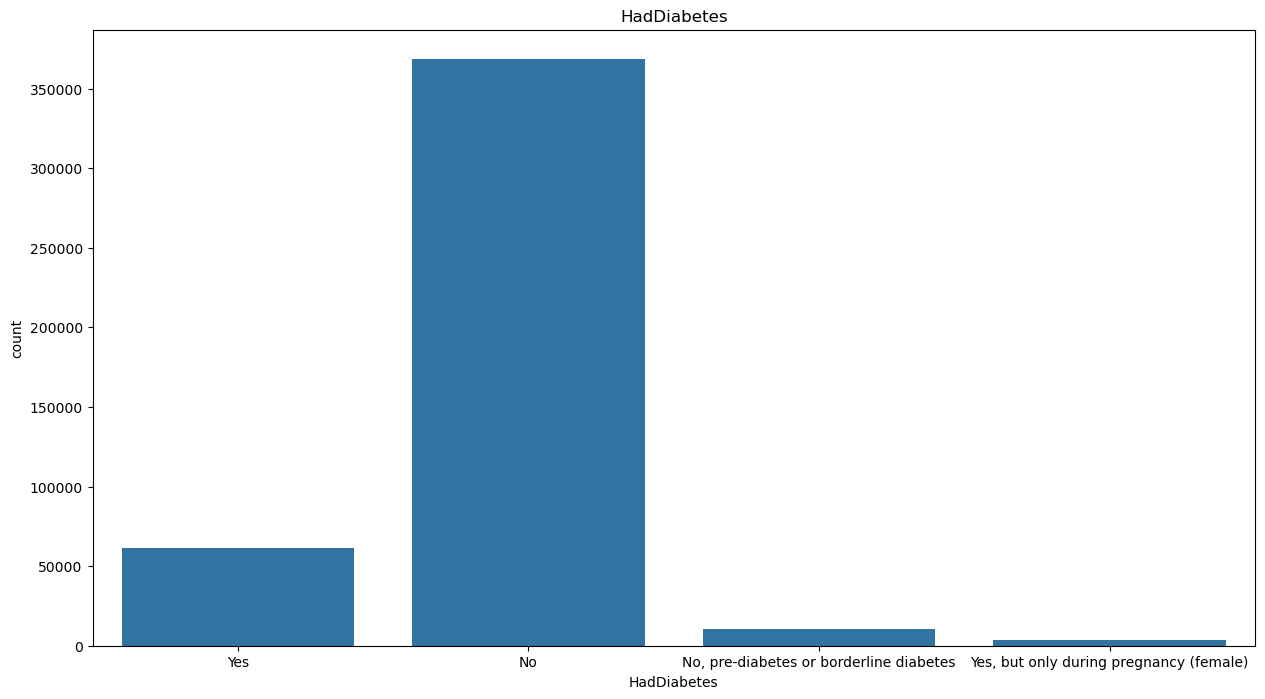

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

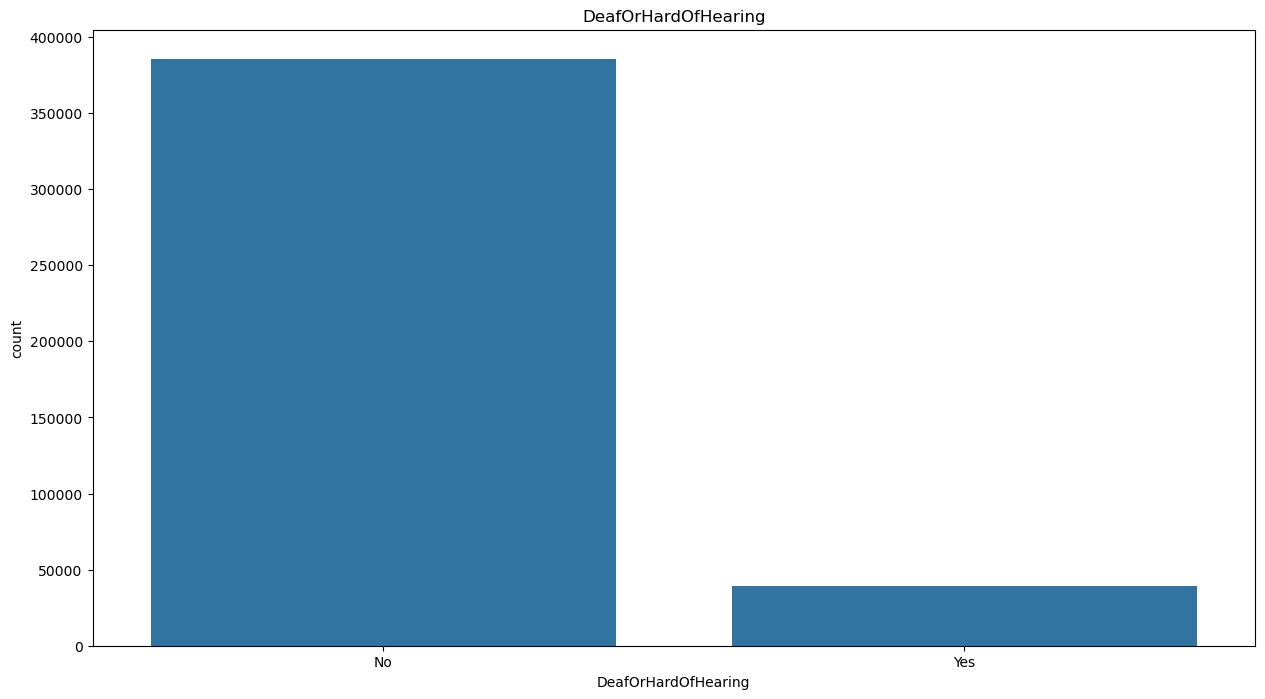

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

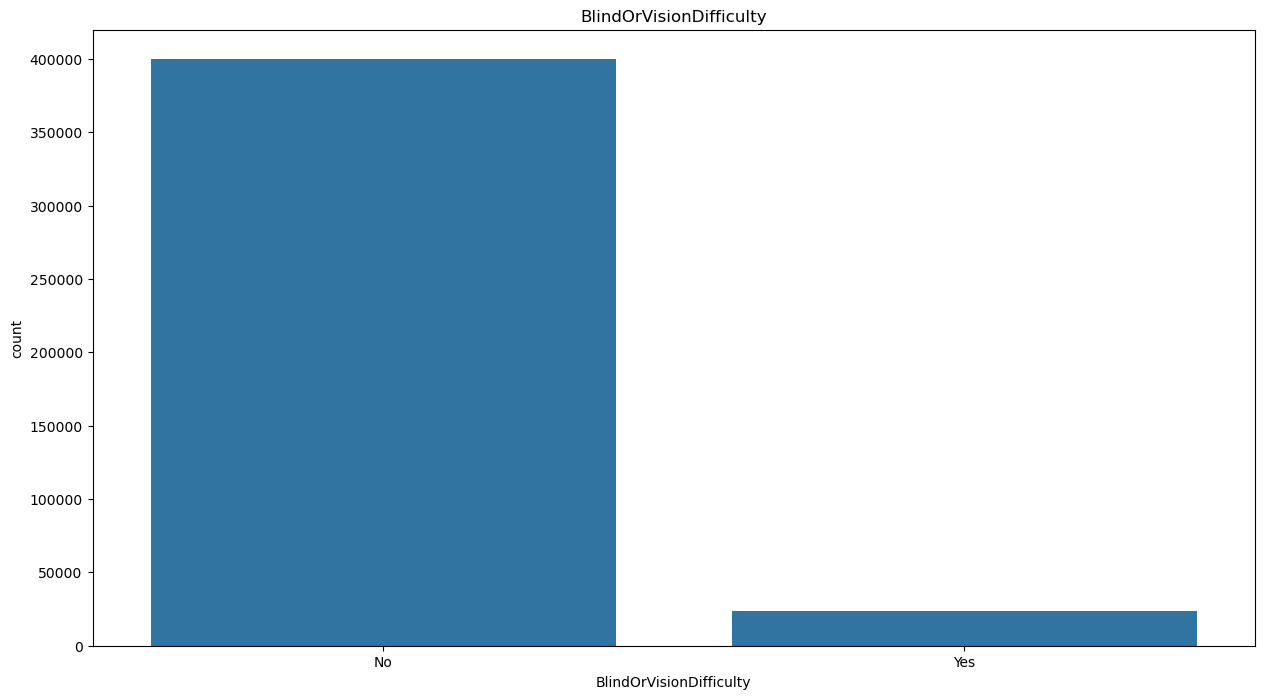

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

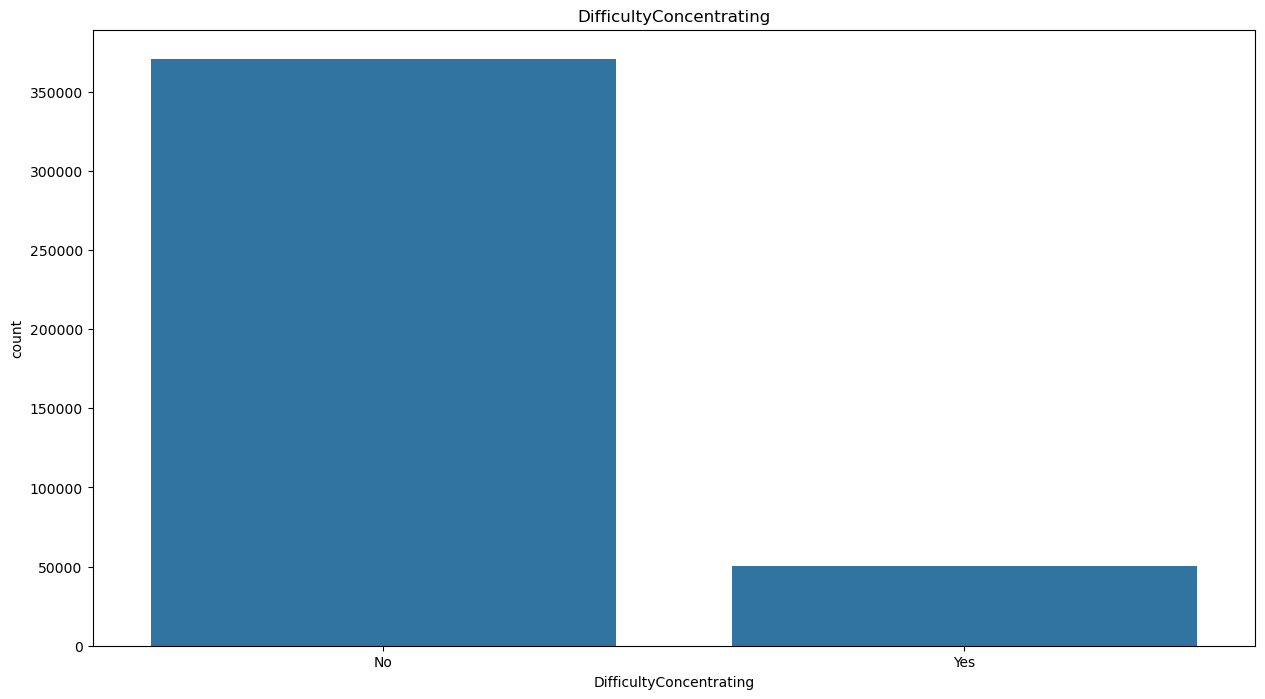

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

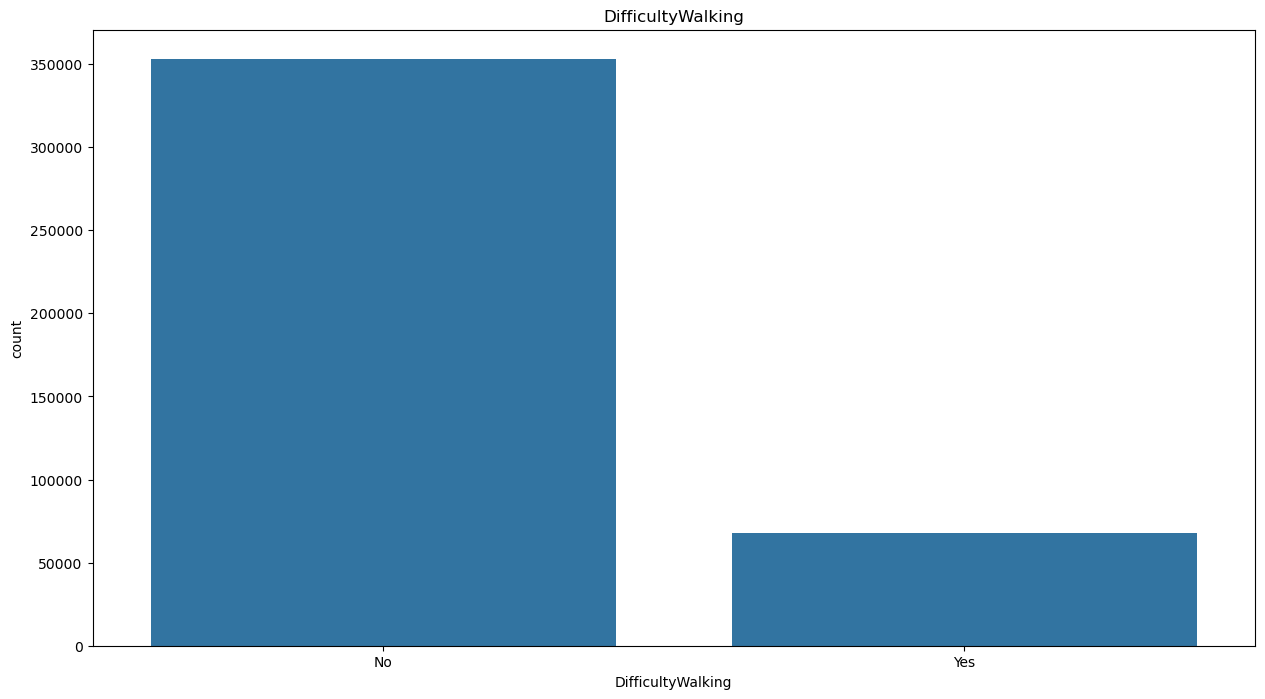

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

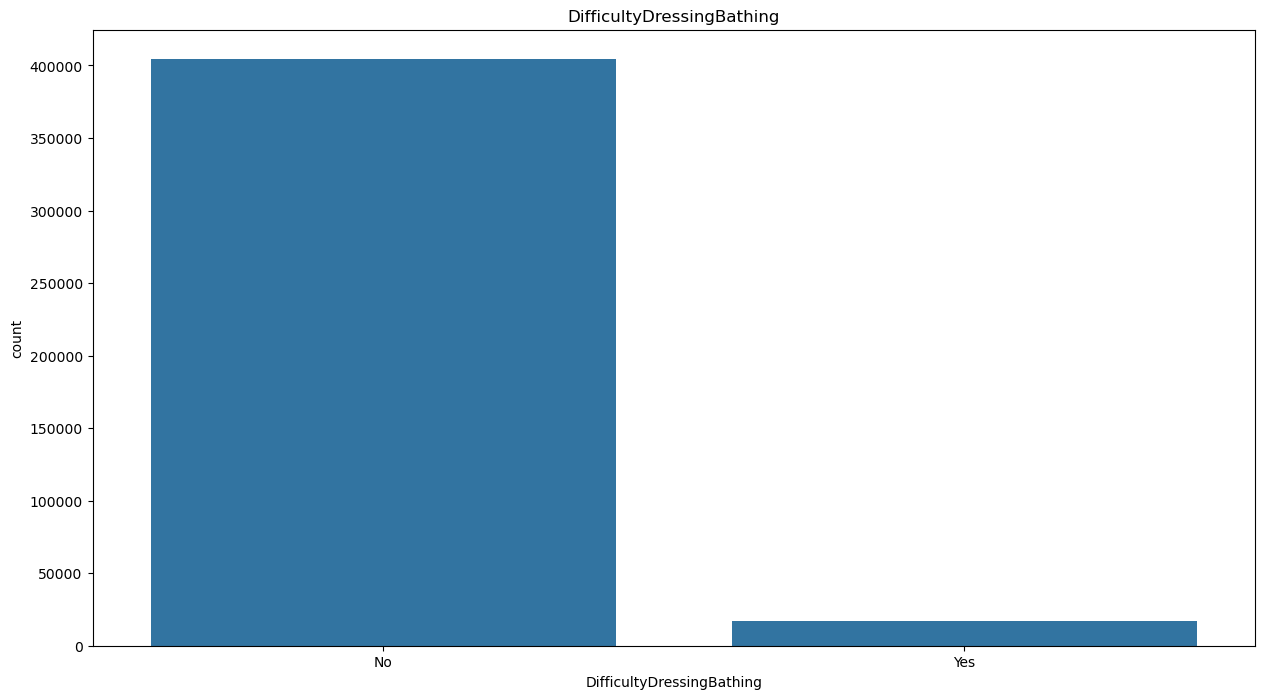

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

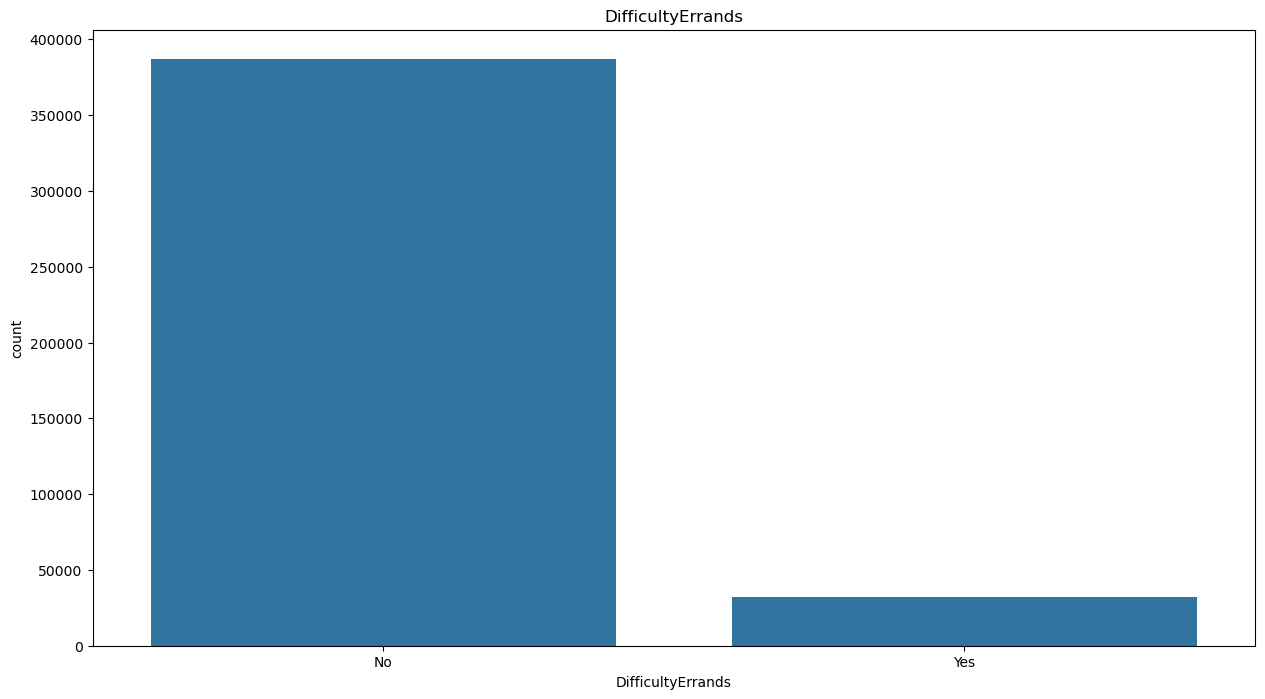

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

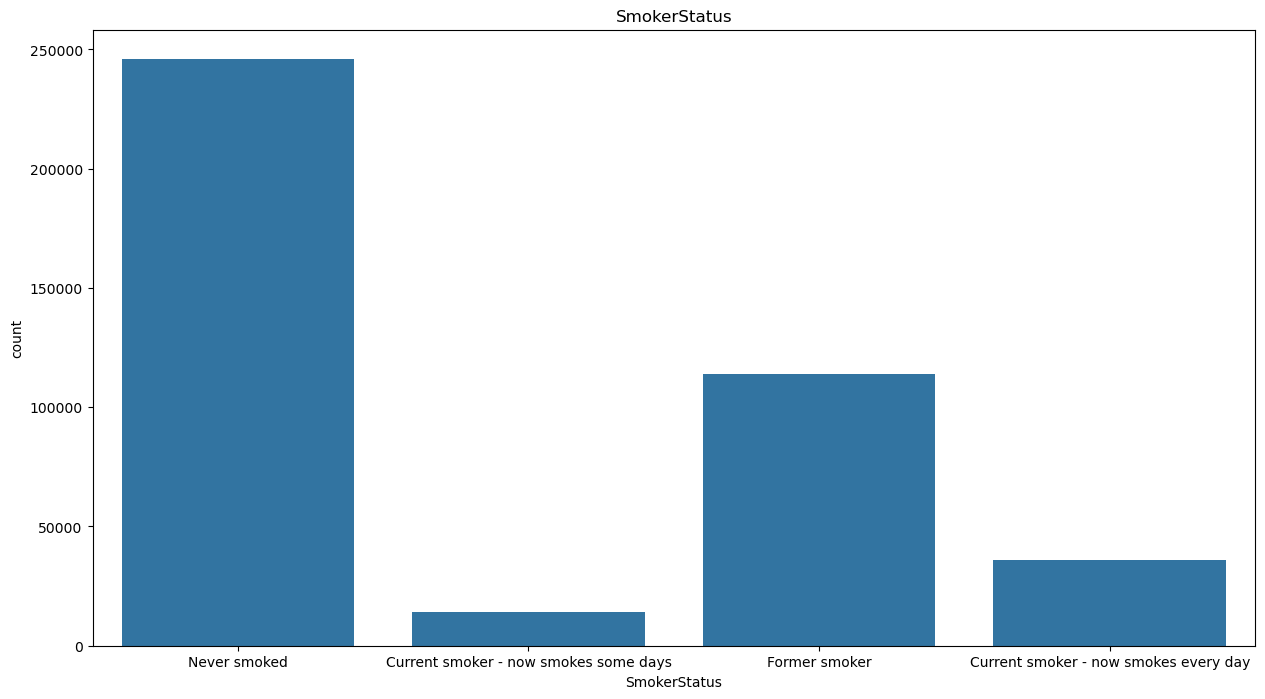

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

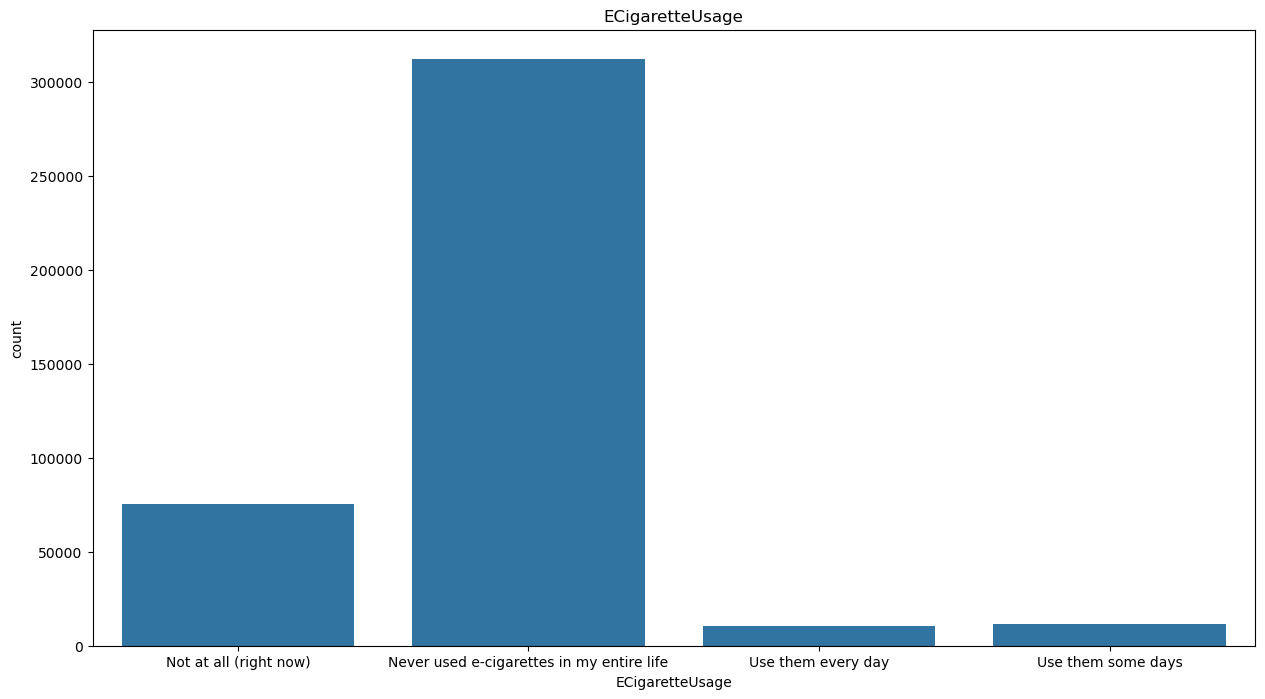

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

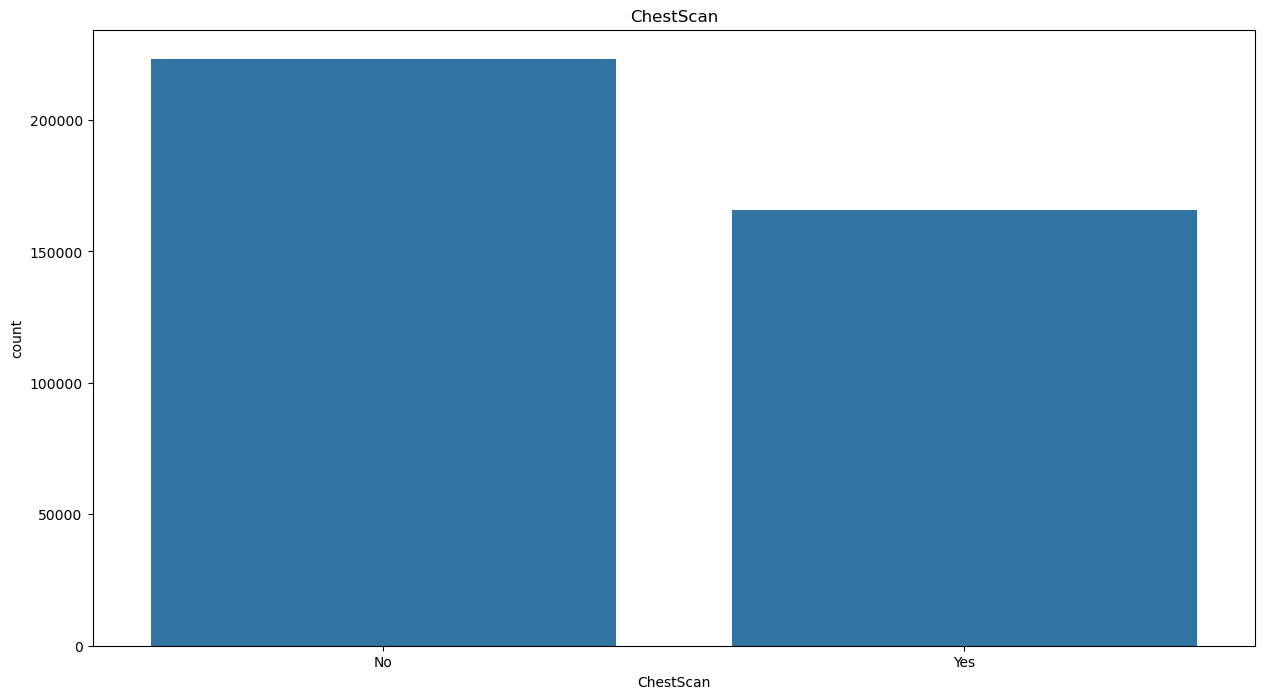

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

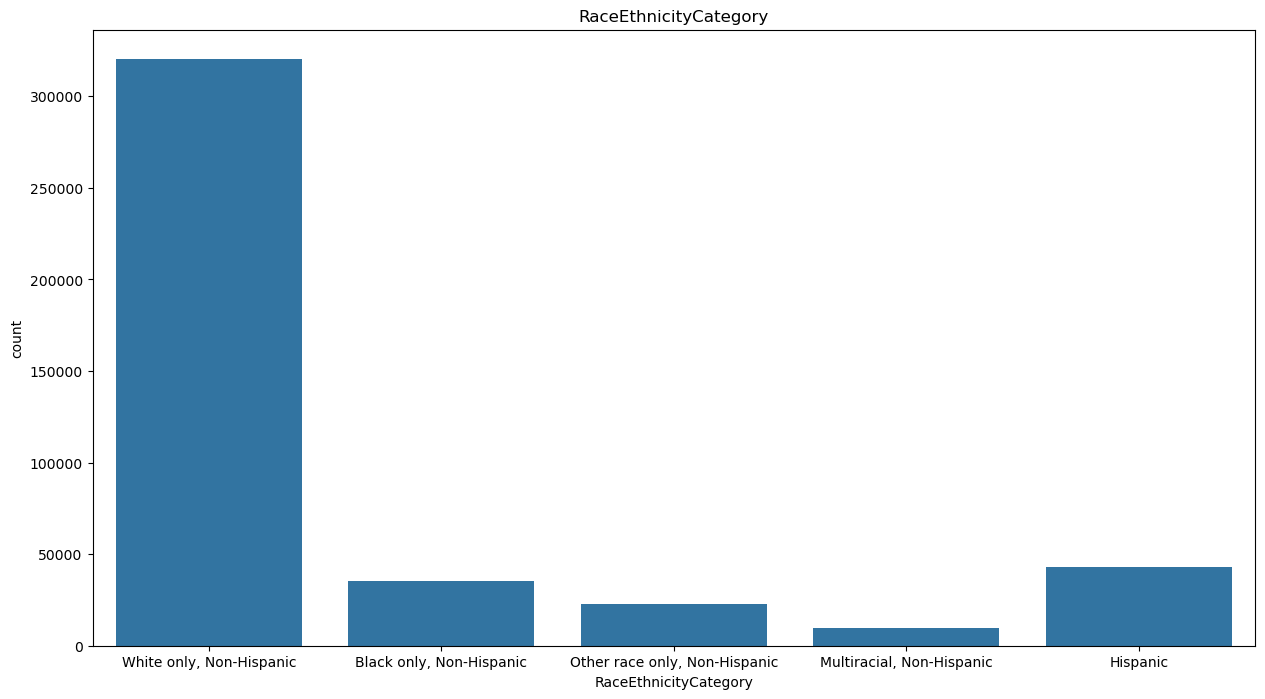

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

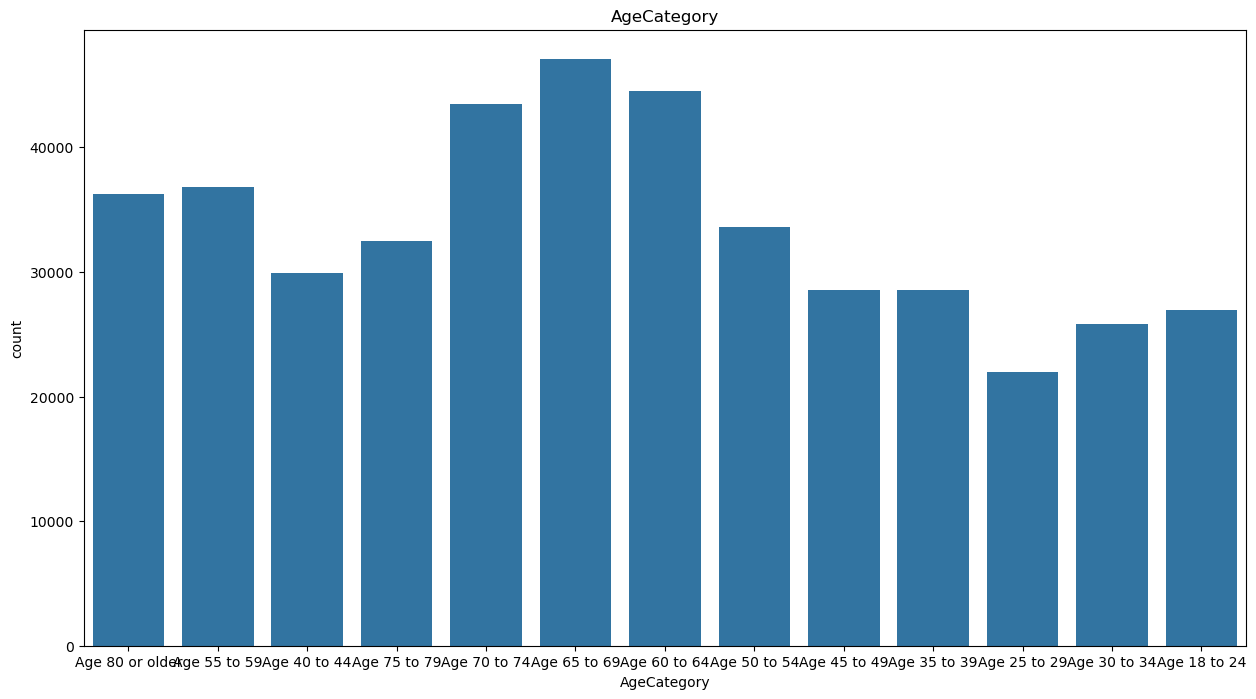

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

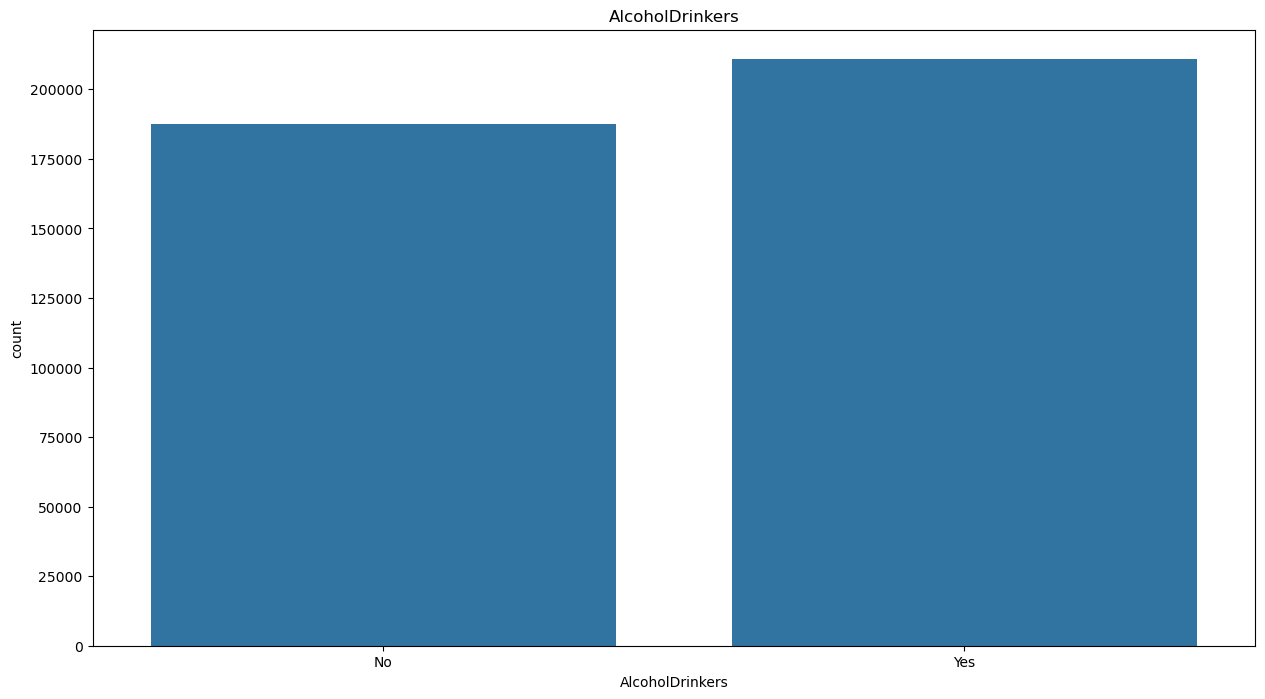

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

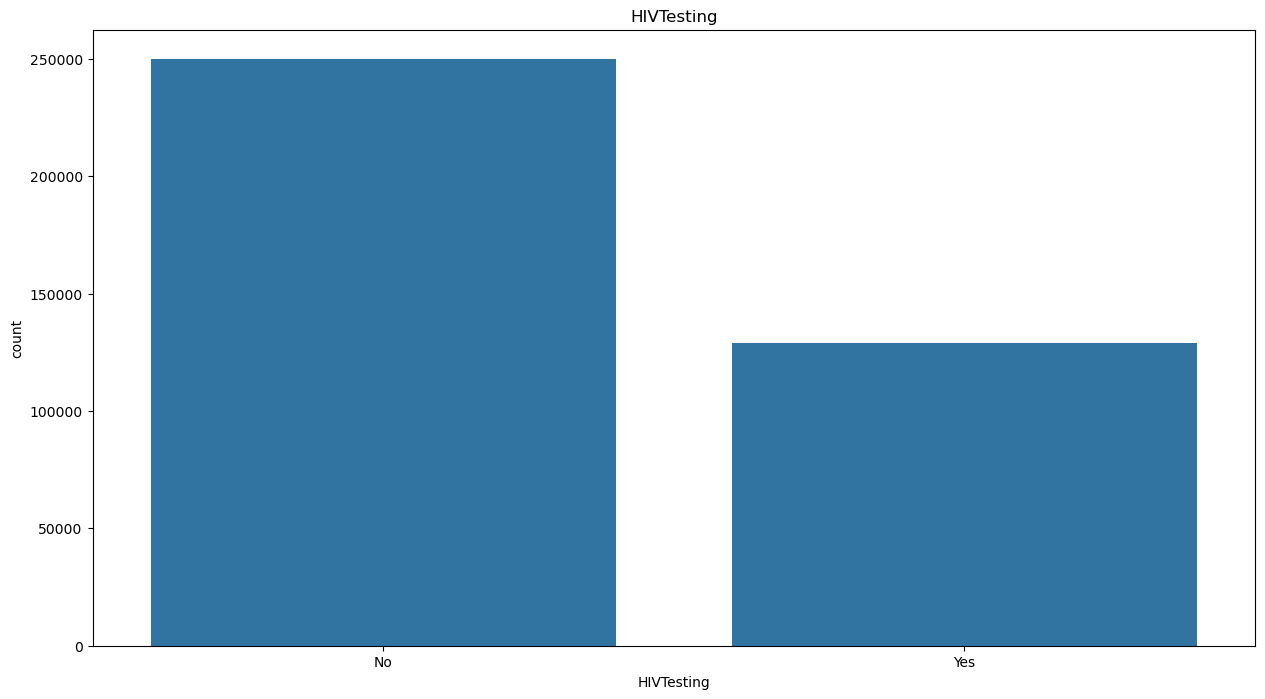

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

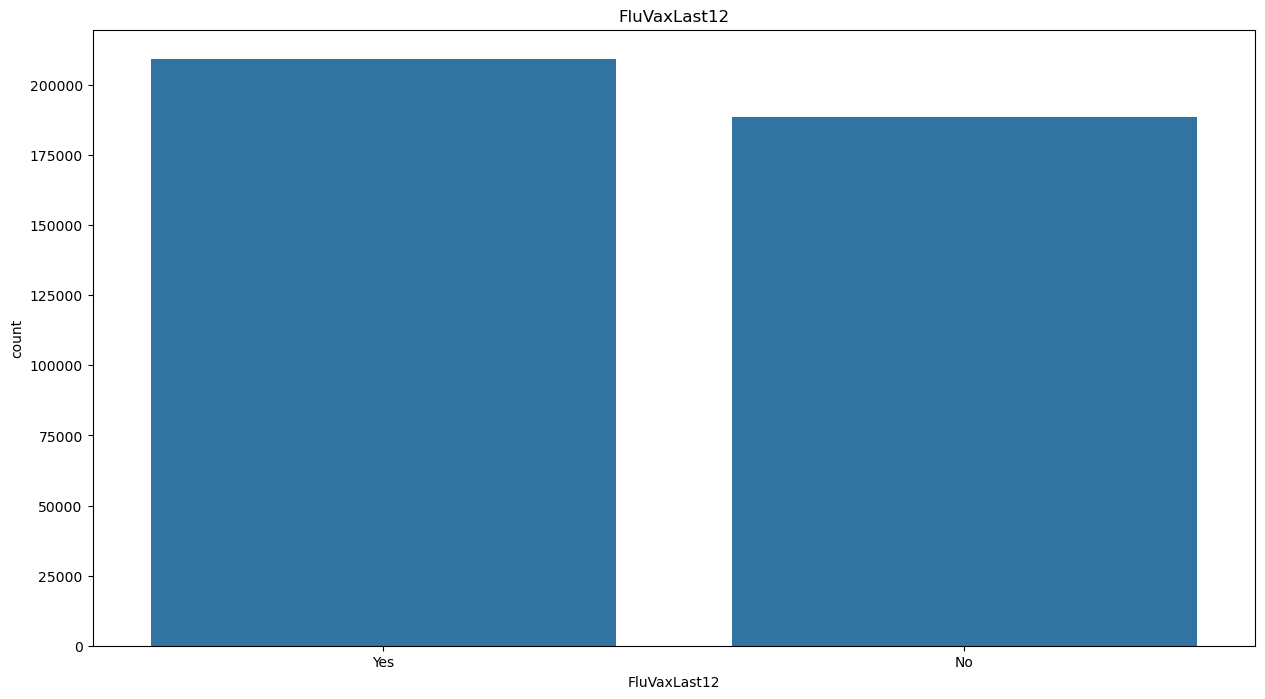

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

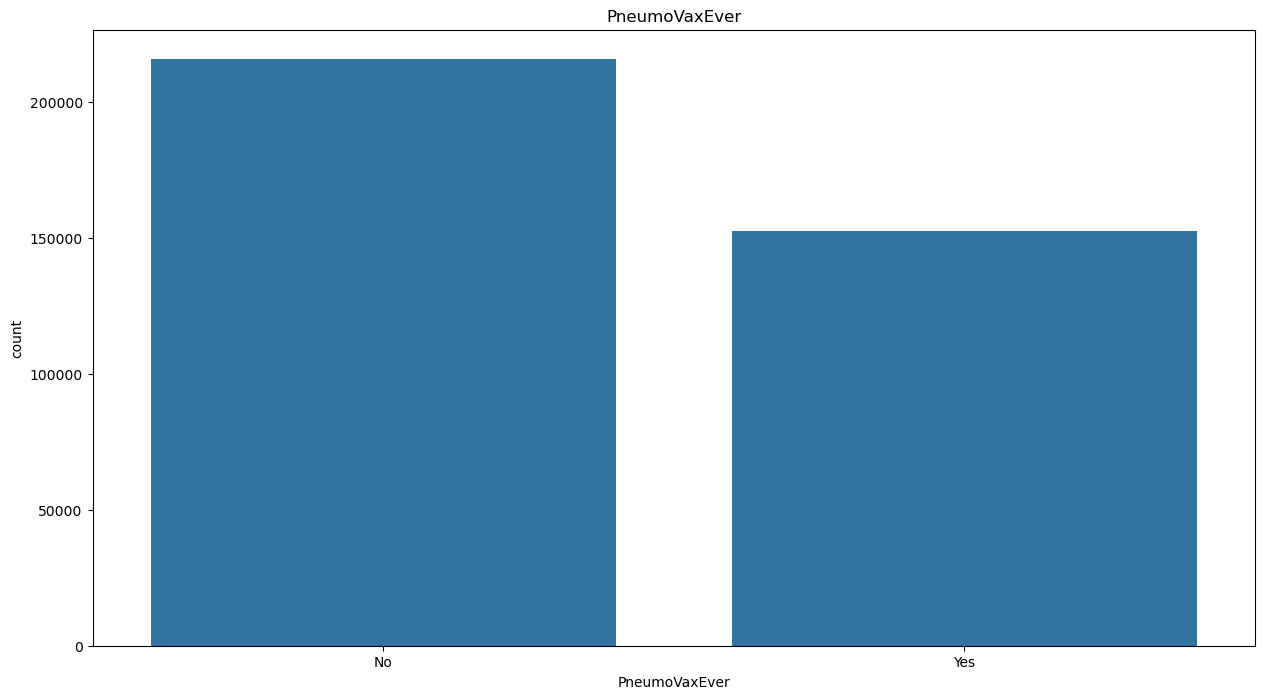

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

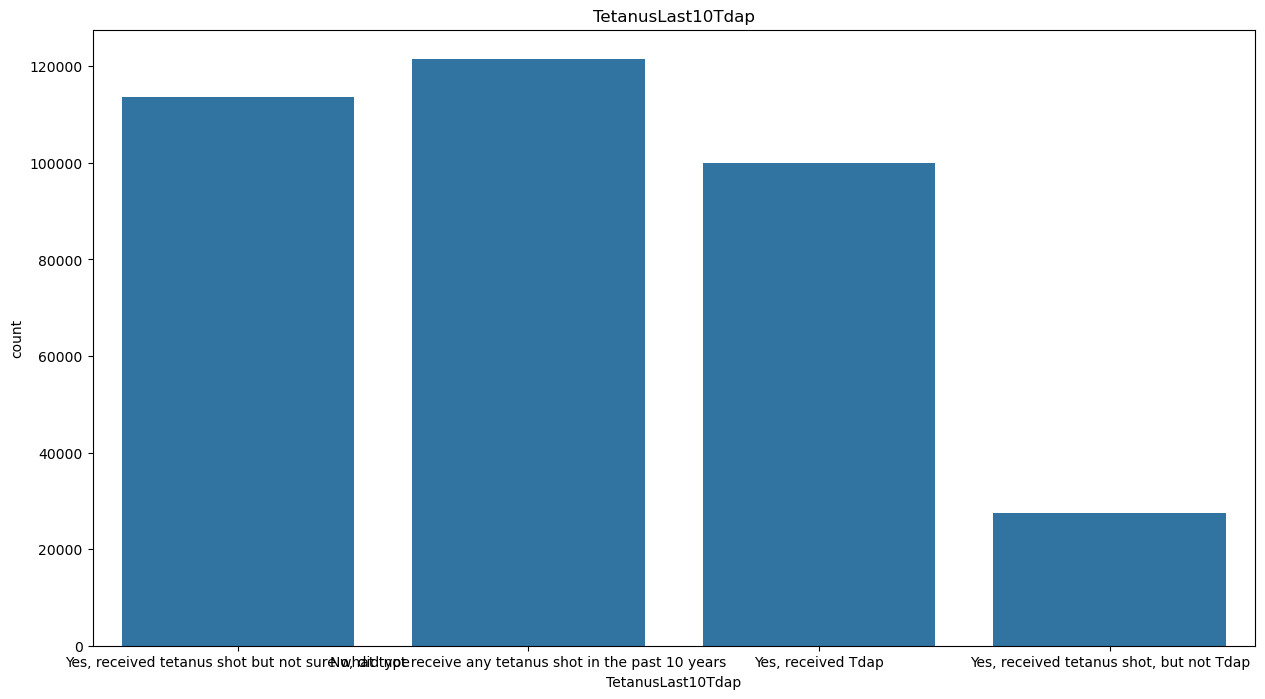

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

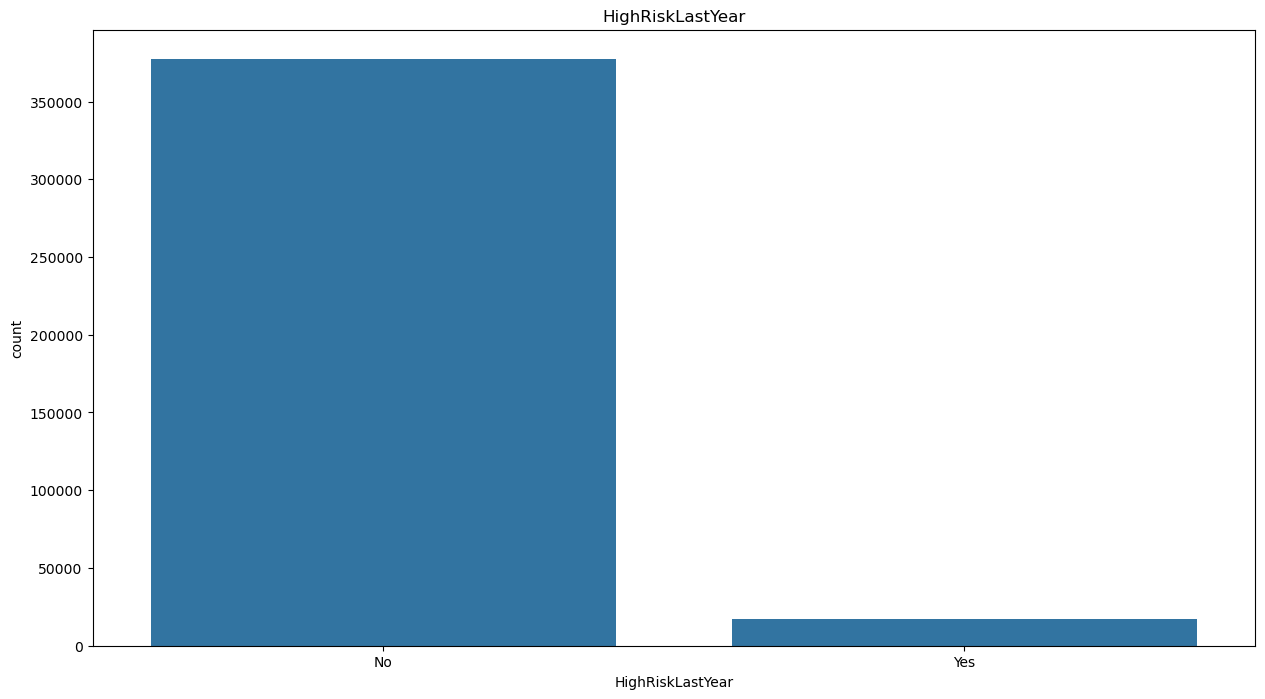

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

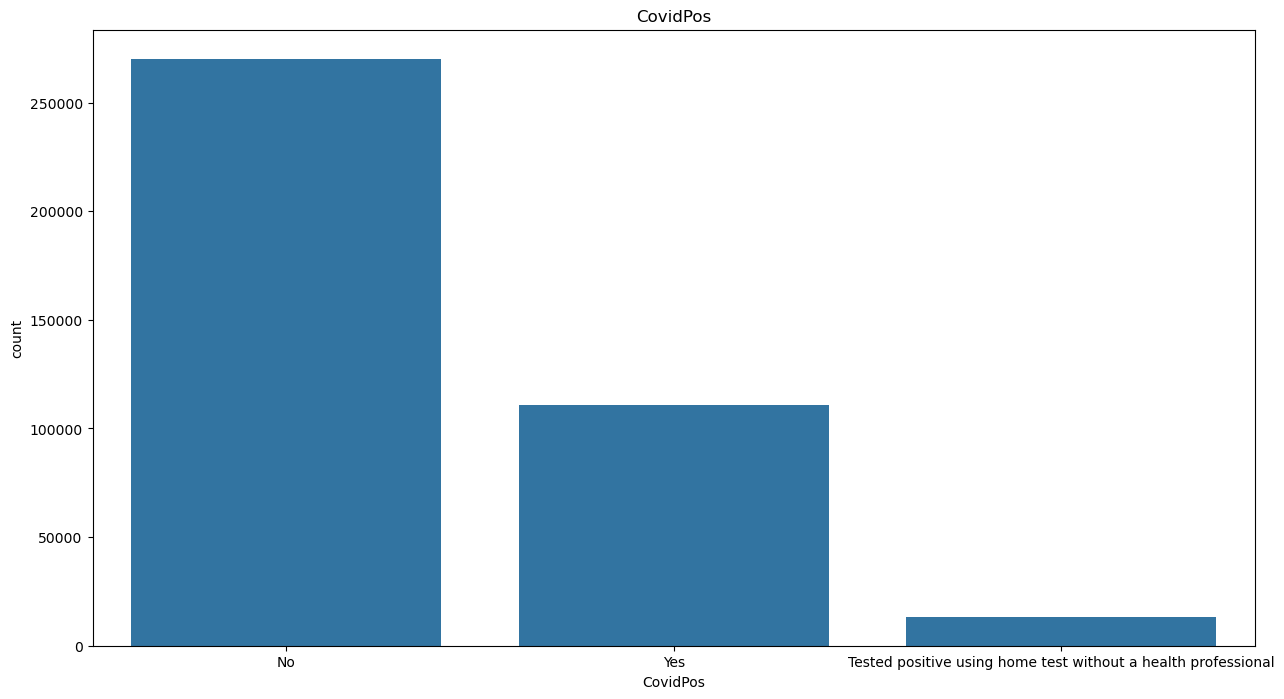

In [ ]:
# Univariate analysis of Categorical Variables

for i in df.select_dtypes('O').columns:
    plt.figure(figsize=[15,8])
    plt.title(i)
    sns.countplot(x=df[i])
    plt.show()

### Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PhysicalHealthDays
Median of Yes: 2.0
Mean of Yes: 9.394226787045474


Median of No: 0.0
Mean of No: 4.023424989930545


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MentalHealthDays
Median of Yes: 0.0
Mean of Yes: 5.394099569760295


Median of No: 0.0
Mean of No: 4.311951027358717


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SleepHours
Median of Yes: 7.0
Mean of Yes: 7.046846407222154


Median of No: 7.0
Mean of No: 7.02178206770712


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HeightInMeters
Median of Yes: 1.73
Mean of Yes: 1.7120879167016543


Median of No: 1.7
Mean of No: 1.7021886551584477


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WeightInKilograms
Median of Yes: 83.91
Mean of Yes: 86.30044861337684


Median of No: 80.29
Mean of No: 82.87852638637466


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BMI
Median of Yes: 28.29
Mean of Yes: 29.32099240286521


Median of No: 27.4
Mean of No: 28.4786276259598


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

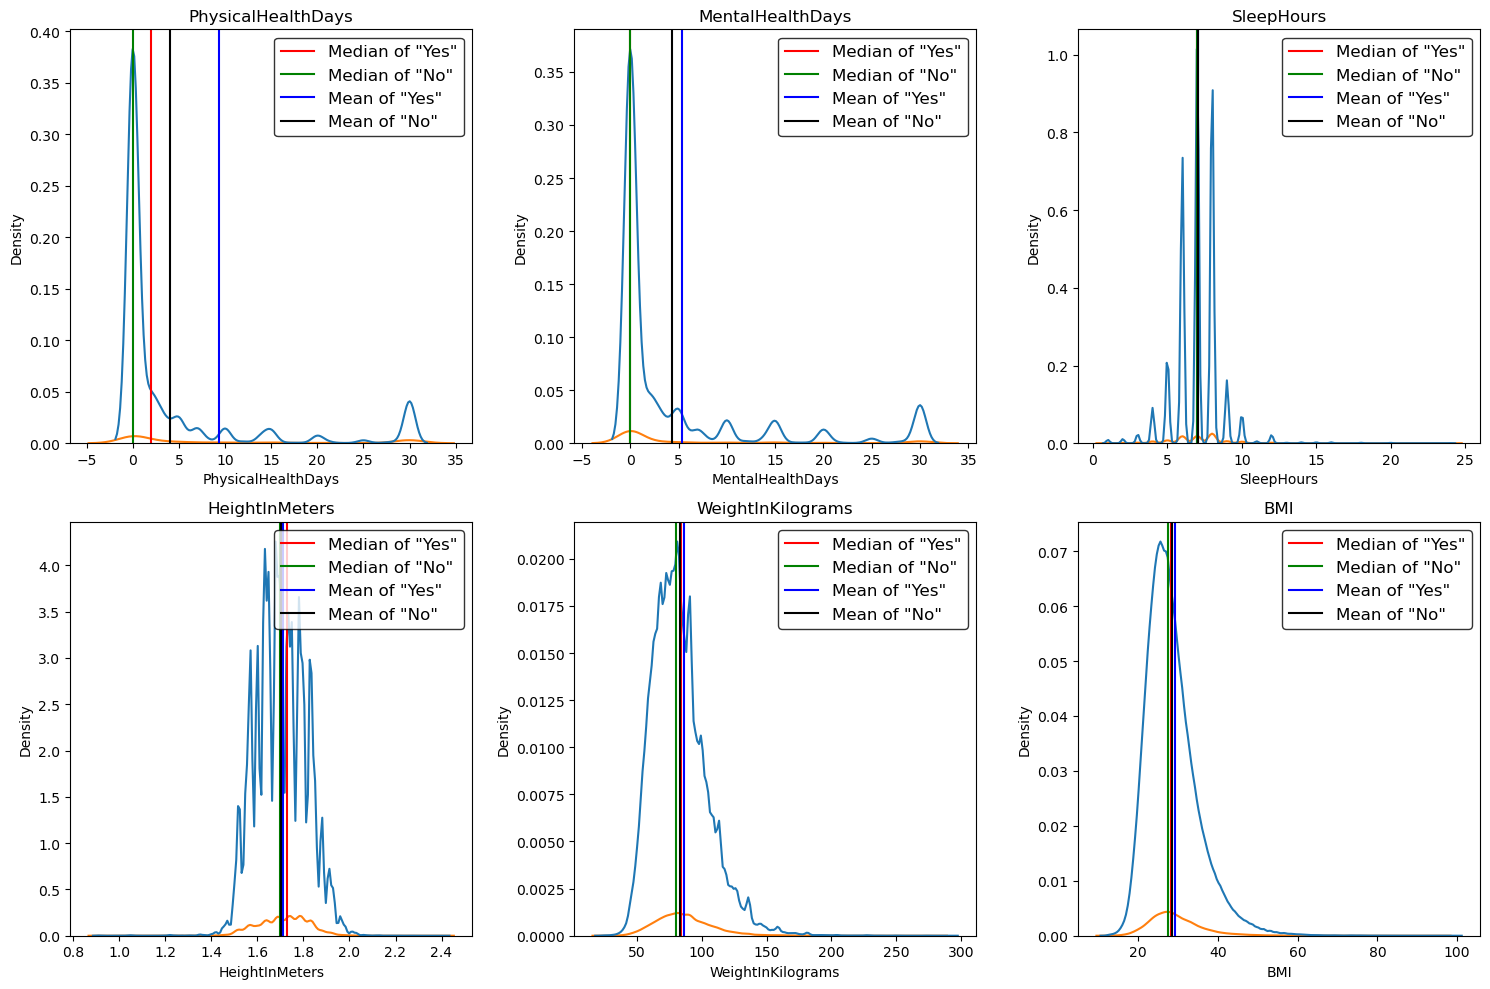

In [ ]:
# Bivariate analysis with target variable and numerical variables
plt.figure(figsize=[15,10])
t=1
for i in df.select_dtypes(np.number):
    plt.subplot(2,3,t)
    plt.title(i)
    sns.kdeplot(x=df[i],hue=df['HadHeartAttack'])
    plt.axvline(x=df[df['HadHeartAttack']=='Yes'][i].median(),color='red',label = 'Median of "Yes"')
    plt.axvline(x=df[df['HadHeartAttack']=='No'][i].median(),color='green',label = 'Median of "No"')
    plt.axvline(x=df[df['HadHeartAttack']=='Yes'][i].mean(),color='blue',label = 'Mean of "Yes"')
    plt.axvline(x=df[df['HadHeartAttack']=='No'][i].mean(),color='black',label = 'Mean of "No"')
    plt.legend(loc='upper right', fontsize=12, facecolor='white', edgecolor='black', frameon=True)
    print(i)
    print('Median of Yes:',df[df['HadHeartAttack']=='Yes'][i].median())
    print('Mean of Yes:',df[df['HadHeartAttack']=='Yes'][i].mean())
    print('\n')
    print('Median of No:',df[df['HadHeartAttack']=='No'][i].median())
    print('Mean of No:',df[df['HadHeartAttack']=='No'][i].mean())

    t+=1


plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

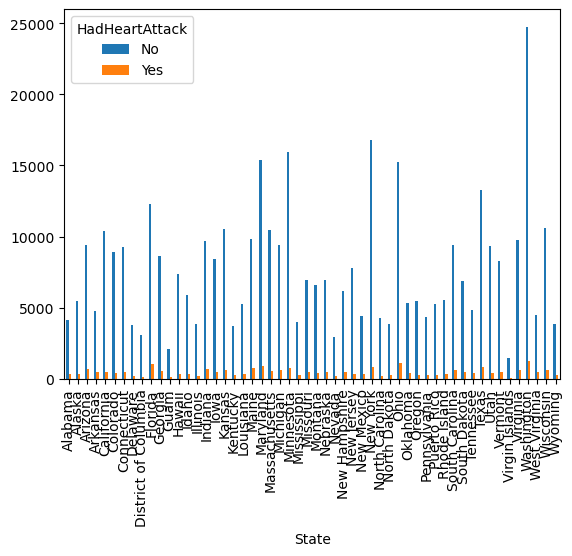

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

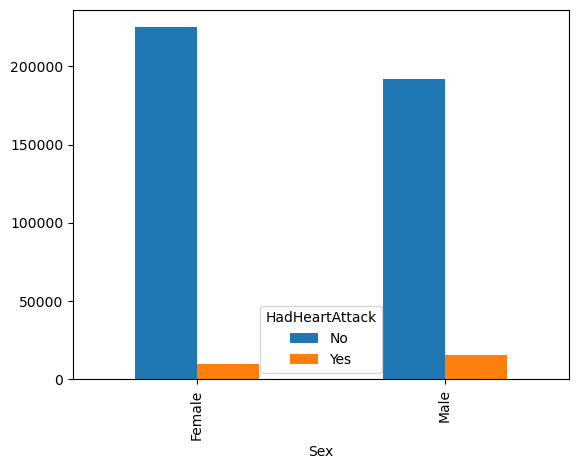

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

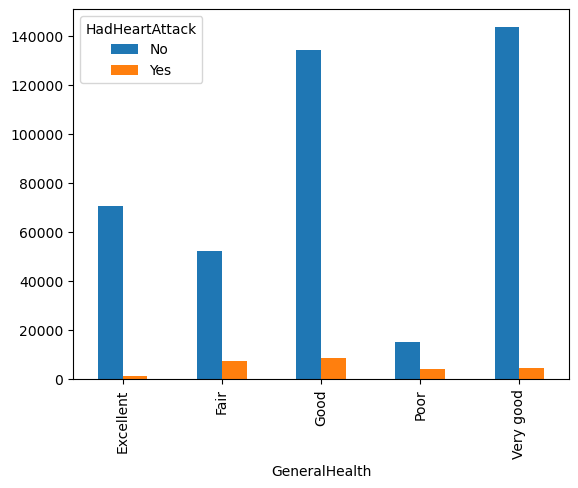

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

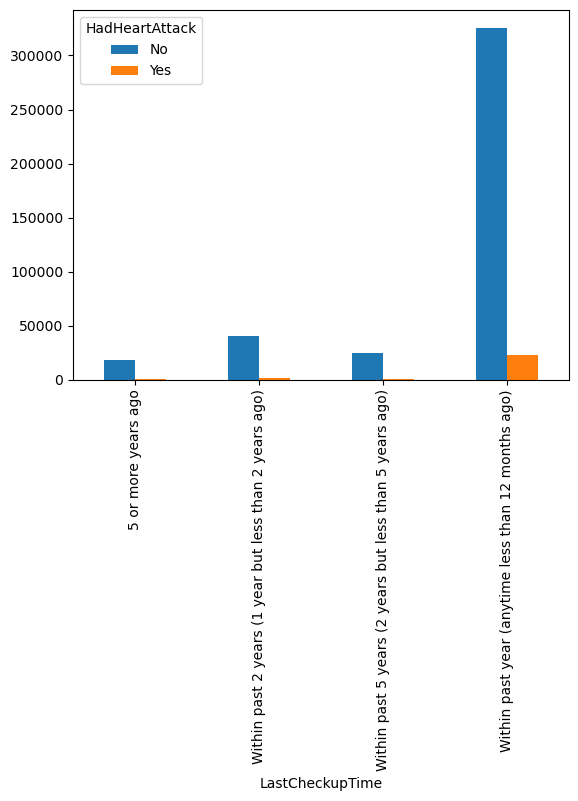

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

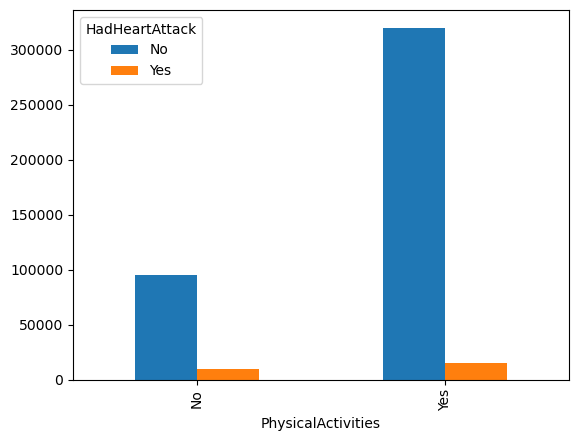

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

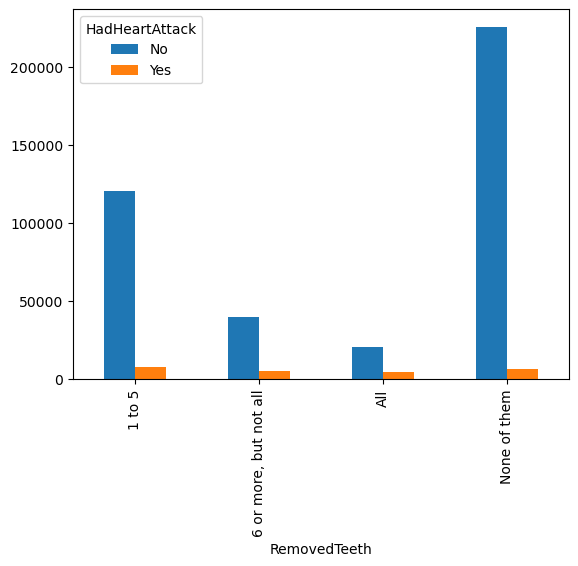

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

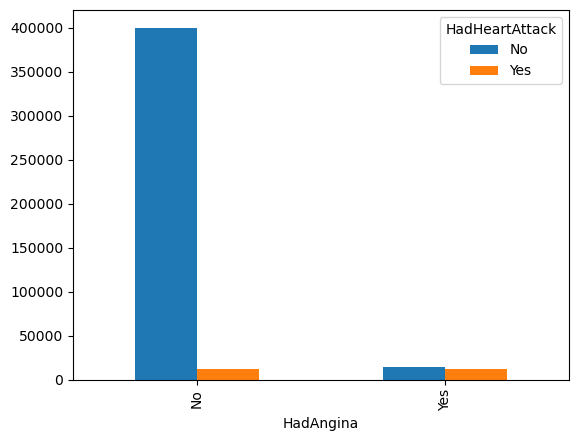

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

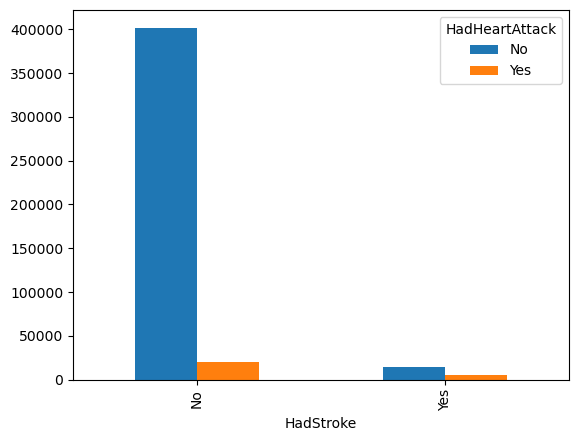

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

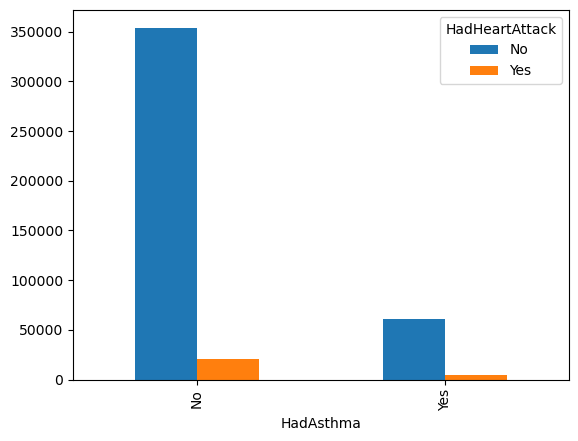

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

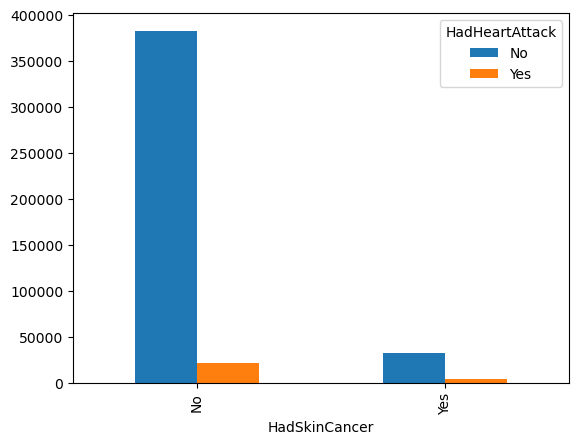

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

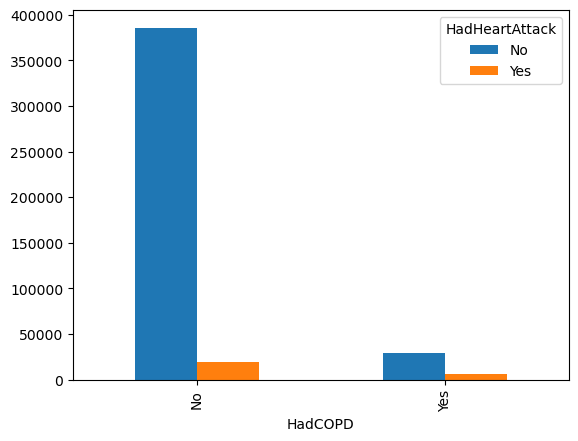

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

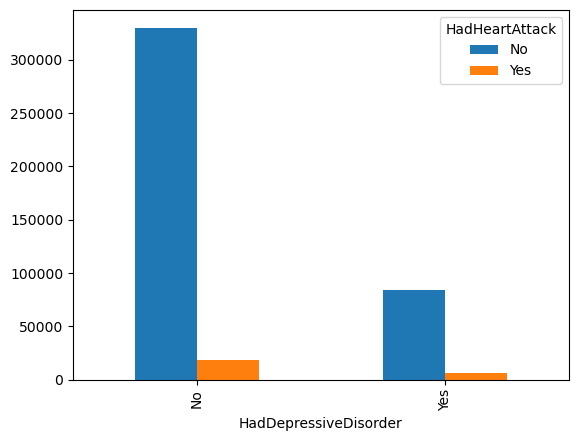

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

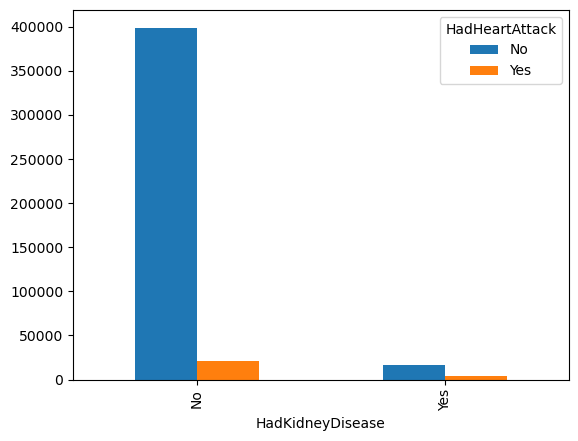

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

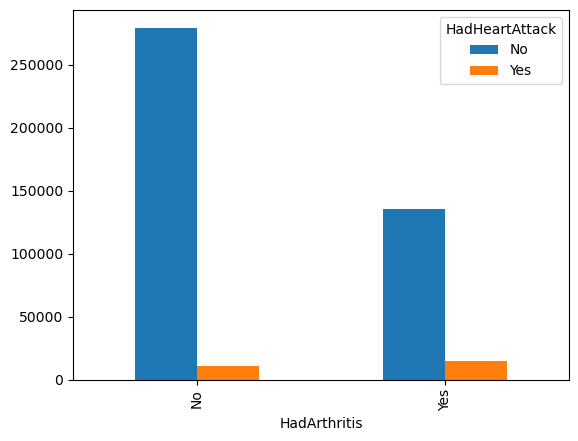

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

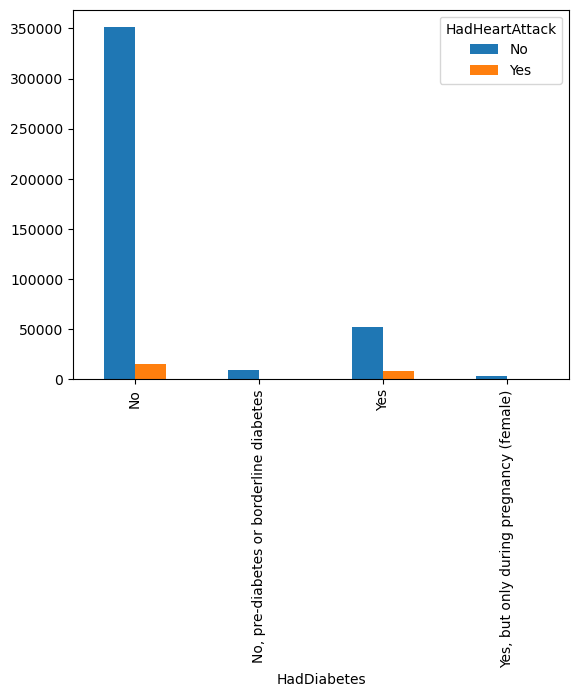

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

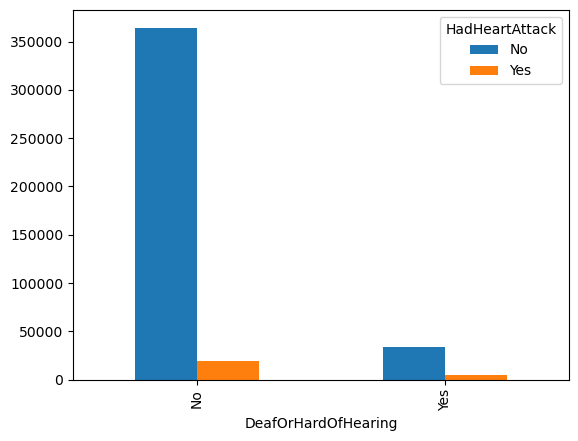

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

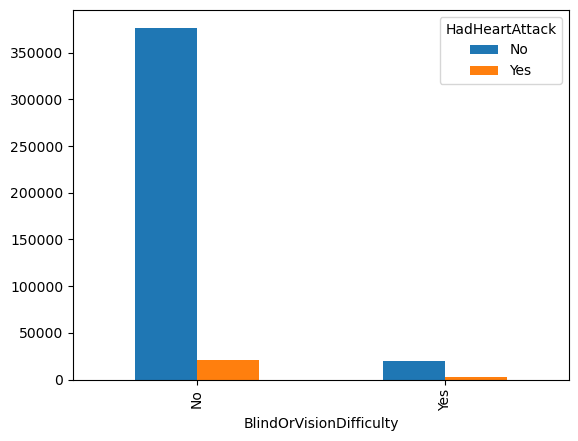

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

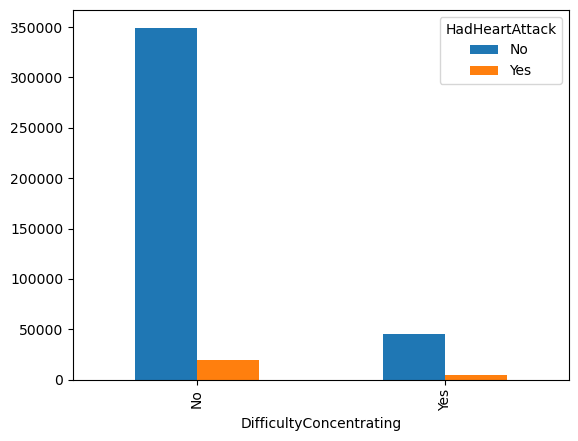

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

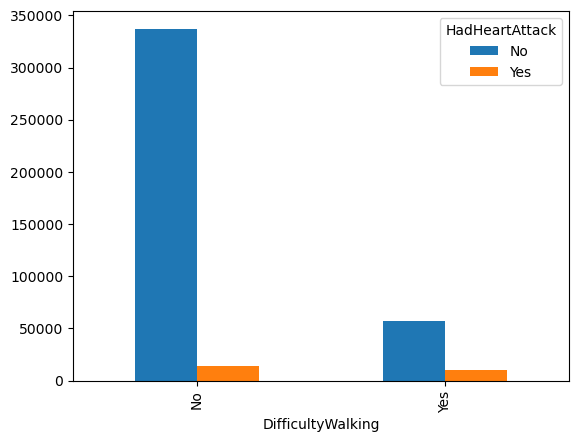

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

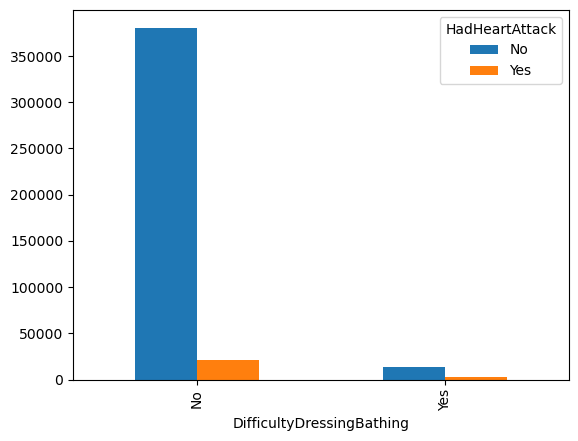

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

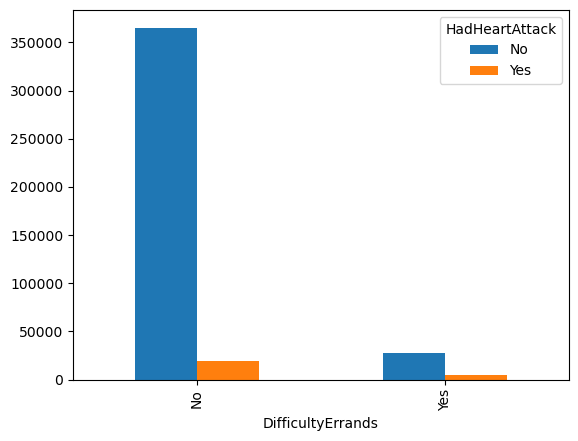

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

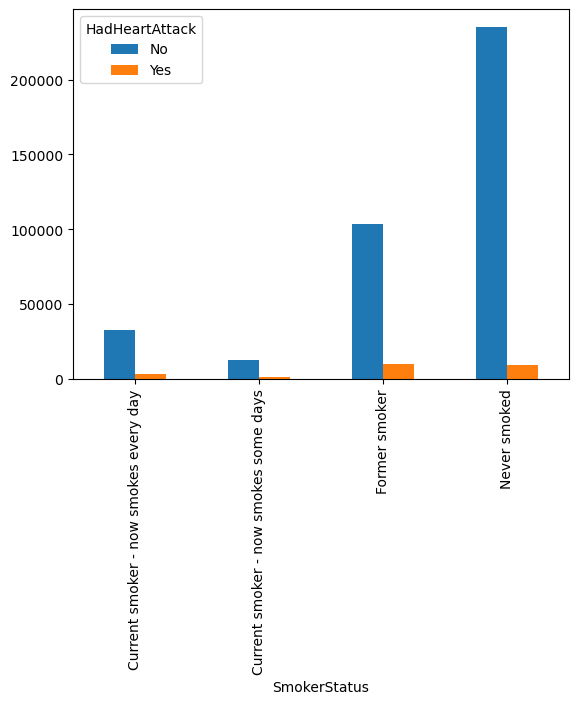

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

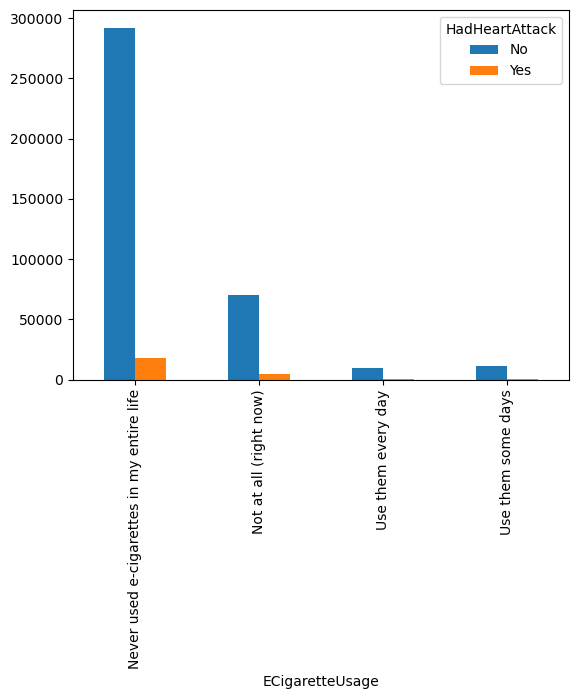

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

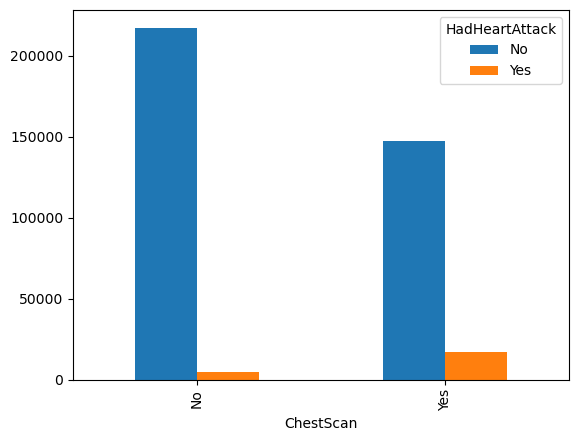

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

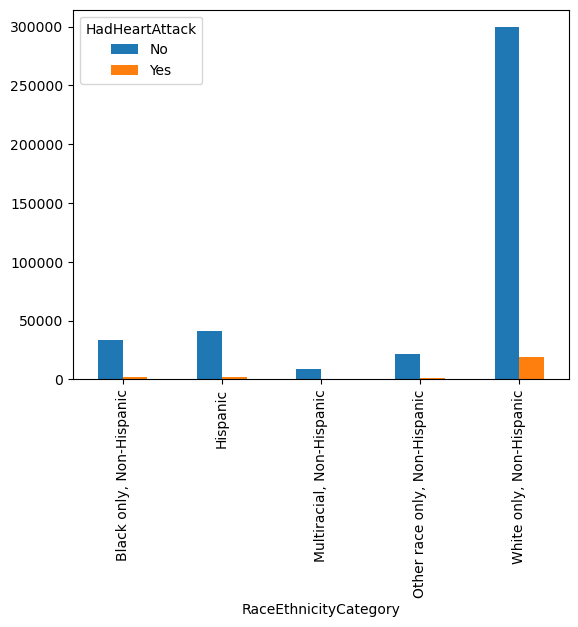

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

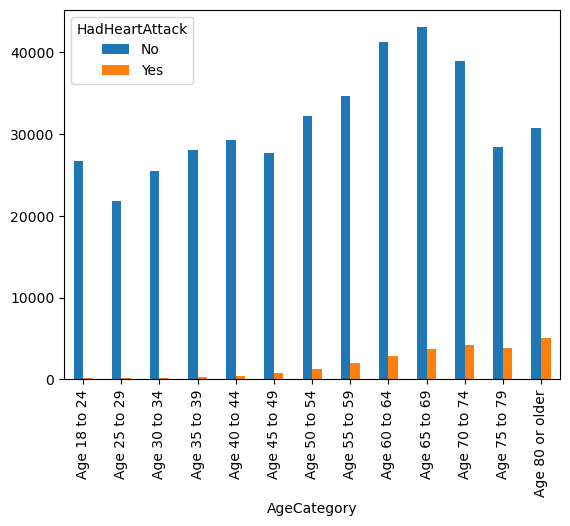

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

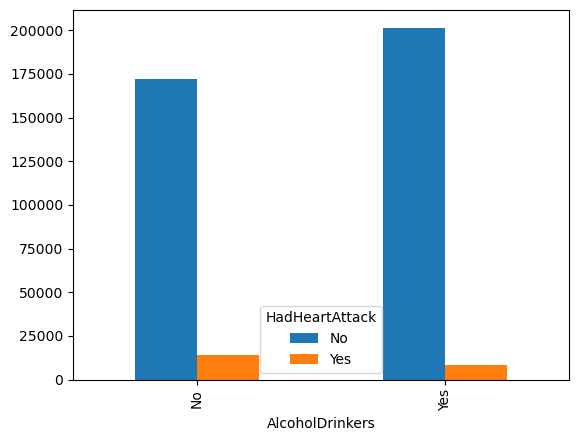

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

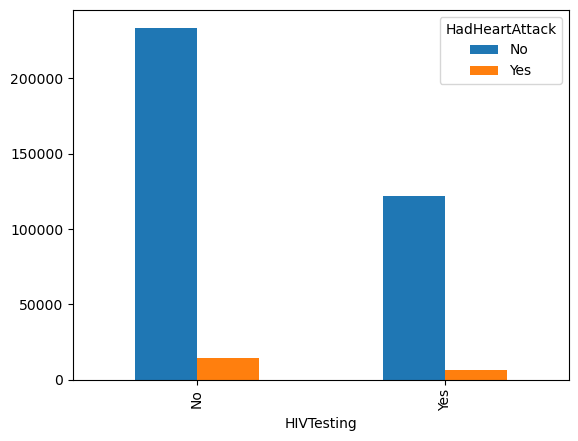

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

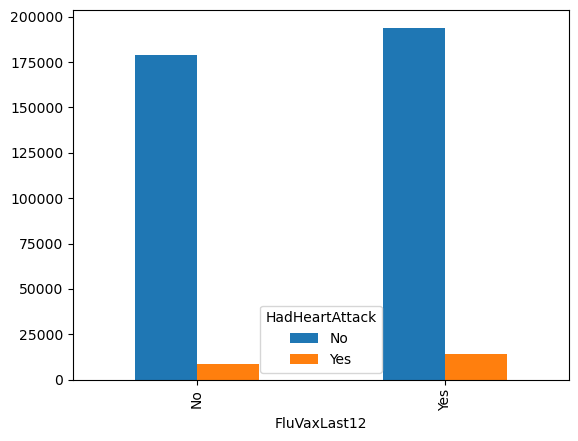

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

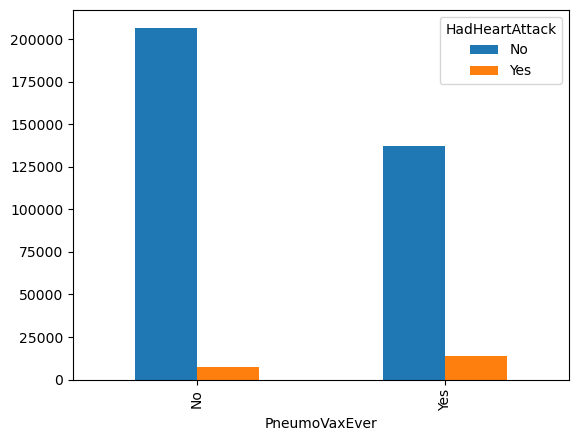

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

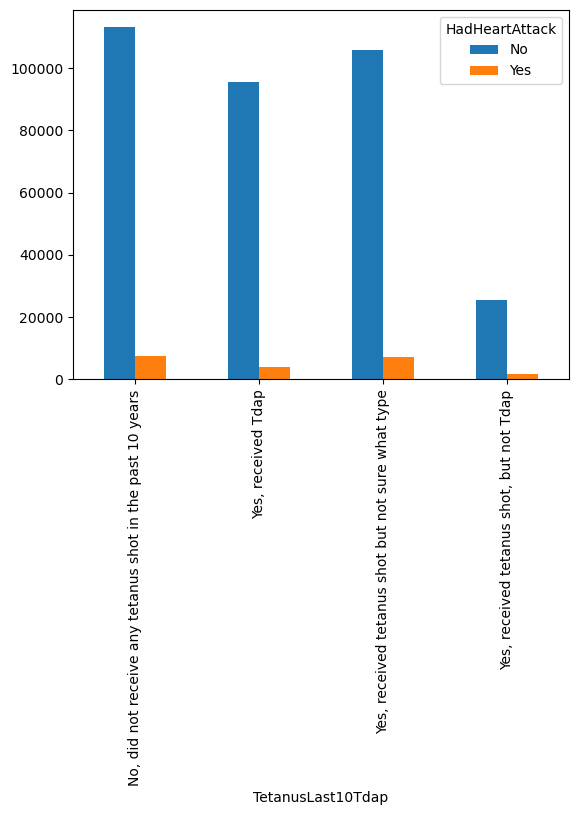

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

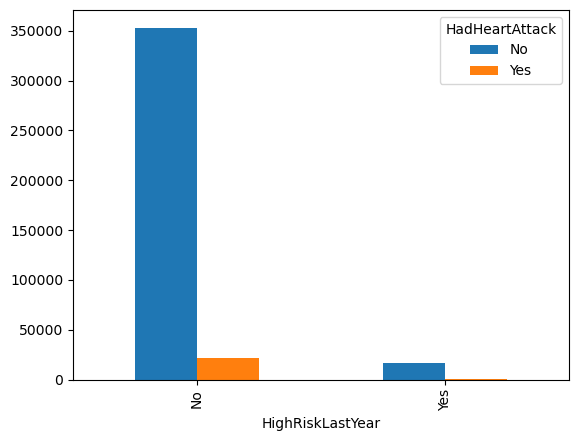

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

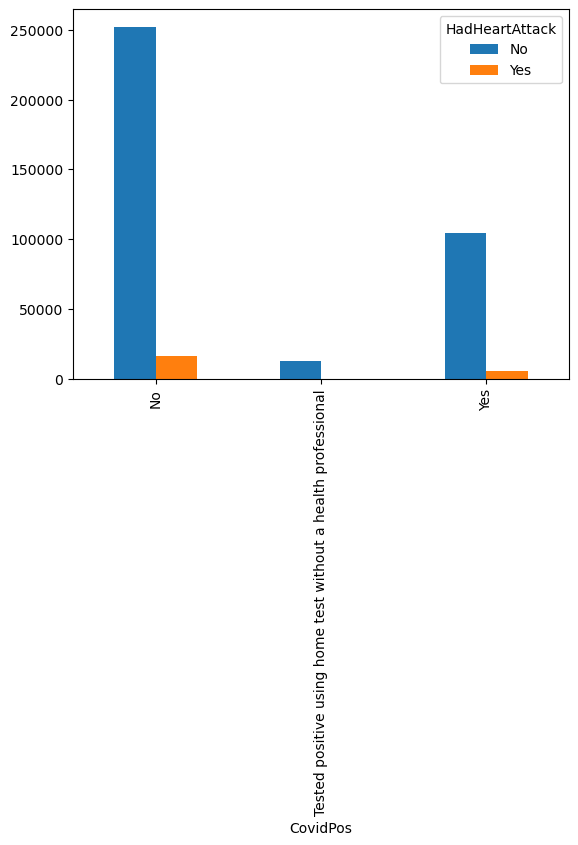

In [ ]:
# Bivariate analysis with the target and categorical columns
for i in df.select_dtypes('O').drop('HadHeartAttack',axis=1):
    pd.crosstab(df[i],df['HadHeartAttack']).plot(kind='bar')
    plt.show()

* There is a significant imbalance in the data as well as in the target variable.
* Therefore the model will not be that accurate because it has only seen most of the data for one sub category only.

### Multivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

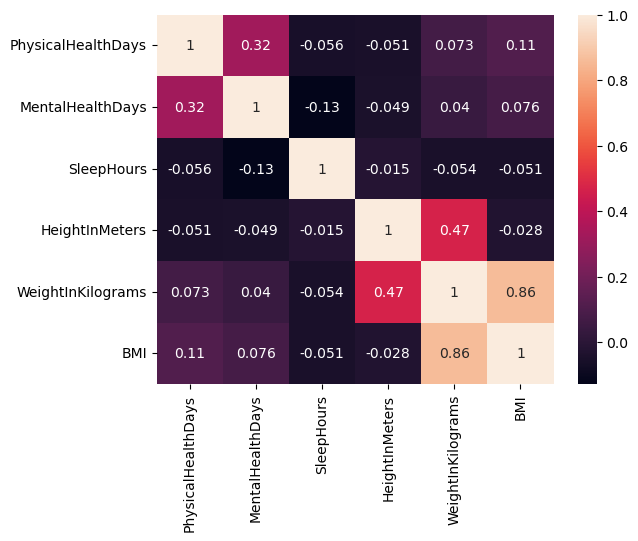

In [ ]:
# Multivariate analysis with the numerical columns
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

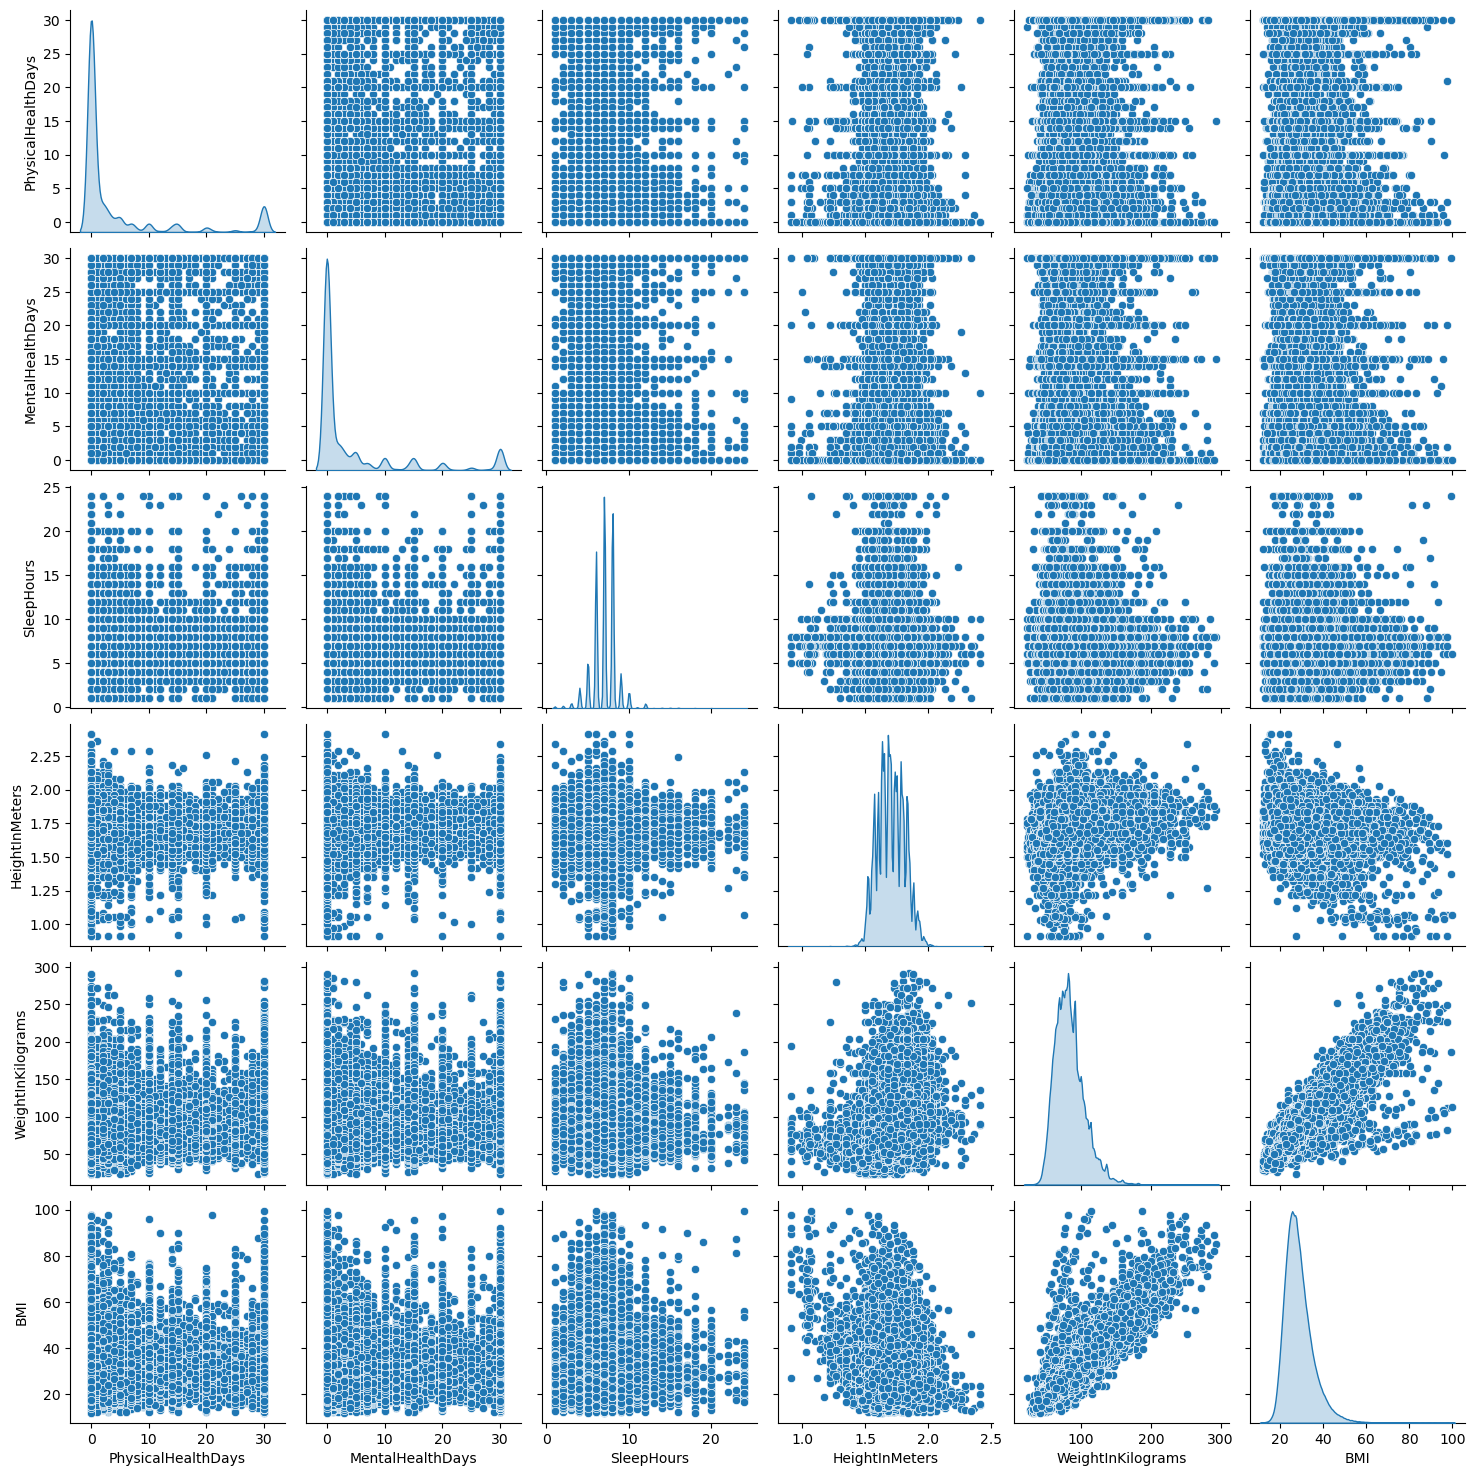

In [ ]:
# Pairplot for multivariate analysis
sns.pairplot(df.select_dtypes(np.number),diag_kind='kde')
plt.show()

* There is a correlation b/w Weight in Kilograms and BMI. It is a positive trend that we can see from the visualization.
* And there can be seen a slight trend with Hright and BMI and Height and Weight

# Treatment of Missing values

In [14]:
row_null.shape

(445132,)

In [15]:
# Treating missing values row wise with minimum 10 columns should have non-null values in a row.
df.dropna(axis=0,thresh=10,inplace=True)

In [16]:
# Checking missing values column wise
df.isnull().sum()/df.shape[0]

State                        0.000000
Sex                          0.000000
GeneralHealth                0.002601
PhysicalHealthDays           0.024456
MentalHealthDays             0.020271
LastCheckupTime              0.018495
PhysicalActivities           0.002300
SleepHours                   0.012107
RemovedTeeth                 0.025331
HadHeartAttack               0.006658
HadAngina                    0.009668
HadStroke                    0.003266
HadAsthma                    0.003752
HadSkinCancer                0.006831
HadCOPD                      0.004754
HadDepressiveDisorder        0.006089
HadKidneyDisease             0.004096
HadArthritis                 0.005685
HadDiabetes                  0.002212
DeafOrHardOfHearing          0.045873
BlindOrVisionDifficulty      0.047932
DifficultyConcentrating      0.053943
DifficultyWalking            0.053433
DifficultyDressingBathing    0.053213
DifficultyErrands            0.057126
SmokerStatus                 0.079168
ECigaretteUsage              0.079611
ChestScan                    0.125430
RaceEthnicityCategory        0.031362
AgeCategory                  0.020192
HeightInMeters               0.063854
WeightInKilograms            0.094033
BMI                          0.109154
AlcoholDrinkers              0.104139
HIVTesting                   0.148091
FluVaxLast12                 0.105369
PneumoVaxEver                0.172621
TetanusLast10Tdap            0.184930
HighRiskLastYear             0.113245
CovidPos                     0.113557
dtype: float64

In [17]:
# Separating rows where the Target column has null values.
heart_null = df[df['HadHeartAttack'].isnull()]
heart_null

# Here we are not considering the rows which has null values in the target columns because
# it is not good to impute synthetic data to the target column and along with that the percentage of missing values
# in the target column is very small. Therefore it is best to remove the records from building the model.

State     Sex GeneralHealth  PhysicalHealthDays  \
270            Alabama  Female          Poor                30.0   
586            Alabama  Female          Good                14.0   
601            Alabama    Male     Excellent                 0.0   
700            Alabama    Male          Good                 0.0   
723            Alabama  Female          Fair                 6.0   
...                ...     ...           ...                 ...   
444900  Virgin Islands    Male     Very good                 7.0   
444942  Virgin Islands    Male          Poor                30.0   
445007  Virgin Islands    Male          Good                 0.0   
445018  Virgin Islands    Male          Fair                 0.0   
445072  Virgin Islands    Male          Good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
270                 30.0  Within past year (anytime less than 12 months ...   
586                 15.0  Within past year (anytime less than 12 months ...   
601                  0.0                                                NaN   
700                  0.0  Within past year (anytime less than 12 months ...   
723                  0.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
444900               0.0  Within past 2 years (1 year but less than 2 ye...   
444942               NaN  Within past year (anytime less than 12 months ...   
445007               0.0  Within past year (anytime less than 12 months ...   
445018               0.0  Within past year (anytime less than 12 months ...   
445072              30.0  Within past 5 years (2 years but less than 5 y...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
270                   Yes         5.0                     NaN            NaN   
586                    No         7.0                  1 to 5            NaN   
601                   Yes         6.0  6 or more, but not all            NaN   
700                   Yes         5.0                  1 to 5            NaN   
723                    No         9.0                     NaN            NaN   
...                   ...         ...                     ...            ...   
444900                Yes        10.0                  1 to 5            NaN   
444942                 No         2.0            None of them            NaN   
445007                 No         8.0                     All            NaN   
445018                 No         5.0  6 or more, but not all            NaN   
445072                Yes         7.0            None of them            NaN   

        ... HeightInMeters WeightInKilograms    BMI AlcoholDrinkers  \
270     ...           1.68             73.48  26.15              No   
586     ...           1.65             71.67  26.29             Yes   
601     ...           1.83             90.72  27.12             Yes   
700     ...           1.78             63.50  20.09              No   
723     ...           1.57            104.33  42.07              No   
...     ...            ...               ...    ...             ...   
444900  ...           1.78             88.90  28.12             Yes   
444942  ...           1.75             77.11  25.10             Yes   
445007  ...           1.75            113.40  36.92             NaN   
445018  ...           1.73             83.91  28.13             Yes   
445072  ...           1.73             74.84  25.09             NaN   

       HIVTesting FluVaxLast12 PneumoVaxEver  \
270            No          Yes           Yes   
586            No           No           Yes   
601            No           No            No   
700           NaN          Yes           Yes   
723            No          Yes           NaN   
...           ...          ...           ...   
444900        Yes           No           Yes   
444942        Yes          Yes           Yes   
44500

In [18]:
df = df[~df['HadHeartAttack'].isnull()]
df

State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 0.0   
1              Alabama  Female     Excellent                 0.0   
2              Alabama  Female     Very good                 2.0   
3              Alabama  Female     Excellent                 0.0   
4              Alabama  Female          Fair                 2.0   
...                ...     ...           ...                 ...   
445127  Virgin Islands  Female          Good                 0.0   
445128  Virgin Islands  Female     Excellent                 2.0   
445129  Virgin Islands  Female          Poor                30.0   
445130  Virgin Islands    Male     Very good                 0.0   
445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0                                                NaN   
2                    3.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                    0.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
445127               3.0  Within past 2 years (1 year but less than 2 ye...   
445128               2.0  Within past year (anytime less than 12 months ...   
445129              30.0                                5 or more years ago   
445130               0.0  Within past year (anytime less than 12 months ...   
445131               1.0                                                NaN   

       PhysicalActivities  SleepHours  RemovedTeeth HadHeartAttack  ...  \
0                      No         8.0           NaN             No  ...   
1                      No         6.0           NaN             No  ...   
2                     Yes         5.0           NaN             No  ...   
3                     Yes         7.0           NaN             No  ...   
4                     Yes         9.0           NaN             No  ...   
...                   ...         ...           ...            ...  ...   
445127                Yes         6.0  None of them             No  ...   
445128                Yes         7.0  None of them             No  ...   
445129                 No         5.0        1 to 5             No  ...   
445130                 No         5.0  None of them            Yes  ...   
445131                Yes         5.0  None of them             No  ...   

       HeightInMeters WeightInKilograms    BMI AlcoholDrinkers HIVTesting  \
0                 NaN               NaN    NaN              No         No   
1                1.60             68.04  26.57              No         No   
2                1.57             63.50  25.61              No         No   
3                1.65             63.50  23.30              No         No   
4                1.57             53.98  21.77             Yes         No   
...               ...               ...    ...             ...        ...   
445127           1.65             69.85  25.63             NaN        Yes   
445128           1.70             83.01  28.66              No        Yes   
445129           1.70             49.90  17.23             NaN         No   
445130           1.83            108.86  32.55              No        Yes   
445131           1.68             63.50  22.60             Yes         No   

       FluVaxLast12 PneumoVaxEver  \
0               Yes            No   
1                No            No   
2                No            No   
3               Yes           Yes   
4                No           Yes   
...             ...           ...   
445127           No            No   
445128          Yes            No   
445129           No            No   
445130          Yes           Yes   
445131           N

In [ ]:
# Using KNN Imputation for missing value imputation in numerical columns like weight,height,physicalHealthdays,MentalHealthDays,SleepHours.
knn = KNNImputer(n_neighbors=5,weights='distance')
num_cols = ['WeightInKilograms','HeightInMeters','PhysicalHealthDays','MentalHealthDays','SleepHours']

df[num_cols] = knn.fit_transform(df[num_cols])

In [ ]:
# creating a pickle file for the knn imputer.
with open('/content/drive/MyDrive/knn_imputer.pkl', 'wb') as file:
    pickle.dump(knn, file)

<IPython.core.display.Javascript object>

In [7]:
# Imputing missing values of BMI with the direct equation.
df['BMI'].fillna(round(df['WeightInKilograms']/(df['HeightInMeters'])**2,2),inplace=True)

In [8]:
num_cols = ['WeightInKilograms','HeightInMeters','PhysicalHealthDays','MentalHealthDays','SleepHours','BMI']
df[num_cols]

WeightInKilograms  HeightInMeters  PhysicalHealthDays  \
0                  81.192           1.748                 0.0   
1                  68.040           1.600                 0.0   
2                  63.500           1.570                 2.0   
3                  63.500           1.650                 0.0   
4                  53.980           1.570                 2.0   
...                   ...             ...                 ...   
441909             69.850           1.650                 0.0   
441910             83.010           1.700                 2.0   
441911             49.900           1.700                30.0   
441912            108.860           1.830                 0.0   
441913             63.500           1.680                 0.0   

        MentalHealthDays  SleepHours    BMI  
0                    0.0         8.0  26.57  
1                    0.0         6.0  26.57  
2                    3.0         5.0  25.61  
3                    0.0         7.0  23.30  
4                    0.0         9.0  21.77  
...                  ...         ...    ...  
441909               3.0         6.0  25.63  
441910               2.0         7.0  28.66  
441911              30.0         5.0  17.23  
441912               0.0         5.0  32.55  
441913               1.0         5.0  22.60  

[441914 rows x 6 columns]

In [9]:
df.isnull().sum()/df.shape[0]

State                        0.000000
Sex                          0.000000
GeneralHealth                0.002478
PhysicalHealthDays           0.000000
MentalHealthDays             0.000000
LastCheckupTime              0.018191
PhysicalActivities           0.002200
SleepHours                   0.000000
RemovedTeeth                 0.024914
HadHeartAttack               0.000000
HadAngina                    0.008117
HadStroke                    0.002419
HadAsthma                    0.003250
HadSkinCancer                0.006252
HadCOPD                      0.004157
HadDepressiveDisorder        0.005476
HadKidneyDisease             0.003650
HadArthritis                 0.005232
HadDiabetes                  0.001837
DeafOrHardOfHearing          0.045568
BlindOrVisionDifficulty      0.047631
DifficultyConcentrating      0.053526
DifficultyWalking            0.053094
DifficultyDressingBathing    0.052888
DifficultyErrands            0.056776
SmokerStatus                 0.078746
ECigaretteUsage              0.079203
ChestScan                    0.124789
RaceEthnicityCategory        0.030986
AgeCategory                  0.019916
HeightInMeters               0.000000
WeightInKilograms            0.000000
BMI                          0.000000
AlcoholDrinkers              0.103629
HIVTesting                   0.147468
FluVaxLast12                 0.104851
PneumoVaxEver                0.172133
TetanusLast10Tdap            0.184271
HighRiskLastYear             0.112789
CovidPos                     0.113110
dtype: float64

In [10]:
for i in df.select_dtypes('O'):
    print(df[i].value_counts(normalize = True))
    print('---------------------------------')

State
Washington              0.058806
New York                0.039861
Minnesota               0.037865
Ohio                    0.037086
Maryland                0.036865
Texas                   0.031954
Florida                 0.030038
Wisconsin               0.025360
Kansas                  0.025288
Massachusetts           0.024792
California              0.024552
Maine                   0.023950
Indiana                 0.023468
Virginia                0.023421
Arizona                 0.022828
South Carolina          0.022547
Michigan                0.022525
Utah                    0.022108
Connecticut             0.021925
Colorado                0.021058
Georgia                 0.020730
Iowa                    0.020097
Vermont                 0.019814
New Jersey              0.018422
Hawaii                  0.017436
Nebraska                0.016806
Missouri                0.016705
South Dakota            0.016693
Montana                 0.015863
New Hampshire           0.015168
Idah

In [11]:
# AgeCategory Mode imputation
df['AgeCategory'] = df['AgeCategory'].fillna(df['AgeCategory'].mode()[0])

In [12]:
# LastCheckupTime Mode imputation
df['LastCheckupTime'] = df['LastCheckupTime'].fillna(df['LastCheckupTime'].mode()[0])

In [13]:
# CovidPos Mode imputation
df['CovidPos'] = df['CovidPos'].fillna(df['CovidPos'].mode()[0])

In [14]:
# HighRiskLastYear Mode imputation
df['HighRiskLastYear'] = df['HighRiskLastYear'].fillna(df['HighRiskLastYear'].mode()[0])

In [15]:
# RemovedTeeth Mode imputation
df['RemovedTeeth'] = df['RemovedTeeth'].fillna(df['RemovedTeeth'].mode()[0])

In [16]:
# HIVTesting Mode imputation
df['HIVTesting'] = df['HIVTesting'].fillna(df['HIVTesting'].mode()[0])

In [17]:
# Imputing 'White only, Non-Hispanic' for states like 'Arkansas', 'Connecticut', 'Delaware', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts',
# 'Michigan', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma',
# 'Pennsylvania', 'Rhode Island','South Dakota', 'Vermont', 'Virginia', 'West Virginia', 'Wyoming'
# because the population of this particular race is high in these states.
df.loc[df['State'].isin(['Arkansas', 'Connecticut', 'Delaware', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts',
                         'Michigan', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma','Missouri','Utah',
                         'Pennsylvania', 'Rhode Island','South Dakota', 'Vermont', 'Virginia', 'West Virginia', 'Wyoming',
                        'Idaho', 'Montana', 'Oregon', 'Washington', 'Wisconsin']),
'RaceEthnicityCategory'] = df.loc[df['State'].isin(['Arkansas', 'Connecticut', 'Delaware', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts',
                         'Michigan', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma','Missouri','Utah',
                         'Pennsylvania', 'Rhode Island','South Dakota', 'Vermont', 'Virginia', 'West Virginia', 'Wyoming',
                        'Idaho', 'Montana', 'Oregon', 'Washington', 'Wisconsin']),
'RaceEthnicityCategory'].fillna('White only, Non-Hispanic')


# Imputing 'Hispanic' for states like Arizona, California, Colorado, Florida, New Mexico, Nevada, Texas
# because the population of this particular race is high in these states.
df.loc[df['State'].isin(['Arizona', 'California', 'Colorado', 'Florida', 'New Mexico', 'Nevada', 'Texas']),
       'RaceEthnicityCategory'] = df.loc[df['State'].isin(['Arizona', 'California', 'Colorado', 'Florida',
                                                           'New Mexico', 'Nevada', 'Texas']),
                                                             'RaceEthnicityCategory'].fillna('Hispanic')


# Imputing 'Black only, Non-Hispanic' for states like 'Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Maryland',
# 'Mississippi', 'North Carolina','South Carolina', 'Tennessee', 'District of Columbia
# because the population of this particular race is high in these states.
df.loc[df['State'].isin(['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina',
                         'South Carolina', 'Tennessee', 'District of Columbia','Virgin Islands']),
'RaceEthnicityCategory'] = df.loc[df['State'].isin(['Alabama', 'Arkansas', 'Georgia', 'Louisiana',
                                                    'Maryland', 'Mississippi', 'North Carolina', 'South Carolina',
                                                    'Tennessee', 'District of Columbia','Virgin Islands']),
'RaceEthnicityCategory'].fillna('Black only, Non-Hispanic')



# Imputing 'Multiracial, Non-Hispanic' for states like 'Illinois', 'New Jersey', 'New York',
# 'Hawaii', 'Alaska', 'Puerto Rico' because the population of this particular race is high in these states.
df.loc[df['State'].isin(['Illinois', 'New Jersey', 'New York', 'Hawaii', 'Alaska', 'Puerto Rico']),
    'RaceEthnicityCategory'] = df.loc[df['State'].isin(['Illinois', 'New Jersey', 'New York', 'Hawaii',
                                                        'Alaska', 'Puerto Rico']),
                                         'RaceEthnicityCategory'].fillna('Multiracial, Non-Hispanic')


df.loc[df['State']=='Guam',
    'RaceEthnicityCategory'] = df.loc[df['State']=='Guam',
                                'RaceEthnicityCategory'].fillna('Other race only, Non-Hispanic')

In [18]:
df['RaceEthnicityCategory'].isnull().sum()

0

In [19]:
df['SmokerStatus'].mode()

0    Never smoked
Name: SmokerStatus, dtype: object

In [20]:
# The prevalence of current cigarette smoking among young adults 18–25 years of age is about 31.8%.

# Define condition for assigning 'Current smoker - now smokes some days'
cond = df['AgeCategory'].isin(['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34'])

# Update the 'SmokerStatus' column in a vectorized way
df.loc[df['SmokerStatus'].isnull() & cond, 'SmokerStatus'] = 'Current smoker - now smokes some days'


# Calculate the mode for each HadHeartAttack category
modes = df.groupby('HadHeartAttack')['SmokerStatus'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill the missing values in a vectorized way
df.loc[df['SmokerStatus'].isnull(), 'SmokerStatus'] = df.loc[df['SmokerStatus'].isnull(), 'HadHeartAttack'].map(modes)


In [21]:
# Define conditions for assigning values to 'ECigaretteUsage'
cond1 = (df['SmokerStatus'] == 'Current smoker - now smokes every day')
cond2 = (df['SmokerStatus'] == 'Current smoker - now smokes some days')
cond3 = (df['SmokerStatus'] == 'Former smoker')

# Update the 'ECigaretteUsage' column in a vectorized way
df.loc[df['ECigaretteUsage'].isnull() & cond1, 'ECigaretteUsage'] = 'Use them some days'
df.loc[df['ECigaretteUsage'].isnull() & cond2, 'ECigaretteUsage'] = 'Not at all (right now)'
df.loc[df['ECigaretteUsage'].isnull() & cond3, 'ECigaretteUsage'] = 'Not at all (right now)'
df.loc[df['ECigaretteUsage'].isnull(), 'ECigaretteUsage'] = 'Never used e-cigarettes in my entire life'


In [22]:
# Define conditions for assigning 'Yes'
cond1 = (df['HadHeartAttack'] == 'Yes')
cond2 = (
    df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older']) &
    (df['SmokerStatus'] == 'Current smoker - now smokes every day')
)

# Update 'HadAngina' column in a vectorized way
df.loc[df['HadAngina'].isnull() & (cond1 | cond2), 'HadAngina'] = 'Yes'
df.loc[df['HadAngina'].isnull(), 'HadAngina'] = 'No'

In [23]:
# Define conditions for 'Very good'
cond_very_good = (
    (df['PhysicalHealthDays'] <= 2) &
    (df['MentalHealthDays'] <= 2) &
    (df['HadHeartAttack'] == 'No') &
    (df['HadDiabetes'] == 'No') &
    (df['HadArthritis'] == 'No')
)

# Define conditions for 'Good'
cond_good = (
    (df['PhysicalHealthDays'] > 2) &
    (df['PhysicalHealthDays'] <= 7) &
    (df['MentalHealthDays'] <= 7) &
    (df['HadHeartAttack'] == 'No') &
    (df['HadDiabetes'] == 'No')
)

# Define conditions for 'Fair'
cond_fair = (
    (df['PhysicalHealthDays'] > 7) &
    (df['MentalHealthDays'] > 7) &
    (
        (df['HadHeartAttack'] == 'Yes') |
        (df['HadDiabetes'] == 'Yes') |
        (df['HadArthritis'] == 'Yes')
    )
)

# Update the 'GeneralHealth' column using the conditions
df.loc[df['GeneralHealth'].isnull() & cond_very_good, 'GeneralHealth'] = 'Very good'
df.loc[df['GeneralHealth'].isnull() & cond_good, 'GeneralHealth'] = 'Good'
df.loc[df['GeneralHealth'].isnull() & cond_fair, 'GeneralHealth'] = 'Fair'
df.loc[df['GeneralHealth'].isnull(), 'GeneralHealth'] = 'Poor'

In [24]:
df['GeneralHealth'].isnull().sum()

0

In [25]:
# Define conditions for assigning 'Yes'
cond1 = (df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])) & (df['BMI'] >= 30)
cond2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 15)

# Update the 'HadDiabetes' column in a vectorized way
df.loc[df['HadDiabetes'].isnull() & (cond1 | cond2), 'HadDiabetes'] = 'Yes'
df.loc[df['HadDiabetes'].isnull(), 'HadDiabetes'] = 'No'


In [26]:
# Define conditions for assigning 'Yes'
cond1 = df['AgeCategory'] == 'Age 80 or older'
cond2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 15)

# Update the 'DifficultyDressingBathing' column in a vectorized way
df.loc[df['DifficultyDressingBathing'].isnull() & (cond1 | cond2), 'DifficultyDressingBathing'] = 'Yes'
df.loc[df['DifficultyDressingBathing'].isnull(), 'DifficultyDressingBathing'] = 'No'


In [27]:
# Define conditions for assigning 'Yes'
cond1 = df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
cond2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 10)

# Update the 'HadArthritis' column in a vectorized way
df.loc[df['HadArthritis'].isnull() & (cond1 | cond2), 'HadArthritis'] = 'Yes'
df.loc[df['HadArthritis'].isnull(), 'HadArthritis'] = 'No'


In [28]:
# Define conditions for assigning 'Yes'
cond1 = (df['AgeCategory'].isin(['Age 70 to 74', 'Age 80 or older'])) & (df['HadArthritis'] == 'Yes')
cond2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 15)

# Update the 'DifficultyWalking' column in a vectorized way
df.loc[df['DifficultyWalking'].isnull() & (cond1 | cond2), 'DifficultyWalking'] = 'Yes'
df.loc[df['DifficultyWalking'].isnull(), 'DifficultyWalking'] = 'No'


In [29]:
# Imputing physicalactivities with No when the patient has Arthritis, DifficultyWalking and DifficultyDressingBathing.
df.loc[(df['HadArthritis'] == 'Yes') &
       (df['DifficultyWalking'] == 'Yes') &(df['DifficultyDressingBathing'] == 'Yes') , 'PhysicalActivities'] = df.loc[(df['HadArthritis'] == 'Yes') &
                                                                          (df['DifficultyWalking'] == 'Yes') & (df['DifficultyDressingBathing'] == 'Yes'),
                                                                            'PhysicalActivities'].fillna('No')


# Define conditions for assigning 'No'
cond1 = (
    (df['BMI'] >= 30) &
    (df['SmokerStatus'].isin(['Current smoker - now smokes every day', 'Current smoker - now smokes some days']))
)
cond2 = (
    (df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])) &
    (df['GeneralHealth'].isin(['Fair', 'Poor']))
)

# Update 'PhysicalActivities' to 'No' where conditions are met
df.loc[df['PhysicalActivities'].isnull() & (cond1 | cond2), 'PhysicalActivities'] = 'No'

# Update 'PhysicalActivities' to 'Yes' for remaining null values
df.loc[df['PhysicalActivities'].isnull(), 'PhysicalActivities'] = 'Yes'

In [30]:
# Define conditions for assigning 'Yes'
cond1 = df['SmokerStatus'].isin(['Current smoker - now smokes every day', 'Current smoker - now smokes some days'])
cond2 = (
    df['AgeCategory'].isin(['Age 18 to 24', 'Age 25 to 29']) &
    (df['GeneralHealth'] == 'Fair')
)

# Update the 'HadAsthma' column in a vectorized way
df.loc[df['HadAsthma'].isnull() & (cond1 | cond2), 'HadAsthma'] = 'Yes'
df.loc[df['HadAsthma'].isnull(), 'HadAsthma'] = 'No'


In [31]:
# Arizona: 391.7 cases per 100,000 people
# Florida: Second highest rate of new melanoma cases in the United States
# New Mexico: 370.7 cases per 100,000 people
# In Texas, one in three people will develop skin cancer in their lifetime



# Define conditions for assigning 'Yes'
cond1 = df['State'].isin(['Arizona', 'Florida', 'New Mexico', 'Texas'])
cond2 = (
    (df['SmokerStatus'] == 'Current smoker - now smokes every day') &
    df['AgeCategory'].isin(['Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69'])
)

# Update the 'HadSkinCancer' column in a vectorized way
df.loc[df['HadSkinCancer'].isnull() & (cond1 | cond2), 'HadSkinCancer'] = 'Yes'
df.loc[df['HadSkinCancer'].isnull(), 'HadSkinCancer'] = 'No'


In [32]:
# Define conditions for assigning 'Yes'
cond1 = (
    (df['SmokerStatus'] == 'Current smoker - now smokes every day') &
    df['AgeCategory'].isin(['Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
)
cond2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 15)

# Update the 'HadCOPD' column in a vectorized way
df.loc[df['HadCOPD'].isnull() & (cond1 | cond2), 'HadCOPD'] = 'Yes'
df.loc[df['HadCOPD'].isnull(), 'HadCOPD'] = 'No'


In [33]:
#Depression is most common in young adults in the United States, particularly those aged 18–29.



# Define conditions for assigning 'Yes'
cond1 = (df['GeneralHealth'] == 'Poor') & (df['MentalHealthDays'] > 15)
cond2 = (df['AgeCategory'].isin(['Age 18 to 24', 'Age 25 to 29'])) & (df['SmokerStatus'] == 'Current smoker - now smokes every day')

# Update the 'HadDepressiveDisorder' column in a vectorized way
df.loc[df['HadDepressiveDisorder'].isnull() & (cond1 | cond2), 'HadDepressiveDisorder'] = 'Yes'
df.loc[df['HadDepressiveDisorder'].isnull(), 'HadDepressiveDisorder'] = 'No'


In [34]:
# Define conditions for assigning 'Yes'
cond1 = df['AgeCategory'].isin(['Age 70 to 74', 'Age 80 or older'])
cond2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 15)

# Update the 'DifficultyErrands' column in a vectorized way
df.loc[df['DifficultyErrands'].isnull() & (cond1 | cond2), 'DifficultyErrands'] = 'Yes'
df.loc[df['DifficultyErrands'].isnull(), 'DifficultyErrands'] = 'No'


In [35]:
# 18–20 years
# In 2023, 31.1% of this age group reported current alcohol use, and 18.7% reported binge use
# 21–25 years
# In 2023, 59.9% of this age group reported current alcohol use, and 34.2% reported binge use


# Define conditions for assigning 'Yes' to 'AlcoholDrinkers'
condition1 = df['AgeCategory'].isin(['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34'])
condition2 = (df['SmokerStatus'] == 'Current smoker - now smokes every day')

# Update the 'AlcoholDrinkers' column in a vectorized way
df.loc[df['AlcoholDrinkers'].isnull() & (condition1 | condition2), 'AlcoholDrinkers'] = 'Yes'
df.loc[df['AlcoholDrinkers'].isnull(), 'AlcoholDrinkers'] = 'No'


In [36]:
# Define conditions for assigning 'Yes' to 'FluVaxLast12'
condition1 = df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
condition2 = df['GeneralHealth'].isin(['Poor', 'Fair'])

# Update the 'FluVaxLast12' column in a vectorized way
df.loc[df['FluVaxLast12'].isnull() & (condition1 | condition2), 'FluVaxLast12'] = 'Yes'
df.loc[df['FluVaxLast12'].isnull(), 'FluVaxLast12'] = 'No'


In [37]:
# Define conditions for assigning 'Yes'
cond1 = (
    df['AgeCategory'].isin(['Age 70 to 74', 'Age 80 or older']) &
    (df['HadDiabetes'] == 'Yes')
)
cond2 = (
    (df['HadHeartAttack'] == 'Yes') &
    df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
)

# Update the 'HadStroke' column in a vectorized way
df.loc[df['HadStroke'].isnull() & (cond1 | cond2), 'HadStroke'] = 'Yes'
df.loc[df['HadStroke'].isnull(), 'HadStroke'] = 'No'

In [38]:
# Define conditions for assigning specific values to 'TetanusLast10Tdap'
condition1 = df['AgeCategory'].isin(['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34'])
condition2 = (df['GeneralHealth'] == 'Poor') & (df['PhysicalHealthDays'] > 15)

# Update the 'TetanusLast10Tdap' column in a vectorized way
df.loc[df['TetanusLast10Tdap'].isnull() & condition1, 'TetanusLast10Tdap'] = 'Yes, received Tdap'
df.loc[df['TetanusLast10Tdap'].isnull() & condition2, 'TetanusLast10Tdap'] = 'Yes, received tetanus shot, but not sure what type'
df.loc[df['TetanusLast10Tdap'].isnull(), 'TetanusLast10Tdap'] = 'No, did not receive any tetanus shot in the past 10 years'


In [39]:
# Define conditions for assigning 'Yes' to 'PneumoVaxEver'
condition1 = df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
condition2 = (df['HadCOPD'] == 'Yes') | (df['HadAsthma'] == 'Yes')

# Update the 'PneumoVaxEver' column in a vectorized way
df.loc[df['PneumoVaxEver'].isnull() & (condition1 | condition2), 'PneumoVaxEver'] = 'Yes'
df.loc[df['PneumoVaxEver'].isnull(), 'PneumoVaxEver'] = 'No'


In [40]:
# Define conditions for assigning 'Yes'
cond1 = df['HadDepressiveDisorder'] == 'Yes'
cond2 = (df['GeneralHealth'] == 'Poor') & (df['MentalHealthDays'] > 15)

# Update the 'DifficultyConcentrating' column in a vectorized way
df.loc[df['DifficultyConcentrating'].isnull() & (cond1 | cond2), 'DifficultyConcentrating'] = 'Yes'
df.loc[df['DifficultyConcentrating'].isnull(), 'DifficultyConcentrating'] = 'No'


In [41]:
# Define condition for assigning 'Yes'
cond = df['AgeCategory'].isin(['Age 70 to 74', 'Age 80 or older'])

# Update the 'BlindOrVisionDifficulty' column in a vectorized way
df.loc[df['BlindOrVisionDifficulty'].isnull() & cond, 'BlindOrVisionDifficulty'] = 'Yes'
df.loc[df['BlindOrVisionDifficulty'].isnull(), 'BlindOrVisionDifficulty'] = 'No'


In [42]:
# Define condition for assigning 'Yes'
cond = df['AgeCategory'].isin(['Age 70 to 74', 'Age 80 or older'])

# Update the 'DeafOrHardOfHearing' column in a vectorized way
df.loc[df['DeafOrHardOfHearing'].isnull() & cond, 'DeafOrHardOfHearing'] = 'Yes'
df.loc[df['DeafOrHardOfHearing'].isnull(), 'DeafOrHardOfHearing'] = 'No'


In [43]:
# Define conditions for assigning 'Yes'
cond1 = (
    df['AgeCategory'].isin(['Age 70 to 74', 'Age 80 or older']) &
    (df['HadDiabetes'] == 'Yes')
)
cond2 = (
    (df['HadHeartAttack'] == 'Yes') &
    df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
)

# Update the 'HadStroke' column in a vectorized way
df.loc[df['HadStroke'].isnull() & (cond1 | cond2), 'HadStroke'] = 'Yes'
df.loc[df['HadStroke'].isnull(), 'HadStroke'] = 'No'

In [44]:
# Define the condition for assigning 'Yes' to 'ChestScan'
condition = (df['HadAngina'] == 'Yes') | (df['HadStroke'] == 'Yes') | (df['CovidPos'] == 'Yes') | (df['HadHeartAttack'] == 'Yes') | (df['HadCOPD'] == 'Yes')

# Update the 'ChestScan' column in a vectorized way
df.loc[df['ChestScan'].isnull() & condition, 'ChestScan'] = 'Yes'
df.loc[df['ChestScan'].isnull(), 'ChestScan'] = 'No'


In [45]:
# Define conditions for assigning 'Yes'
cond1 = (df['HadDiabetes'] == 'Yes') & df['AgeCategory'].isin(['Age 65 to 69', 'Age 70 to 74', 'Age 80 or older'])
cond2 = (df['AlcoholDrinkers'] == 'Yes') & (df['GeneralHealth'] == 'Poor')

# Update the 'HadKidneyDisease' column in a vectorized way
df.loc[df['HadKidneyDisease'].isnull() & (cond1 | cond2), 'HadKidneyDisease'] = 'Yes'
df.loc[df['HadKidneyDisease'].isnull(), 'HadKidneyDisease'] = 'No'


In [46]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos                     0
dtype: int64

# Feature Engineering

In [47]:
# Feature Engineering in Last checkuptime
df['LastCheckupTime'].replace({'Within past year (anytime less than 12 months ago)':'<1 Year',
                               'Within past 2 years (1 year but less than 2 years ago)':'1-2 Years',
                              'Within past 5 years (2 years but less than 5 years ago)':'2-5 Years',
                              '5 or more years ago':'>=5 Years'},inplace=True)

In [48]:
# Feature Engineering HadDiabetes so that there are only 2 subcategories in it.
df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes':'No','Yes, but only during pregnancy (female)':'No'},inplace=True)

In [49]:
# Feature Engineering CovidPos inorder to reduce the subcategories
df['CovidPos'].replace({"Tested positive using home test without a health professional":'Yes'},inplace=True)

In [50]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [51]:
# Separating Race from RaceEthinicityCategory column.
df['Race'] = df['RaceEthnicityCategory'].apply(lambda x:x.split(',')[0].split(' ')[0])
df['Race'] = df['Race'].replace('Hispanic','Not-Available')

In [52]:
# Separating Ethinicity from RaceEthinicityCategory column.
df['Ethinicity'] = df['RaceEthnicityCategory'].apply(lambda x:x.split(', ')[-1])
df['Ethinicity'].unique()

array(['Non-Hispanic', 'Hispanic'], dtype=object)

In [53]:
df[['Race','Ethinicity']].value_counts()

Race           Ethinicity  
White          Non-Hispanic    326188
Not-Available  Hispanic         45132
Black          Non-Hispanic     36972
Other          Non-Hispanic     22475
Multiracial    Non-Hispanic     11147
Name: count, dtype: int64

In [54]:
# Droping the RaceEthinicity Column
df.drop(columns=['RaceEthnicityCategory'],inplace=True)

In [55]:
# Feature Engineering on State columns so that we can group different states into respected Regions.
df['Region']=df['State'].replace(['Connecticut', 'Maine', 'Massachusetts','District of Columbia','Maryland', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
                    'Northeast')
df['Region']=df['Region'].replace(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio',
                      'South Dakota', 'Wisconsin'],'Midwest')
df['Region']=df['Region'].replace(['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky',
                                   'Louisiana', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia',
                                   'West Virginia'],'South')
df['Region']=df['Region'].replace(['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon',
                                   'Utah', 'Washington', 'Wyoming'],'West')
df['Region']=df['Region'].replace(['Puerto Rico','Virgin Islands','Guam'],'Territories')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

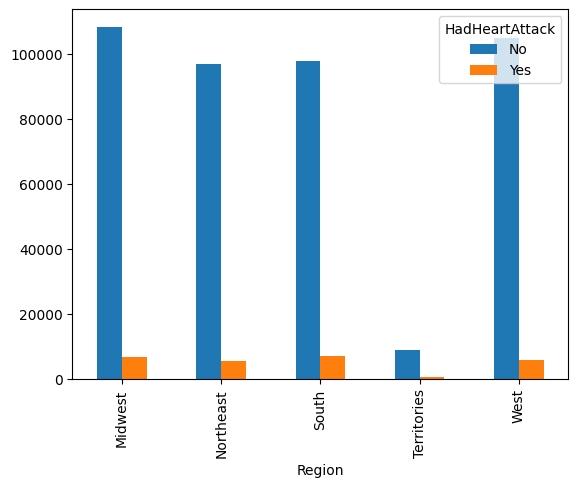

In [56]:
# Ploting the new column Region with the Target Variable
pd.crosstab(df['Region'],df['HadHeartAttack']).plot(kind='bar')
plt.show()

In [57]:
# Dropping the State column because we have a new column region.
df.drop('State',axis=1,inplace=True)

In [58]:
# Feature Engineering AgeCategory column so that we can reduce the number of sub-categories.
df['Age'] = df['AgeCategory'].replace(['Age 18 to 24','Age 25 to 29'],'18 - 29')
df['Age'] = df['Age'].replace(['Age 30 to 34','Age 35 to 39'],'30 - 39')
df['Age'] = df['Age'].replace(['Age 40 to 44','Age 45 to 49'],'40 - 49')
df['Age'] = df['Age'].replace(['Age 50 to 54','Age 55 to 59'],'50 - 59')
df['Age'] = df['Age'].replace(['Age 60 to 64','Age 65 to 69'],'60 - 69')
df['Age'] = df['Age'].replace(['Age 70 to 74','Age 75 to 79'],'70 - 79')

In [59]:
df['Age'].unique()

array(['Age 80 or older', '50 - 59', '60 - 69', '40 - 49', '70 - 79',
       '30 - 39', '18 - 29'], dtype=object)

In [60]:
# Dropping the AgeCategory column.
df.drop(columns=['AgeCategory'],inplace=True)

# Encoding

In [61]:
# Checking for value counts for each categorical variables
for i in df.select_dtypes('O'):
    print(df[i].value_counts(normalize = True))
    print('---------------------------------')

Sex
Female    0.530542
Male      0.469458
Name: proportion, dtype: float64
---------------------------------
GeneralHealth
Very good    0.335172
Good         0.322685
Excellent    0.161946
Fair         0.134936
Poor         0.045262
Name: proportion, dtype: float64
---------------------------------
LastCheckupTime
<1 Year      0.806822
1-2 Years    0.094333
2-5 Years    0.055986
>=5 Years    0.042859
Name: proportion, dtype: float64
---------------------------------
PhysicalActivities
Yes    0.761234
No     0.238766
Name: proportion, dtype: float64
---------------------------------
RemovedTeeth
None of them              0.550718
1 to 5                    0.290504
6 or more, but not all    0.102054
All                       0.056724
Name: proportion, dtype: float64
---------------------------------
HadHeartAttack
No     0.943184
Yes    0.056816
Name: proportion, dtype: float64
---------------------------------
HadAngina
No     0.937888
Yes    0.062112
Name: proportion, dtype: float64
--

In [62]:
# Creatiing a copy of the Dataset for preprocessing
df_new = df.copy()

In [63]:
# Label Encoding all the variables that has exactly two categories
le=LabelEncoder()
for i in df_new.select_dtypes('O'):
    if len(df_new[i].value_counts())==2:
        df_new[i]=le.fit_transform(df_new[[i]])

<IPython.core.display.Javascript object>

In [64]:
# Ordinal Encoding General Health. Because there is a Heirarchy
oe=OrdinalEncoder(categories=[['Poor','Fair','Good','Very good','Excellent']])
df_new['GeneralHealth']=oe.fit_transform(df_new[['GeneralHealth']])

# Ordinal Encoding LastCheckupTime. Because there is a Heirarchy
oe=OrdinalEncoder(categories=[['<1 Year','1-2 Years','2-5 Years','>=5 Years']])
df_new['LastCheckupTime']=oe.fit_transform(df_new[['LastCheckupTime']])

In [65]:
# Dummy encoding the Age column and dropping the first column.
dummy_age = pd.get_dummies(df_new['Age'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_age],axis=1)
df_new.drop(columns=['Age'],inplace=True)

# Dummy encoding the Region column and dropping the first column.
dummy_region = pd.get_dummies(df_new['Region'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_region],axis=1)
df_new.drop(columns=['Region'],inplace=True)

# Dummy encoding the RemovedTeeth column and dropping the first column.
dummy_teeth = pd.get_dummies(df_new['RemovedTeeth'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_teeth],axis=1)
df_new.drop(columns=['RemovedTeeth'],inplace=True)

# Dummy encoding the SmokerStatus column and dropping the first column.
dummy_smoker = pd.get_dummies(df_new['SmokerStatus'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_smoker],axis=1)
df_new.drop(columns=['SmokerStatus'],inplace=True)

# Dummy encoding the ECigaretteUsage column and dropping the first column.
dummy_cig = pd.get_dummies(df_new['ECigaretteUsage'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_cig],axis=1)
df_new.drop(columns=['ECigaretteUsage'],inplace=True)

# Dummy encoding the TetanusLast10Tdap column and dropping the first column.
dummy_tetanus = pd.get_dummies(df_new['TetanusLast10Tdap'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_tetanus],axis=1)
df_new.drop(columns=['TetanusLast10Tdap'],inplace=True)

# Dummy encoding the Race column and dropping the first column.
dummy_race = pd.get_dummies(df_new['Race'],drop_first=True).astype(int)
df_new = pd.concat([df_new,dummy_race],axis=1)
df_new.drop(columns=['Race'],inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441914 entries, 0 to 441913
Data columns (total 61 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Sex                                                 441914 non-null  int64  
 1   GeneralHealth                                       441914 non-null  float64
 2   PhysicalHealthDays                                  441914 non-null  float64
 3   MentalHealthDays                                    441914 non-null  float64
 4   LastCheckupTime                                     441914 non-null  float64
 5   PhysicalActivities                                  441914 non-null  int64  
 6   SleepHours                                          441914 non-null  float64
 7   HadHeartAttack                                      441914 non-null  int64  
 8   HadAngina                                           441914 non-n

# Separating Features and Target Varible

In [67]:
# Separating Features and Target Variable from the dataset
X=df_new.drop('HadHeartAttack',axis=1)
y=df_new['HadHeartAttack']

# Checking for Multi-collinearity

In [68]:
# Checking for Multi-collinearity
vif = pd.DataFrame()
num_cols = ['BMI','WeightInKilograms','HeightInMeters','PhysicalHealthDays','MentalHealthDays','SleepHours']
vif['Features'] = num_cols
vif['vif'] = [variance_inflation_factor(X[num_cols].values,i) for i in range(len(X[num_cols].columns))]
vif.set_index('Features',inplace=True)
vif.sort_values(by='vif',ascending=False)

<IPython.core.display.Javascript object>

vif
Features                     
WeightInKilograms   77.822766
BMI                 71.964811
HeightInMeters      46.881786
SleepHours          23.520474
MentalHealthDays     1.450287
PhysicalHealthDays   1.415252

In [69]:
# We can remove the WeightInKilograms and HeightInMeters because both has correlated to each other and both are used to BMI calculation.
X.drop(columns = ['WeightInKilograms','HeightInMeters'],inplace=True)

# Train-test Split

In [70]:
# Spliting the X and Y to train and test with (70:30 ratio)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

<IPython.core.display.Javascript object>

## Scaling

In [71]:
# Only taking the names of the numerical columns in the dataset.
common_columns = ['PhysicalHealthDays','MentalHealthDays','SleepHours','BMI']

# Scaling the Train and Test data so that the mean will be 0 and standard deviation 1.
ss = StandardScaler()

# For train data we are fit and transforming the values.
Xtrain[common_columns] = ss.fit_transform(Xtrain[common_columns])
# For test data, we are only transforming the values according to the train data's parameters in order to avoid Data leakage.
Xtest[common_columns] = ss.transform(Xtest[common_columns])

<IPython.core.display.Javascript object>

In [72]:
# Checking the numerical values of Xtrain
Xtrain[common_columns]

PhysicalHealthDays  MentalHealthDays  SleepHours       BMI
248854           -0.504442         -0.526433   -0.015715 -0.580471
134346            0.657886          3.081621   -0.684503  0.747449
193847           -0.504442         -0.406164   -0.015715  0.597824
30285            -0.388210         -0.285896   -0.015715  0.518336
125576           -0.504442         -0.526433   -0.684503  0.773945
...                    ...               ...         ...       ...
73349            -0.504442          3.081621   -1.353290 -1.043373
371403           -0.504442         -0.285896   -0.015715 -0.276546
312201           -0.388210          3.081621   -1.353290 -1.398731
267336           -0.504442         -0.526433   -0.015715 -0.616319
128037           -0.504442         -0.526433   -0.015715 -0.415260

[309339 rows x 4 columns]

# Data Imbalance

In [73]:
y.value_counts(normalize=True)

HadHeartAttack
0    0.943184
1    0.056816
Name: proportion, dtype: float64

* There is an imbalance in the data. Therefore we should treat it.

In [74]:
# For treating Imbalance in the data, we have done Undersampling Method for the training data
ru=RandomUnderSampler(random_state=1)
Xtrain_u,ytrain_u=ru.fit_resample(Xtrain,ytrain)

In [75]:
ytrain_u.value_counts(normalize=True)

HadHeartAttack
0    0.5
1    0.5
Name: proportion, dtype: float64

# Model Building

## Logistic Regression

In [88]:
# Under-Sampling model
lr=LogisticRegression(random_state=0)
model_lr1=lr.fit(Xtrain_u,ytrain_u)
ypred_test_lr1=model_lr1.predict(Xtest)
ypred_train_l1=model_lr1.predict(Xtrain_u)
print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_l1),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_lr1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82     17520
           1       0.84      0.79      0.81     17520

    accuracy                           0.82     35040
   macro avg       0.82      0.82      0.82     35040
weighted avg       0.82      0.82      0.82     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91    124987
           1       0.24      0.79      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.82      0.64    132575
weighted avg       0.94      0.84      0.88    132575



In [133]:
# Building model by treating imbalance of data using class weights.
lr=LogisticRegression(class_weight='balanced',random_state=0)
model_lr1=lr.fit(Xtrain,ytrain)
ypred_test_lr1=model_lr1.predict(Xtest)
ypred_train_l1=model_lr1.predict(Xtrain)
print('Train Report:\n',metrics.classification_report(ytrain,ypred_train_l1),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_lr1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    291819
           1       0.23      0.79      0.36     17520

    accuracy                           0.84    309339
   macro avg       0.61      0.82      0.63    309339
weighted avg       0.94      0.84      0.88    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    124987
           1       0.24      0.79      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.82      0.64    132575
weighted avg       0.94      0.84      0.88    132575



In [ ]:
# Performing Feature Selection using Sequential Feature Selection (sfs).
lr = LogisticRegression()
sfs = SequentialFeatureSelector(estimator=lr,k_features='best',forward=True)
sfs.fit(Xtrain_u,ytrain_u)
sfs.k_feature_names_

<IPython.core.display.Javascript object>

('Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'HighRiskLastYear',
 'Ethinicity',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 'Age 80 or older',
 'Northeast',
 'South',
 'Territories',
 'West',
 'All',
 'None of them',
 'Current smoker - now smokes some days',
 'Never smoked',
 'Use them every day',
 'Use them some days',
 'Yes, received Tdap',
 'Yes, received tetanus shot, but not Tdap',
 'Multiracial',
 'Not-Available',
 'Other',
 'White')

### Building a model with only significant features.

In [134]:
# Building a model with important features only.
X=df_new[['Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'PneumoVaxEver',
 'HighRiskLastYear',
 'CovidPos',
 'Ethinicity',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 'Age 80 or older',
 'Northeast',
 'South',
 'Territories',
 'West',
 '6 or more, but not all',
 'All',
 'None of them',
 'Former smoker',
 'Not at all (right now)',
 'Use them every day',
 'Use them some days',
 'Yes, received Tdap',
 'Yes, received tetanus shot but not sure what type',
 'Yes, received tetanus shot, but not Tdap',
 'Yes, received tetanus shot, but not sure what type',
 'Multiracial',
 'Not-Available',
 'Other',
 'White']]
ru=RandomUnderSampler(random_state=1)
y=df_new['HadHeartAttack']
Xtrain_u1,Xtest_u1,ytrain_u1,ytest_u1=train_test_split(X,y,test_size=0.3,random_state=1)
# Xtrain_u1,ytrain_u1=ru.fit_resample(Xtrain_u1,ytrain_u1)

<IPython.core.display.Javascript object>

In [135]:
# Model Building on class weight method.
lr=LogisticRegression(class_weight='balanced',random_state=1)
model_lr3=lr.fit(Xtrain_u1,ytrain_u1)

ypred_testlr=model_lr3.predict(Xtest_u1)
ypred_trainlr=model_lr3.predict(Xtrain_u1)

ypred_test_proba = model_lr3.predict_proba(Xtest_u1)
ypred_train_proba = model_lr3.predict_proba(Xtrain_u1)

print('Train Report:\n',metrics.classification_report(ytrain_u1,ypred_trainlr),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest_u1,ypred_testlr))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    291819
           1       0.23      0.79      0.36     17520

    accuracy                           0.84    309339
   macro avg       0.61      0.82      0.63    309339
weighted avg       0.94      0.84      0.88    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    124987
           1       0.24      0.78      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.81      0.64    132575
weighted avg       0.94      0.84      0.88    132575



* There is no difference in the accuracy in the model build with only significant features.

In [136]:
# User Defined Function for confusion Matrix.
def confusion(cm_train,cm_test,model_name):
    plt.figure(figsize=[10,5])
    labels_train = np.array(
        [
            [f"{i}\n{(i / cm_train.sum()):.2%}" for i in row]
            for row in cm_train
        ]
    )

    # Generate formatted annotations for testing confusion matrix
    labels_test = np.array(
        [
            [f"{i}\n{(i / cm_test.sum()):.2%}" for i in row]
            for row in cm_test
        ]
    )
    plt.suptitle(f'Confusion Matrix ({model_name})',fontsize=15)
    plt.subplot(1,2,1)
    sns.heatmap(cm_train, annot=labels_train, fmt='', cbar=False, cmap='CMRmap')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Train')
    plt.subplot(1,2,2)
    sns.heatmap(cm_test, annot=labels_test, fmt='', cbar=False, cmap='CMRmap')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test')

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

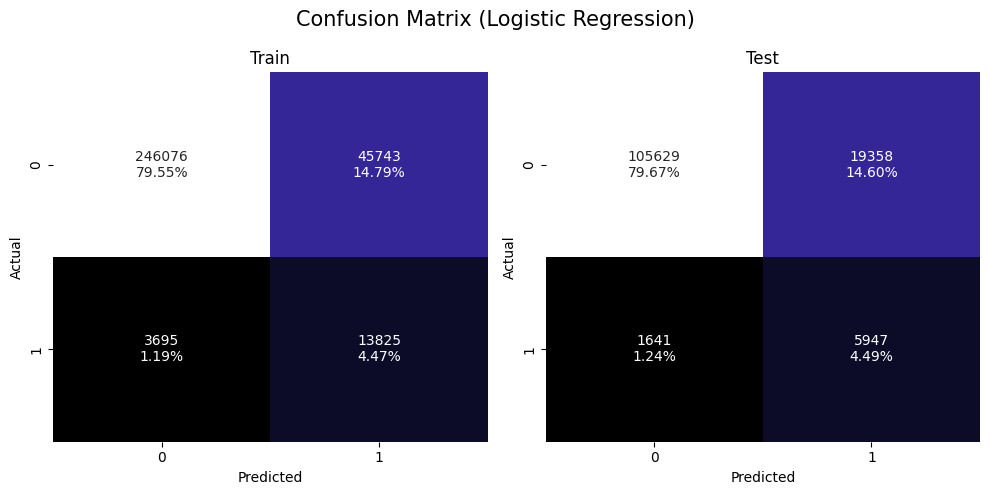

In [137]:
# Ploting confusion matrix.
cm_testlr = metrics.confusion_matrix(ytest_u1,ypred_testlr)
cm_trainlr = metrics.confusion_matrix(ytrain_u1,ypred_trainlr)

confusion(cm_trainlr,cm_testlr,'Logistic Regression')

In [138]:
# User Defined Function for ROC Curve.
def roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,model_name):
    plt.figure(figsize=[10,5])
    plt.suptitle(f'Roc-Curve ({model_name})',fontsize=15)
    plt.subplot(1,2,1)
    plt.title('Train')
    plt.plot(fpr_train,tpr_train)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1],[0,1],'r--',label=f'Roc_auc: {round(roc_auc_train, 3)}')
    plt.legend(loc='lower right', fontsize=12, facecolor='white', edgecolor='black', frameon=True)
    plt.subplot(1,2,2)
    plt.title('Test')
    plt.plot(fpr_test,tpr_test)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1],[0,1],'r--',label=f'Roc_auc: {round(roc_auc_test, 3)}')
    plt.legend(loc='lower right', fontsize=12, facecolor='white', edgecolor='black', frameon=True)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

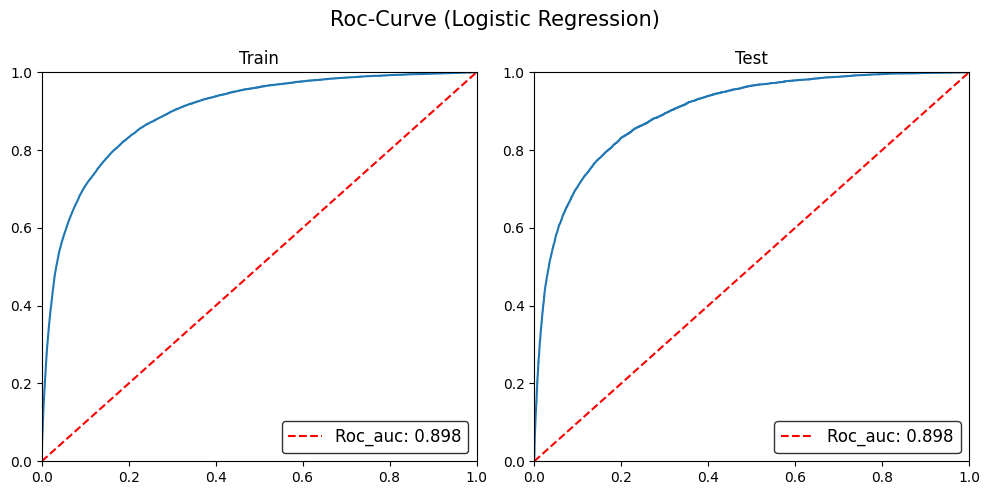

In [139]:
# Plotting ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest_u1,ypred_test_proba[:,1])
roc_auc_test = metrics.roc_auc_score(ytest_u1,ypred_test_proba[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain_u1,ypred_train_proba[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain_u1,ypred_train_proba[:,1])

roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'Logistic Regression')

In [140]:
# Adding the performace metrics of the model in a dataframe.
models=pd.DataFrame()
logit=pd.Series({'model_name':'Logistic Regression',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_lr1),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_lr1),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_lr1),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_lr1),2)})
models=pd.concat([models,logit]).T
models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_name Accuracy Recall Precision F1-score
0  Logistic Regression     0.84   0.79      0.24     0.36

# KNN Classifier

In [98]:
# Building a KNN Classifier model with under-sampling method.
knn=KNeighborsClassifier()
model_knn1=knn.fit(Xtrain_u,ytrain_u)
ypred_knn_test=model_knn1.predict(Xtest)
ypred_knn_train=model_knn1.predict(Xtrain_u)
print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_knn_train),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_knn_test))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     17520
           1       0.86      0.82      0.84     17520

    accuracy                           0.84     35040
   macro avg       0.84      0.84      0.84     35040
weighted avg       0.84      0.84      0.84     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89    124987
           1       0.19      0.73      0.30      7588

    accuracy                           0.80    132575
   macro avg       0.58      0.77      0.59    132575
weighted avg       0.93      0.80      0.85    132575



### Tuning the Hyper Parameters

In [ ]:
# Tuning the Hyper-parameters for the model.
para={'n_neighbors':np.arange(1,10),
     'metric':['minkowski','euclidean','manhattan']}
knn=KNeighborsClassifier()
grid=GridSearchCV(estimator=knn,param_grid=para,cv=5,scoring='accuracy')
model_grid_knn=grid.fit(Xtrain_u,ytrain_u)
grid.best_params_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'metric': 'manhattan', 'n_neighbors': 9}

In [141]:
# Building a model with tuned parameters
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=9)
model_knn1=knn.fit(Xtrain_u,ytrain_u)

ypred_knn_test=model_knn1.predict(Xtest)
ypred_knn_train=model_knn1.predict(Xtrain_u)

ypred_test_proba_knn = model_knn1.predict_proba(Xtest)
ypred_train_proba_knn = model_knn1.predict_proba(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_knn_train),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_knn_test))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     17520
           1       0.84      0.79      0.82     17520

    accuracy                           0.82     35040
   macro avg       0.82      0.82      0.82     35040
weighted avg       0.82      0.82      0.82     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    124987
           1       0.20      0.75      0.32      7588

    accuracy                           0.82    132575
   macro avg       0.59      0.78      0.61    132575
weighted avg       0.94      0.82      0.86    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

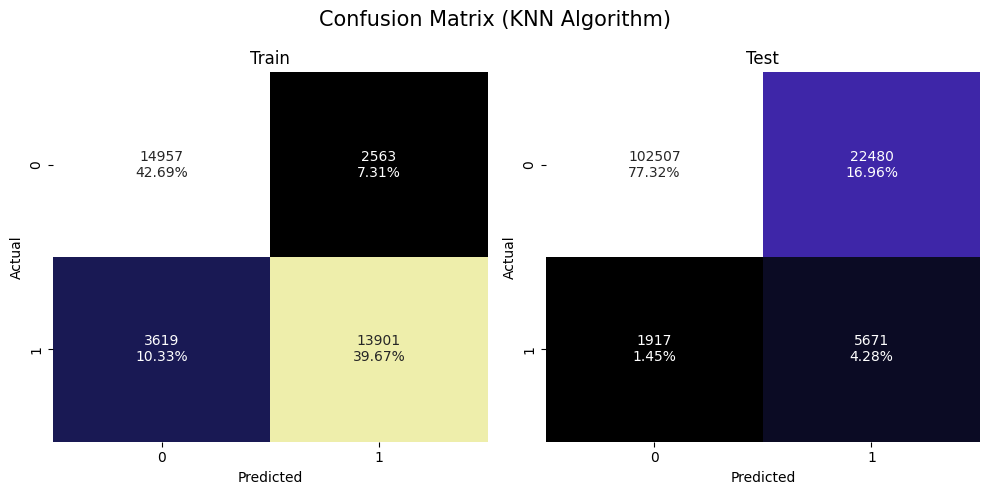

In [142]:
# Plotting the confusion matrix.
cm_testknn = metrics.confusion_matrix(ytest,ypred_knn_test)
cm_trainknn = metrics.confusion_matrix(ytrain_u,ypred_knn_train)

confusion(cm_trainknn,cm_testknn,'KNN Algorithm')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

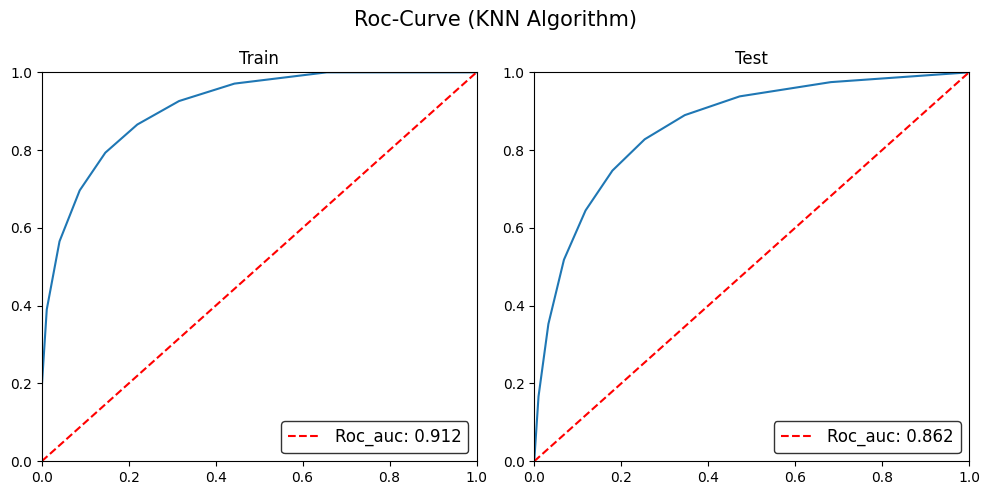

In [143]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_knn[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_knn[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain_u,ypred_train_proba_knn[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain_u,ypred_train_proba_knn[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'KNN Algorithm')

In [144]:
# Adding the performace metrics of the model in a dataframe.
logit2=pd.Series({'model_name':'KNN Classifier',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_knn_test),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_knn_test),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_knn_test),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_knn_test),2)})

entry=pd.DataFrame(logit2).T
models=pd.concat([models,entry])
models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_name Accuracy Recall Precision F1-score
0  Logistic Regression     0.84   0.79      0.24     0.36
0       KNN Classifier     0.82   0.75       0.2     0.32

# Naive Bayes Classifier

In [145]:
# Calculating the class weights of each sub-category in the target column.
weight_1 = (len(ytrain))/(sum(ytrain==1))
weight_0 = (len(ytrain))/(sum(ytrain==0))
weight_0,weight_1

(1.0600372148489303, 17.656335616438355)

In [146]:
# Building a Naive Bayes Classifier model using class weights.
gb=GaussianNB()
sample_weights = [weight_1 if label == 1 else weight_0 for label in ytrain]
model_gb=gb.fit(Xtrain,ytrain,sample_weight=sample_weights)

ypred_test_gb=model_gb.predict(Xtest)
ypred_train_gb=model_gb.predict(Xtrain)

ypred_test_proba_gb = model_gb.predict_proba(Xtest)
ypred_train_proba_gb = model_gb.predict_proba(Xtrain)

print('Train Report:\n',metrics.classification_report(ytrain,ypred_train_gb),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_gb))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87    291819
           1       0.18      0.79      0.30     17520

    accuracy                           0.79    309339
   macro avg       0.58      0.79      0.59    309339
weighted avg       0.94      0.79      0.84    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88    124987
           1       0.19      0.79      0.30      7588

    accuracy                           0.79    132575
   macro avg       0.58      0.79      0.59    132575
weighted avg       0.94      0.79      0.84    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

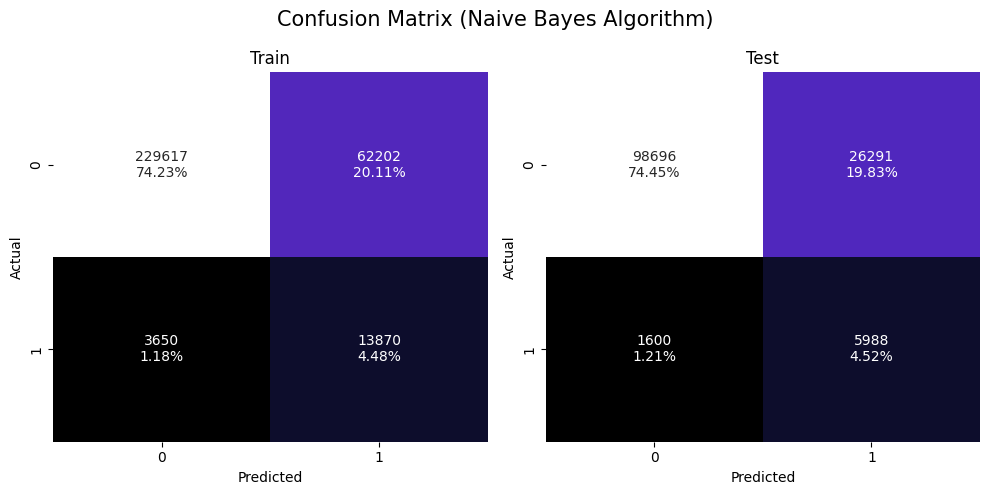

In [147]:
# Plotting the confusion matrix.
cm_testgb = metrics.confusion_matrix(ytest,ypred_test_gb)
cm_traingb = metrics.confusion_matrix(ytrain,ypred_train_gb)

confusion(cm_traingb,cm_testgb,'Naive Bayes Algorithm')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

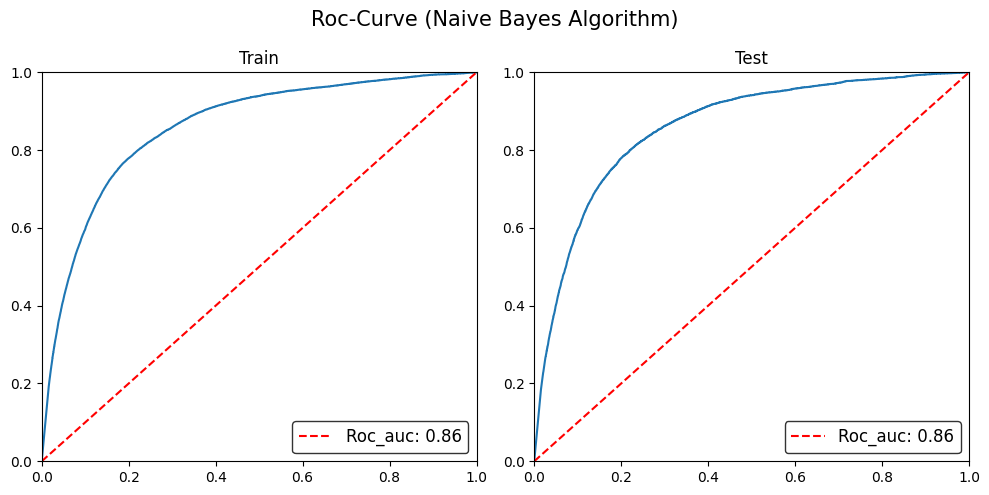

In [148]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_gb[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_gb[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain,ypred_train_proba_gb[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain,ypred_train_proba_gb[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'Naive Bayes Algorithm')

In [149]:
# Adding the performace metrics of the model in a dataframe.
logit3=pd.Series({'model_name':'Naive Bayes Classifier',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_gb),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_gb),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_gb),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_gb),2)})

entry1=pd.DataFrame(logit3).T
models=pd.concat([models,entry1])
models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_name Accuracy Recall Precision F1-score
0     Logistic Regression     0.84   0.79      0.24     0.36
0          KNN Classifier     0.82   0.75       0.2     0.32
0  Naive Bayes Classifier     0.79   0.79      0.19      0.3

# Decision Tree Classifier

In [150]:
# Building a Decision Tree Classifier model using class weights.
dt=DecisionTreeClassifier(class_weight='balanced',random_state=0)
model_dt1=dt.fit(Xtrain,ytrain)
ypred_test_dt=model_dt1.predict(Xtest)
ypred_train_dt=model_dt1.predict(Xtrain)

print('Train Report:\n',metrics.classification_report(ytrain,ypred_train_dt),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_dt))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    291819
           1       1.00      1.00      1.00     17520

    accuracy                           1.00    309339
   macro avg       1.00      1.00      1.00    309339
weighted avg       1.00      1.00      1.00    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    124987
           1       0.32      0.31      0.31      7588

    accuracy                           0.92    132575
   macro avg       0.64      0.64      0.64    132575
weighted avg       0.92      0.92      0.92    132575



## Hyperparameters tuning

In [ ]:
# Tuning the Hyper-parameters for the model.
para={'criterion':['entropy','gini'],'max_depth':np.arange(1,10),'min_samples_split':np.arange(10,100,10),
      'min_samples_leaf':np.arange(10,100,10)}
dt=DecisionTreeClassifier(random_state=0)
grid=GridSearchCV(estimator=dt,param_grid=para,cv=5,scoring='accuracy')
grid.fit(Xtrain_u,ytrain_u)
grid.best_params_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 70,
 'min_samples_split': 10}

In [151]:
# Building a model with tuned parameters
dt=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=9,min_samples_leaf=80,min_samples_split=10,random_state=0)
model_dt2=dt.fit(Xtrain,ytrain)

ypred_test_dt=model_dt2.predict(Xtest)
ypred_train_dt=model_dt2.predict(Xtrain)

ypred_test_proba_dt = model_dt2.predict_proba(Xtest)
ypred_train_proba_dt = model_dt2.predict_proba(Xtrain)


print('Train Report:\n',metrics.classification_report(ytrain,ypred_train_dt),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_dt))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90    291819
           1       0.22      0.81      0.34     17520

    accuracy                           0.82    309339
   macro avg       0.60      0.82      0.62    309339
weighted avg       0.94      0.82      0.87    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90    124987
           1       0.22      0.80      0.34      7588

    accuracy                           0.82    132575
   macro avg       0.60      0.81      0.62    132575
weighted avg       0.94      0.82      0.87    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

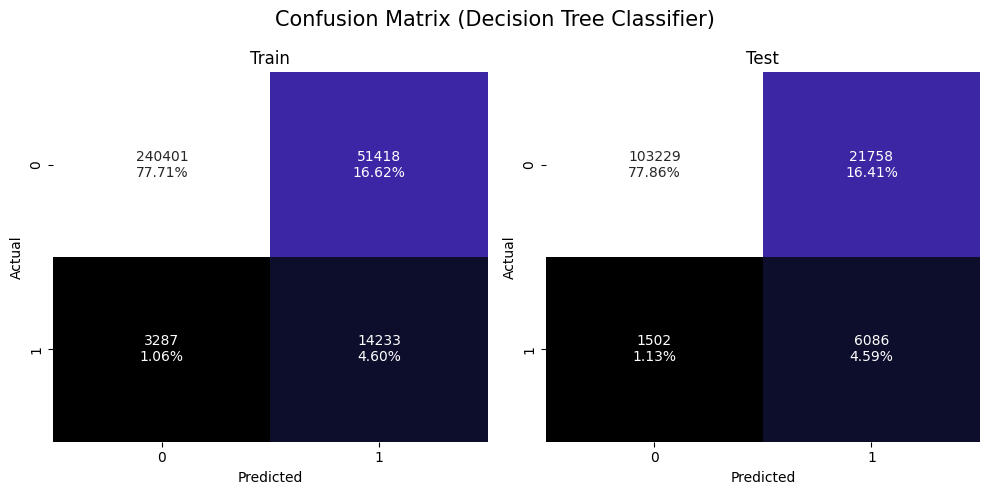

In [152]:
# Plotting the confusion matrix.
cm_testdt = metrics.confusion_matrix(ytest,ypred_test_dt)
cm_traindt = metrics.confusion_matrix(ytrain,ypred_train_dt)

confusion(cm_traindt,cm_testdt,'Decision Tree Classifier')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

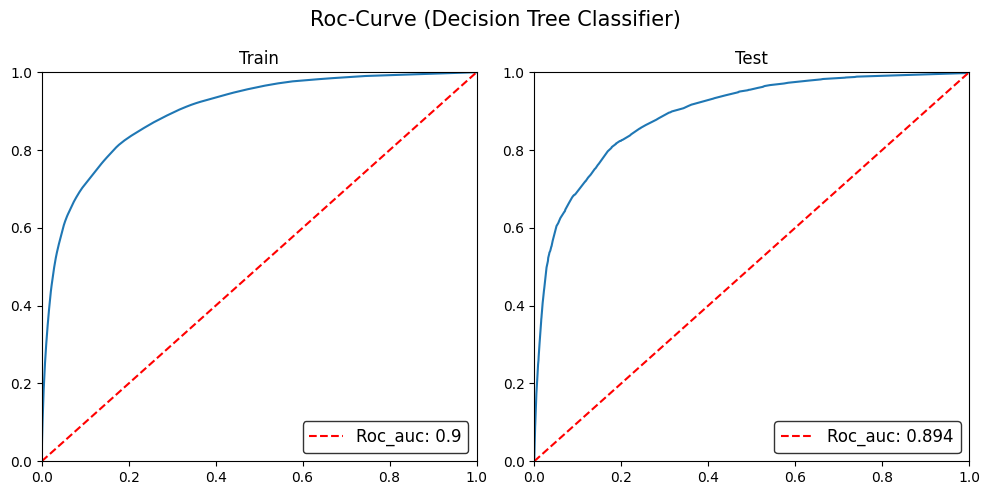

In [153]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_dt[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_dt[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain,ypred_train_proba_dt[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain,ypred_train_proba_dt[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_dt[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'Decision Tree Classifier')

In [154]:
# Adding the performace metrics of the model in a dataframe.
logit4=pd.Series({'model_name':'Decision Tree Classifier',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_dt),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_dt),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_dt),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_dt),2)})

entry2=pd.DataFrame(logit4).T
models=pd.concat([models,entry2])
models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_name Accuracy Recall Precision F1-score
0       Logistic Regression     0.84   0.79      0.24     0.36
0            KNN Classifier     0.82   0.75       0.2     0.32
0    Naive Bayes Classifier     0.79   0.79      0.19      0.3
0  Decision Tree Classifier     0.82    0.8      0.22     0.34

# Random Forest Classifier

In [155]:
# Building a Random Forest Classifier model using class weights.
rf=RandomForestClassifier(class_weight='balanced',random_state=0)
model_rf1=rf.fit(Xtrain,ytrain)
ypred_test_rf=model_rf1.predict(Xtest)
ypred_train_rf=model_rf1.predict(Xtrain)

print('Train Report:\n',metrics.classification_report(ytrain,ypred_train_rf),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_rf))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    291819
           1       1.00      1.00      1.00     17520

    accuracy                           1.00    309339
   macro avg       1.00      1.00      1.00    309339
weighted avg       1.00      1.00      1.00    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    124987
           1       0.67      0.19      0.30      7588

    accuracy                           0.95    132575
   macro avg       0.81      0.59      0.64    132575
weighted avg       0.94      0.95      0.93    132575



## Hyperparameters tuning

In [ ]:
# Tuning the Hyper-parameters for the model.
para={'criterion':['entropy','gini'],'max_depth':np.arange(1,10),'min_samples_split':np.arange(10,100,10),
      'min_samples_leaf':np.arange(10,100,10),'oob_score':[True,False]}
rf1=RandomForestClassifier(random_state=0)

grid=GridSearchCV(estimator=rf1,param_grid=para,cv=5,scoring='accuracy')
grid.fit(Xtrain_u,ytrain_u)
grid.best_params_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
# Building a model with tuned parameters
rf=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_depth=9,min_samples_leaf=20,min_samples_split=60,
                          oob_score=True,random_state=0)
model_rf1=rf.fit(Xtrain,ytrain)

ypred_test_rf=model_rf1.predict(Xtest)
ypred_train_rf=model_rf1.predict(Xtrain)

ypred_test_proba_rf = model_rf1.predict_proba(Xtest)
ypred_train_proba_rf = model_rf1.predict_proba(Xtrain)

print('Train Report:\n',metrics.classification_report(ytrain,ypred_train_rf),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_rf))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90    291819
           1       0.22      0.81      0.35     17520

    accuracy                           0.83    309339
   macro avg       0.61      0.82      0.63    309339
weighted avg       0.94      0.83      0.87    309339
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90    124987
           1       0.22      0.80      0.35      7588

    accuracy                           0.83    132575
   macro avg       0.61      0.82      0.63    132575
weighted avg       0.94      0.83      0.87    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

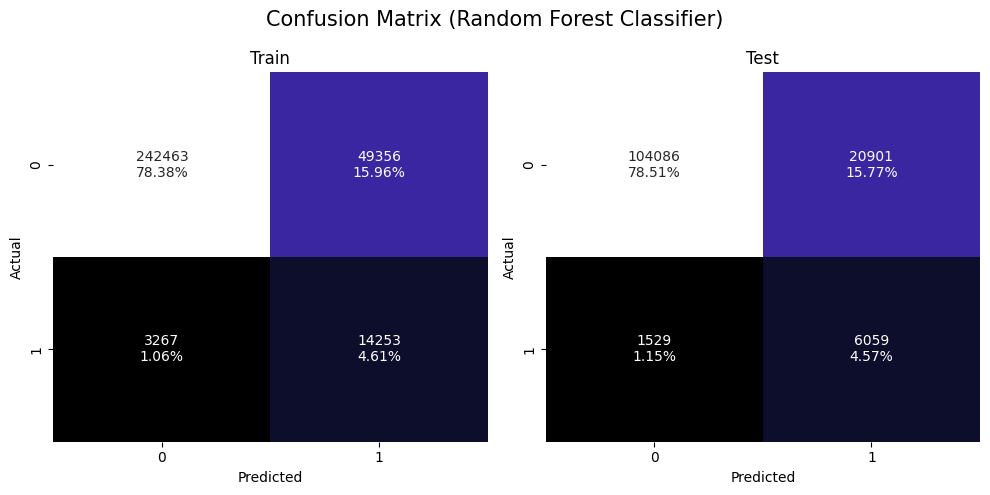

In [157]:
# Plotting the confusion matrix.
cm_testrf = metrics.confusion_matrix(ytest,ypred_test_rf)
cm_trainrf = metrics.confusion_matrix(ytrain,ypred_train_rf)

confusion(cm_trainrf,cm_testrf,'Random Forest Classifier')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

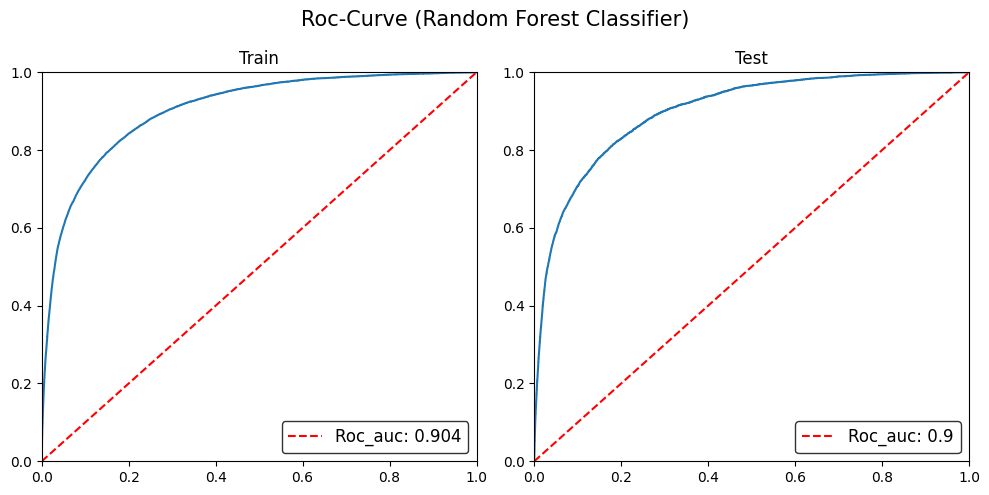

In [158]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_rf[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_rf[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain,ypred_train_proba_rf[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain,ypred_train_proba_rf[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_rf[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'Random Forest Classifier')

In [159]:
# Adding the performace metrics of the model in a dataframe.
logit5=pd.Series({'model_name':'Random Forest Classifier',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_rf),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_rf),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_rf),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_rf),2)})

entry2=pd.DataFrame(logit5).T
models=pd.concat([models,entry2])
models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_name Accuracy Recall Precision F1-score
0       Logistic Regression     0.84   0.79      0.24     0.36
0            KNN Classifier     0.82   0.75       0.2     0.32
0    Naive Bayes Classifier     0.79   0.79      0.19      0.3
0  Decision Tree Classifier     0.82    0.8      0.22     0.34
0  Random Forest Classifier     0.83    0.8      0.22     0.35

# Ada Boost

In [160]:
ratio = sum(ytrain == 0) / sum(ytrain == 1)

In [161]:
# Building a Ada Boost Classifier model using under sampling.
adb = AdaBoostClassifier(random_state=0)
model_adb = adb.fit(Xtrain_u,ytrain_u)
ypred_test_adb=model_adb.predict(Xtest)
ypred_train_adb=model_adb.predict(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_adb),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_adb))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82     17520
           1       0.84      0.78      0.81     17520

    accuracy                           0.81     35040
   macro avg       0.81      0.81      0.81     35040
weighted avg       0.81      0.81      0.81     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    124987
           1       0.24      0.78      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.81      0.64    132575
weighted avg       0.94      0.84      0.88    132575



## Hyper Parameter Tuning

In [ ]:
# Tuning the Hyper-parameters for the model.
para={'n_estimators':np.arange(10,100,10),'learning_rate':np.arange(0,1,0.1)}
adb1 = AdaBoostClassifier(random_state=0)

grid=GridSearchCV(estimator=adb1,param_grid=para,cv=5,scoring='accuracy')
grid.fit(Xtrain_u,ytrain_u)
grid.best_params_

In [162]:
# Building a model with tuned parameters
adb = AdaBoostClassifier(learning_rate=0.8,n_estimators=80,random_state=0)
model_adb1 = adb.fit(Xtrain_u,ytrain_u)

ypred_test_adb1=model_adb1.predict(Xtest)
ypred_train_adb1=model_adb1.predict(Xtrain_u)

ypred_test_proba_adb = model_adb1.predict_proba(Xtest)
ypred_train_proba_adb = model_adb1.predict_proba(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_adb1),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_adb1))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82     17520
           1       0.83      0.78      0.81     17520

    accuracy                           0.81     35040
   macro avg       0.81      0.81      0.81     35040
weighted avg       0.81      0.81      0.81     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    124987
           1       0.24      0.78      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.81      0.64    132575
weighted avg       0.94      0.84      0.88    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

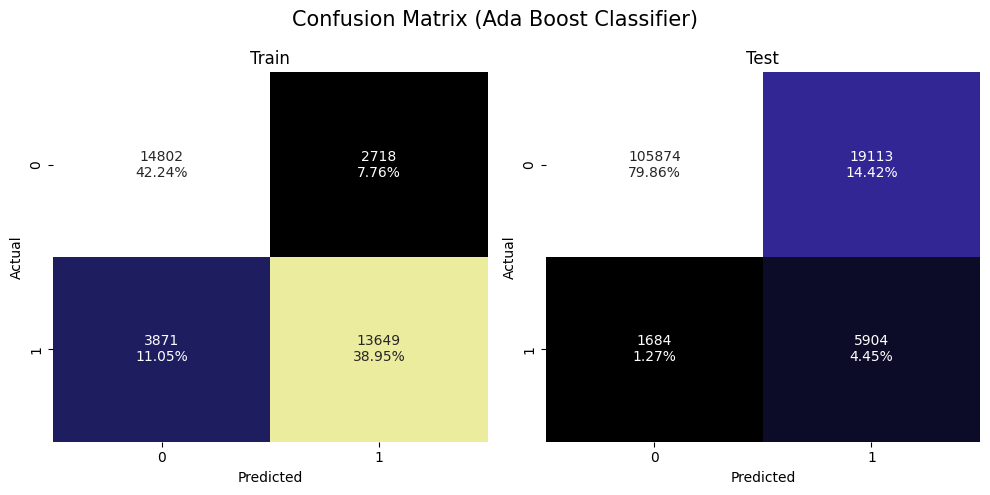

In [163]:
# Plotting the confusion matrix.
cm_testadb = metrics.confusion_matrix(ytest,ypred_test_adb1)
cm_trainadb = metrics.confusion_matrix(ytrain_u,ypred_train_adb1)

confusion(cm_trainadb,cm_testadb,'Ada Boost Classifier')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

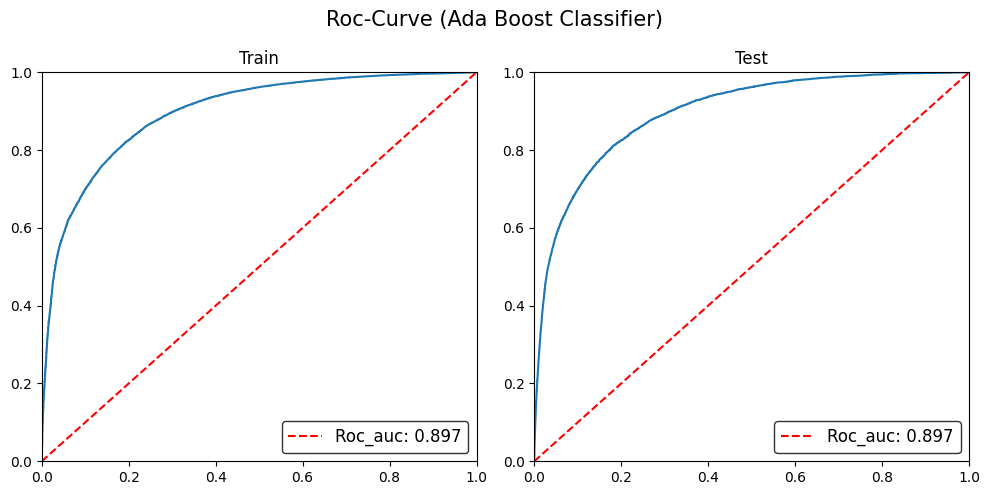

In [164]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_adb[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_adb[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain_u,ypred_train_proba_adb[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain_u,ypred_train_proba_adb[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'Ada Boost Classifier')

In [165]:
# Adding the performace metrics of the model in a dataframe.
logit6=pd.Series({'model_name':'Ada Boost',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_adb1),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_adb1),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_adb1),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_adb1),2)})

entry2=pd.DataFrame(logit6).T
models=pd.concat([models,entry2],ignore_index = True)
models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_name Accuracy Recall Precision F1-score
0       Logistic Regression     0.84   0.79      0.24     0.36
1            KNN Classifier     0.82   0.75       0.2     0.32
2    Naive Bayes Classifier     0.79   0.79      0.19      0.3
3  Decision Tree Classifier     0.82    0.8      0.22     0.34
4  Random Forest Classifier     0.83    0.8      0.22     0.35
5                 Ada Boost     0.84   0.78      0.24     0.36

# Gradient Boost

In [166]:
# Building a Gradient Boost Classifier model using class weights.
gbd = GradientBoostingClassifier(random_state=0)
model_gbd = gbd.fit(Xtrain_u,ytrain_u)
ypred_test_gbd=model_gbd.predict(Xtest)
ypred_train_gbd=model_gbd.predict(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_gbd),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_gbd))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82     17520
           1       0.83      0.80      0.82     17520

    accuracy                           0.82     35040
   macro avg       0.82      0.82      0.82     35040
weighted avg       0.82      0.82      0.82     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    124987
           1       0.23      0.80      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.82      0.63    132575
weighted avg       0.94      0.84      0.88    132575



## Hyper Parameter Tuning

In [ ]:
# Tuning the Hyper-parameters for the model.
para={'n_estimators':np.arange(10,100,10),'learning_rate':np.arange(0,1,0.1),
     'max_depth':np.arange(1,10)}
gdb1 = GradientBoostingClassifier(random_state=0)

grid=GridSearchCV(estimator=gdb1,param_grid=para,cv=5,scoring='accuracy')
grid.fit(Xtrain_u,ytrain_u)
grid.best_params_

In [167]:
# Building a model with tuned parameters
gbd = GradientBoostingClassifier(max_depth=4,learning_rate=0.2,n_estimators=40,random_state=0)
model_gbd1 = gbd.fit(Xtrain_u,ytrain_u)

ypred_test_gbd1=model_gbd1.predict(Xtest)
ypred_train_gbd1=model_gbd1.predict(Xtrain_u)

ypred_test_proba_gbd = model_gbd1.predict_proba(Xtest)
ypred_train_proba_gbd = model_gbd1.predict_proba(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_gbd1),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_gbd1))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83     17520
           1       0.83      0.81      0.82     17520

    accuracy                           0.82     35040
   macro avg       0.82      0.82      0.82     35040
weighted avg       0.82      0.82      0.82     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    124987
           1       0.23      0.80      0.36      7588

    accuracy                           0.84    132575
   macro avg       0.61      0.82      0.63    132575
weighted avg       0.94      0.84      0.87    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

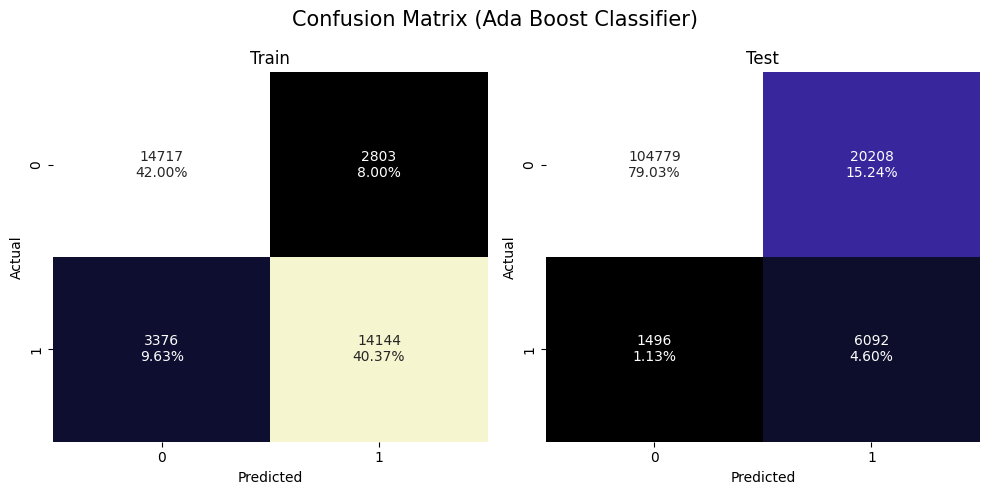

In [168]:
# Plotting the confusion matrix.
cm_testgbd = metrics.confusion_matrix(ytest,ypred_test_gbd1)
cm_traingbd = metrics.confusion_matrix(ytrain_u,ypred_train_gbd1)

confusion(cm_traingbd,cm_testgbd,'Ada Boost Classifier')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

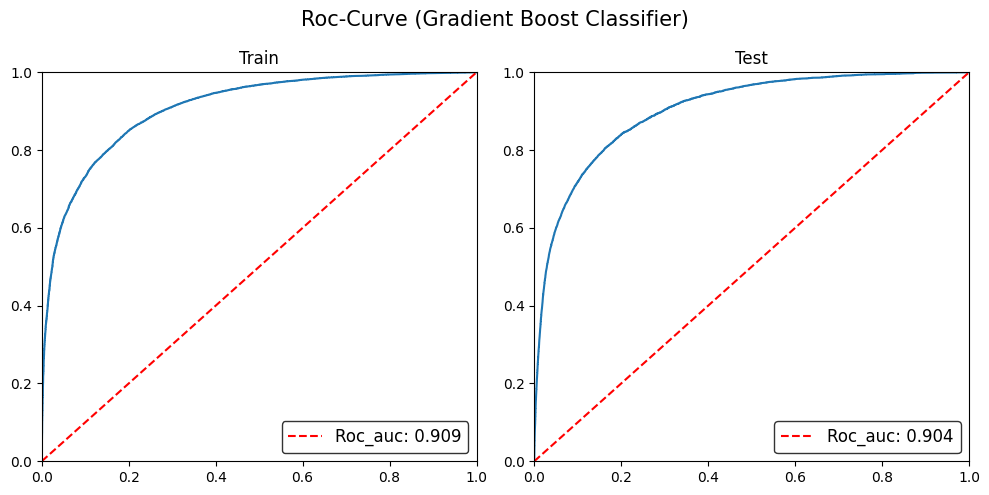

In [169]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_gbd[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_gbd[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain_u,ypred_train_proba_gbd[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain_u,ypred_train_proba_gbd[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'Gradient Boost Classifier')

In [170]:
# Adding the performace metrics of the model in a dataframe.
logit7=pd.Series({'model_name':'Gradient Boost',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_gbd1),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_gbd1),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_gbd1),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_gbd1),2)})

entry2=pd.DataFrame(logit7).T
models=pd.concat([models,entry2],ignore_index = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
print(models)

                 model_name Accuracy Recall Precision F1-score
0       Logistic Regression     0.84   0.79      0.24     0.36
1            KNN Classifier     0.82   0.75       0.2     0.32
2    Naive Bayes Classifier     0.79   0.79      0.19      0.3
3  Decision Tree Classifier     0.82    0.8      0.22     0.34
4  Random Forest Classifier     0.83    0.8      0.22     0.35
5                 Ada Boost     0.84   0.78      0.24     0.36
6            Gradient Boost     0.84    0.8      0.23     0.36


# XGBoost

In [172]:
# Building a XGBoost Classifier model using class weights.
xgb = XGBClassifier(random_state = 0)
model_xgb = xgb.fit(Xtrain_u,ytrain_u)
ypred_test_xgb=model_xgb.predict(Xtest)
ypred_train_xgb=model_xgb.predict(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_xgb),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_xgb))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     17520
           1       0.90      0.87      0.89     17520

    accuracy                           0.89     35040
   macro avg       0.89      0.89      0.89     35040
weighted avg       0.89      0.89      0.89     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90    124987
           1       0.22      0.80      0.34      7588

    accuracy                           0.82    132575
   macro avg       0.60      0.81      0.62    132575
weighted avg       0.94      0.82      0.87    132575



## Hyper Parameter Tuning

In [ ]:
# Tuning the Hyper-parameters for the model.
tuned_parameters=[{'n_estimators':np.arange(10,100,10),
                    'learning_rate':np.arange(0,1,0.1),
                    'gamma':np.arange(0,4)}]
xgb=XGBClassifier()
gridxgb= GridSearchCV(xgb,param_grid=tuned_parameters, scoring='accuracy',cv=5)
gridxgbm=gridxgb.fit(Xtrain_u,ytrain_u)
print('optimal hyper parameters', gridxgbm.best_params_)

In [76]:
# Building a model with tuned parameters
xgb = XGBClassifier(gamma=2,learning_rate=0.1,n_estimators=60,random_state = 0)
model_xgb1 = xgb.fit(Xtrain_u,ytrain_u)

ypred_test_xgb1=model_xgb1.predict(Xtest)
ypred_train_xgb1=model_xgb1.predict(Xtrain_u)

ypred_test_proba_xgb = model_xgb1.predict_proba(Xtest)
ypred_train_proba_xgb = model_xgb1.predict_proba(Xtrain_u)

print('Train Report:\n',metrics.classification_report(ytrain_u,ypred_train_xgb1),'\n\n')
print('Test Report:\n',metrics.classification_report(ytest,ypred_test_xgb1))

<IPython.core.display.Javascript object>

Train Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     17520
           1       0.84      0.82      0.83     17520

    accuracy                           0.83     35040
   macro avg       0.83      0.83      0.83     35040
weighted avg       0.83      0.83      0.83     35040
 




<IPython.core.display.Javascript object>

Test Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90    124987
           1       0.23      0.81      0.36      7588

    accuracy                           0.83    132575
   macro avg       0.61      0.82      0.63    132575
weighted avg       0.94      0.83      0.87    132575



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

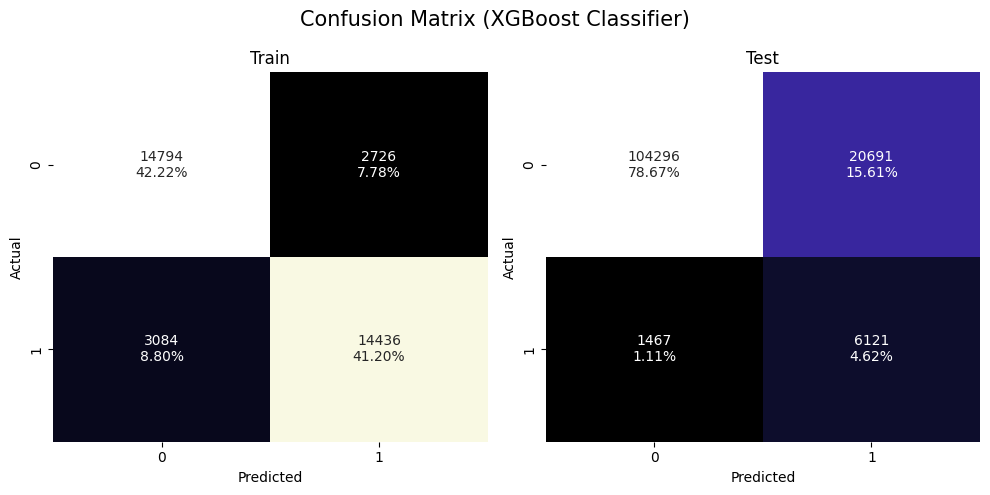

In [174]:
# Plotting the confusion matrix.
cm_testxgb = metrics.confusion_matrix(ytest,ypred_test_xgb1)
cm_trainxgb = metrics.confusion_matrix(ytrain_u,ypred_train_xgb1)

confusion(cm_trainxgb,cm_testxgb,'XGBoost Classifier')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

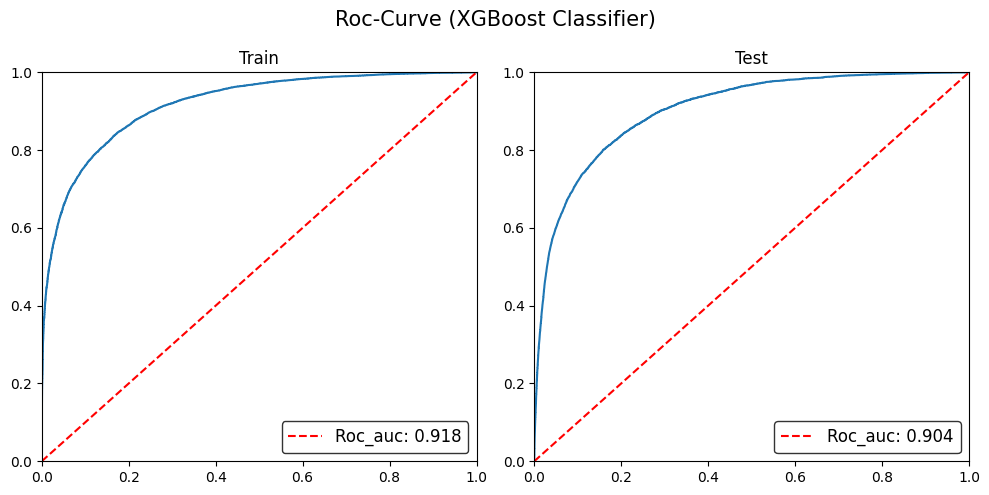

In [175]:
# Plotting the ROC Curve.
fpr_test,tpr_test,thresh_test = metrics.roc_curve(ytest,ypred_test_proba_xgb[:,1])
roc_auc_test = metrics.roc_auc_score(ytest,ypred_test_proba_xgb[:,1])
fpr_train,tpr_train,thresh_train = metrics.roc_curve(ytrain_u,ypred_train_proba_xgb[:,1])
roc_auc_train = metrics.roc_auc_score(ytrain_u,ypred_train_proba_xgb[:,1])


roc_curve(fpr_test,fpr_train,tpr_test,tpr_train,roc_auc_test,roc_auc_train,'XGBoost Classifier')

In [176]:
# Adding the performace metrics of the model in a dataframe.
logit8=pd.Series({'model_name':'XGBoost',
                    'Accuracy':round(metrics.accuracy_score(ytest,ypred_test_xgb1),2),
                    'Recall':round(metrics.recall_score(ytest,ypred_test_xgb1),2),
                    'Precision':round(metrics.precision_score(ytest,ypred_test_xgb1),2),
                    'F1-score':round(metrics.f1_score(ytest,ypred_test_xgb1),2)})

entry2=pd.DataFrame(logit8).T
models=pd.concat([models,entry2],ignore_index = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
models.sort_values(by=['Recall','Accuracy'],ascending=False)

model_name Accuracy Recall Precision F1-score
7                   XGBoost     0.83   0.81      0.23     0.36
6            Gradient Boost     0.84    0.8      0.23     0.36
4  Random Forest Classifier     0.83    0.8      0.22     0.35
3  Decision Tree Classifier     0.82    0.8      0.22     0.34
0       Logistic Regression     0.84   0.79      0.24     0.36
2    Naive Bayes Classifier     0.79   0.79      0.19      0.3
5                 Ada Boost     0.84   0.78      0.24     0.36
1            KNN Classifier     0.82   0.75       0.2     0.32

In [78]:
imp = pd.DataFrame([model_xgb1.feature_names_in_,model_xgb1.feature_importances_]).T.sort_values(by=1,ascending=False)
imp.columns = ['Features','Importance']

imp

<IPython.core.display.Javascript object>

Features Importance
7                                           HadAngina   0.581489
22                                          ChestScan   0.158909
8                                           HadStroke   0.020337
19                                  DifficultyWalking    0.01791
43                                       None of them   0.017066
1                                       GeneralHealth   0.011614
35                                            70 - 79   0.011292
36                                    Age 80 or older   0.010366
46                                       Never smoked   0.010364
15                                        HadDiabetes   0.009697
31                                            30 - 39   0.009515
14                                       HadArthritis   0.007812
34                                            60 - 69   0.007672
45                                      Former smoker   0.007212
24                                    AlcoholDrinkers   0.006151
32                                            40 - 49   0.006144
0                                                 Sex   0.005944
25                                         HIVTesting   0.004889
11                                            HadCOPD   0.004742
42                                                All   0.004612
47                             Not at all (right now)   0.004439
16                                DeafOrHardOfHearing   0.004138
33                                            50 - 59   0.003777
50                                 Yes, received Tdap   0.003711
29                                           CovidPos   0.003492
41                             6 or more, but not all   0.003292
4                                     LastCheckupTime   0.003188
17                            BlindOrVisionDifficulty   0.002953
13                                   HadKidneyDisease   0.002901
26                                       FluVaxLast12   0.002519
6                                          SleepHours    0.00233
20                          DifficultyDressingBathing   0.002305
52           Yes, received tetanus shot, but not Tdap   0.002302
3                                    MentalHealthDays   0.002193
49                                 Use them some days   0.002162
27                                      PneumoVaxEver   0.002131
30                                         Ethinicity   0.002118
21                                  DifficultyErrands   0.002111
12                              HadDepressiveDisorder   0.002066
18                            DifficultyConcentrating   0.002025
23                                                BMI   0.001996
44              Current smoker - now smokes some days   0.001937
37                                          Northeast    0.00193
9                                           HadAsthma    0.00192
38                                              South   0.001911
40                                               West   0.001906
51  Yes, received tetanus shot but not sure what type   0.001885
57                                              White   0.001865
2                                  PhysicalHealthDays   0.001814
10                                      HadSkinCancer   0.001806
5                                  PhysicalActivities   0.001744
39                                        Territories   0.001733
53  Yes, received tetanus shot, but not sure what ...   0.001713
28                                   HighRiskLastYear   0.001709
56                                              Other   0.001633
48                                 Use them every day   0.001389
54                                        Multiracial   0.001219
55                                      Not-Available        0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

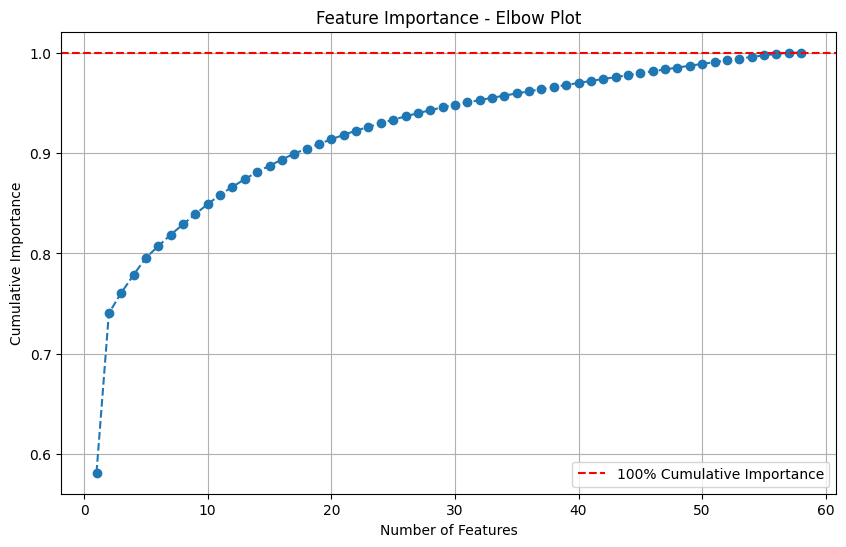

In [80]:
cum_sum = np.cumsum(imp['Importance'])

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_sum) + 1), cum_sum, marker='o', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Feature Importance - Elbow Plot')
plt.axhline(y=1, color='r', linestyle='--', label='100% Cumulative Importance')
plt.legend()
plt.grid()
plt.show()